In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
import math
import pandas
import seaborn as sns

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
indicators = pandas.read_csv('project data/climate change dataset - worldbank/data - indicators.csv', encoding = "ISO-8859-1")

In [3]:
indicators.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,50.776000,50.761000,50.746000,50.730000,50.715000,50.700000,...,43.059000,42.940000,42.957000,42.990000,43.041000,43.108000,43.192000,43.293000,43.411000,NaN
1,Aruba,ABW,Urban population,SP.URB.TOTL,27526.000000,28141.000000,28532.000000,28761.000000,28924.000000,29082.000000,...,43778.000000,43819.000000,44057.000000,44348.000000,44665.000000,44979.000000,45296.000000,45616.000000,45948.000000,NaN
2,Aruba,ABW,Urban population growth (annual %),SP.URB.GROW,3.117931,2.209658,1.379868,0.799404,0.565140,0.544773,...,-0.626205,0.093611,0.541674,0.658336,0.712259,0.700552,0.702301,0.703980,0.725179,NaN
3,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.000000,55438.000000,56225.000000,56695.000000,57032.000000,57360.000000,...,101669.000000,102046.000000,102560.000000,103159.000000,103774.000000,104341.000000,104872.000000,105366.000000,105845.000000,NaN
4,Aruba,ABW,Population growth (annual %),SP.POP.GROW,3.148037,2.238144,1.409622,0.832453,0.592649,0.573468,...,0.210709,0.370125,0.502430,0.582349,0.594397,0.544892,0.507618,0.469944,0.453576,NaN


In [4]:
temperature = pandas.read_csv('project data/climate change dataset - worldbank/data - temperature.csv')

In [5]:
temperature.head(12)

,Temperature - (Celsius),Year,Statistics,Country,Country Code
0,-0.03110,1991,Jan Average,Afghanistan,AFG
1,1.43654,1991,Feb Average,Afghanistan,AFG
2,6.88685,1991,Mar Average,Afghanistan,AFG
3,12.93970,1991,Apr Average,Afghanistan,AFG
4,17.07550,1991,May Average,Afghanistan,AFG
5,23.07770,1991,Jun Average,Afghanistan,AFG
6,25.57100,1991,Jul Average,Afghanistan,AFG
7,23.96730,1991,Aug Average,Afghanistan,AFG
8,19.38000,1991,Sep Average,Afghanistan,AFG
9,12.87790,1991,Oct Average,Afghanistan,AFG


In [6]:
rainfall = pandas.read_csv('project data/climate change dataset - worldbank/data - rainfall.csv', encoding = "ISO-8859-1")

In [7]:
try:
    del rainfall['Unnamed: 5']
except:
    pass
rainfall.head(12)

,Rainfall - (MM),Year,Statistics,Country,Code
0,64.77650,1991,Jan Average,Afghanistan,AFG
1,59.40250,1991,Feb Average,Afghanistan,AFG
2,119.62500,1991,Mar Average,Afghanistan,AFG
3,51.80250,1991,Apr Average,Afghanistan,AFG
4,57.24380,1991,May Average,Afghanistan,AFG
5,5.58788,1991,Jun Average,Afghanistan,AFG
6,4.39142,1991,Jul Average,Afghanistan,AFG
7,4.66582,1991,Aug Average,Afghanistan,AFG
8,12.63480,1991,Sep Average,Afghanistan,AFG
9,4.09568,1991,Oct Average,Afghanistan,AFG


In [8]:
# code to convert the indicators to following format 
'''
    SN      Country        Country Code        Year          % of Agricultural land        Forest Area
    1       Nepal          NEP                 2019           10 
'''

data = {}
rows = []

# print(indicators['Indicator Name'].unique())          

'\n    SN      Country        Country Code        Year          % of Agricultural land        Forest Area\n    1       Nepal          NEP                 2019           10 \n'

In [9]:
columns_controls = [
    'Population growth (annual %)',
    'Agricultural land (sq. km)',
    'Forest area (sq. km)',
    'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)',
    'Methane emissions (kt of CO2 equivalent)',
    'CO2 emissions (kt)',
    'Energy use (kg of oil equivalent per capita)',
    'Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)',
    'Mortality rate, under-5 (per 1,000 live births)',
    'Agriculture, forestry, and fishing, value added (% of GDP)',
    'Droughts, floods, extreme temperatures (% of population, average 1990-2009)',
    'Cereal yield (kg per hectare)',
    'Agricultural irrigated land (% of total agricultural land)',
    'Forest area (sq. km)'
]

columns = ['Country Name', 'Country Code']
indicator_names = []
for index, row in indicators.iterrows():
    if row['Indicator Name'] not in columns_controls:
        continue
        
    if row['Indicator Name'] not in columns:
        columns.append(row['Indicator Name'])
        
    if row['Indicator Name'] not in indicator_names:
        indicator_names.append(row['Indicator Name'])

columns.append('Year')
# MAKE THE DATAFRAME
new_indicators = pandas.DataFrame([], columns=columns)

previous_country = None
rows = []

        
for index, row in indicators.iterrows():
    if row['Indicator Name'] not in columns_controls:
        continue
    
    if row['Country Name'] != previous_country:
        if previous_country is not None:
            for year in range(1991, 2020): 
                insert_data  = {
                    'Country Name': data['Country Name'],
                    'Country Code': data['Country Code'],
                    'Year': str(year)
                }

                for indicator in data[str(year)]:
                    insert_data[indicator] = data[str(year)][indicator]

                new_indicators = new_indicators.append(insert_data , ignore_index=True)
        previous_country = row['Country Name']
                
        data = {
            'Country Name': '',
            'Country Code': ''    
        }

        for year in range(1991, 2020):
            data[str(year)] = {}
            for each_col in indicator_names:
                data[str(year)][each_col] = ''
        
    data ['Country Name'] = row ['Country Name']
    data ['Country Code'] = row ['Country Code']
    
    for year in range(1991, 2020): 
        data[str(year)][row['Indicator Name']] = row[str(year)]

for year in range(1991, 2020): 
    insert_data  = {
        'Country Name': data['Country Name'],
        'Country Code': data['Country Code'],
        'Year': str(year)
    }

    for indicator in data[str(year)]:
        insert_data[indicator] = data[str(year)][indicator]

    new_indicators = new_indicators.append(insert_data , ignore_index=True)

In [10]:
print(indicator_names)  

['Population growth (annual %)', 'Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)', 'Mortality rate, under-5 (per 1,000 live births)', 'Agriculture, forestry, and fishing, value added (% of GDP)', 'Droughts, floods, extreme temperatures (% of population, average 1990-2009)', 'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)', 'Methane emissions (kt of CO2 equivalent)', 'CO2 emissions (kt)', 'Energy use (kg of oil equivalent per capita)', 'Cereal yield (kg per hectare)', 'Agricultural irrigated land (% of total agricultural land)', 'Forest area (sq. km)', 'Agricultural land (sq. km)']


In [11]:
new_indicators

,Country Name,Country Code,Population growth (annual %),Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population),"Mortality rate, under-5 (per 1,000 live births)","Agriculture, forestry, and fishing, value added (% of GDP)","Droughts, floods, extreme temperatures (% of population, average 1990-2009)",Nitrous oxide emissions (thousand metric tons of CO2 equivalent),Methane emissions (kt of CO2 equivalent),CO2 emissions (kt),Energy use (kg of oil equivalent per capita),Cereal yield (kg per hectare),Agricultural irrigated land (% of total agricultural land),Forest area (sq. km),Agricultural land (sq. km),Year
0,Aruba,ABW,3.902018,NaN,NaN,NaN,NaN,11.862274,15.4860,1683.153,NaN,NaN,NaN,4.2000,20.0,1991
1,Aruba,ABW,5.440272,NaN,NaN,NaN,NaN,12.133462,15.8980,1463.133,NaN,NaN,NaN,4.2000,20.0,1992
2,Aruba,ABW,6.068410,NaN,NaN,NaN,NaN,12.684115,16.3861,1595.145,NaN,NaN,NaN,4.2000,20.0,1993
3,Aruba,ABW,5.625998,NaN,NaN,NaN,NaN,13.239976,16.8768,1613.480,NaN,NaN,NaN,4.2000,20.0,1994
4,Aruba,ABW,4.616675,NaN,NaN,0.505997,NaN,13.292831,17.2964,1668.485,NaN,NaN,NaN,4.2000,20.0,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7651,Zimbabwe,ZWE,1.663813,NaN,54.3,8.284247,NaN,NaN,NaN,NaN,NaN,558.2,NaN,140620.0000,162000.0,2015
7652,Zimbabwe,ZWE,1.549759,NaN,50.4,7.873986,NaN,NaN,NaN,NaN,NaN,581.8,NaN,137495.9961,162000.0,2016
7653,Zimbabwe,ZWE,1.460061,NaN,49.3,9.663428,NaN,NaN,NaN,NaN,NaN,616.0,NaN,NaN,NaN,2017
7654,Zimbabwe,ZWE,1.410783,NaN,46.2,12.081949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018


In [12]:
# find rainfall average across different year in different month

data = {}
countries = []

for index, row in rainfall.iterrows():
    row = dict(row)
    # print(row)
    
    key = ''   + str(row[' Year']) + ' - ' 
    key += str(row[' Statistics']).replace('Average','').strip()

    if key not in data:
        data [key] = row['Rainfall - (MM)']
    else:
        data [key] += row['Rainfall - (MM)']
    
    if row[' Country'] not in countries:
        countries.append(row[' Country'])

# count unique data
count = len(countries)

# perform average for all years
for each_year in data:
    data[each_year] = data[each_year] / count

# print(data)

In [13]:
rainfall_df = pandas.DataFrame(columns =['Year', 'Month', 'Rainfall'])

for each_data in data:
    year, month, rf = each_data.split(' - ')[0], each_data.split(' - ')[1], data[each_data]
    rainfall_df = rainfall_df.append({'Year' : year , 'Month' : month, 'Rainfall': rf} , ignore_index=True)

rainfall_df[rainfall_df['Month']=='Dec'].head(30)

,Year,Month,Rainfall
11,1991,Dec,89.675973
23,1992,Dec,95.032257
35,1993,Dec,95.115177
47,1994,Dec,88.516055
59,1995,Dec,96.956360
71,1996,Dec,90.675354
83,1997,Dec,95.736883
95,1998,Dec,105.974799
107,1999,Dec,102.214666
119,2000,Dec,98.330999


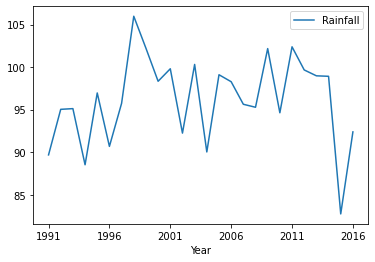

In [14]:
# rainfall_df[rainfall_df['Month']=='Jan'].plot.line(x='Year', y='Rainfall')
# rainfall_df[rainfall_df['Month']=='Feb'].plot.line(x='Year', y='Rainfall')
# rainfall_df[rainfall_df['Month']=='Mar'].plot.line(x='Year', y='Rainfall')
# rainfall_df[rainfall_df['Month']=='Apr'].plot.line(x='Year', y='Rainfall')
# rainfall_df[rainfall_df['Month']=='May'].plot.line(x='Year', y='Rainfall')
# rainfall_df[rainfall_df['Month']=='Jun'].plot.line(x='Year', y='Rainfall')
# rainfall_df[rainfall_df['Month']=='Jul'].plot.line(x='Year', y='Rainfall')
# rainfall_df[rainfall_df['Month']=='Aug'].plot.line(x='Year', y='Rainfall')
# rainfall_df[rainfall_df['Month']=='Sep'].plot.line(x='Year', y='Rainfall')
# rainfall_df[rainfall_df['Month']=='Oct'].plot.line(x='Year', y='Rainfall')
# rainfall_df[rainfall_df['Month']=='Nov'].plot.line(x='Year', y='Rainfall')
rainfall_df[rainfall_df['Month']=='Dec'].plot.line(x='Year', y='Rainfall')

,Rainfall - (MM),Year,Statistics,Country,Code
38064,24.6078,1991,Jan Average,Nepal,NPL
38076,22.9484,1992,Jan Average,Nepal,NPL
38088,23.4321,1993,Jan Average,Nepal,NPL
38100,36.3310,1994,Jan Average,Nepal,NPL
38112,41.3874,1995,Jan Average,Nepal,NPL


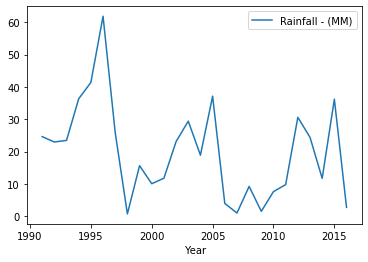

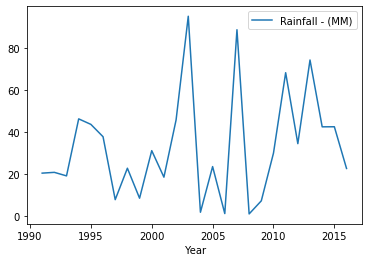

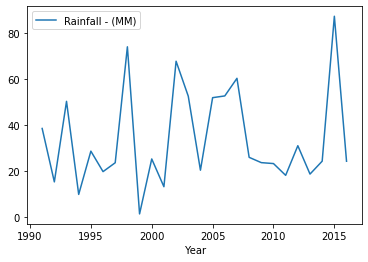

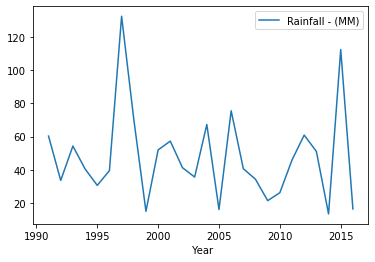

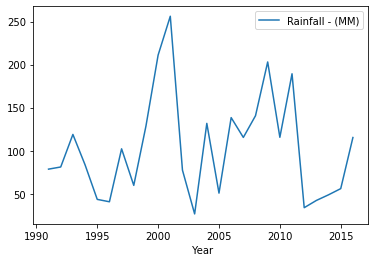

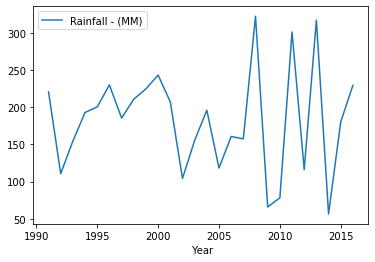

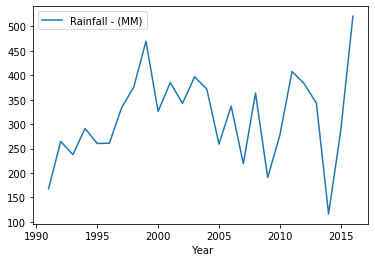

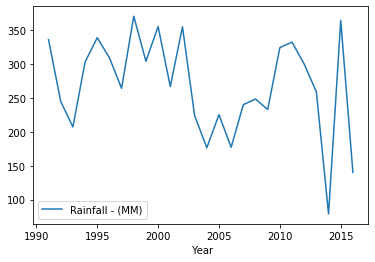

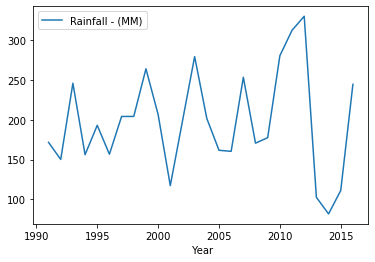

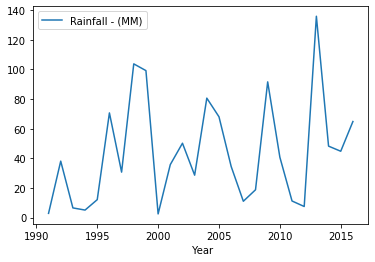

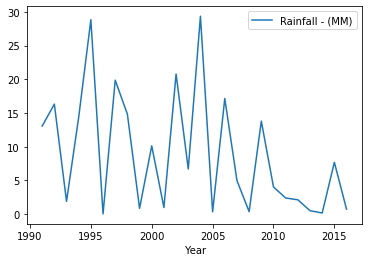

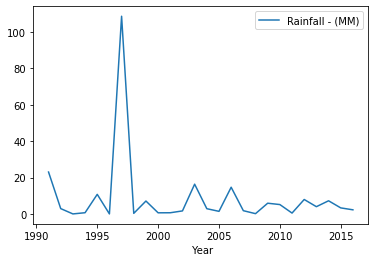

In [15]:
# Plot rainfall pattern in Nepal for all months in year
rainfall[(rainfall['Code']==' NPL') & (rainfall[' Statistics']==' Jan Average')].head()
rainfall[(rainfall['Code']==' NPL') & (rainfall[' Statistics']==' Jan Average')].plot.line(x=' Year', y='Rainfall - (MM)')
rainfall[(rainfall['Code']==' NPL') & (rainfall[' Statistics']==' Feb Average')].plot.line(x=' Year', y='Rainfall - (MM)')
rainfall[(rainfall['Code']==' NPL') & (rainfall[' Statistics']==' Mar Average')].plot.line(x=' Year', y='Rainfall - (MM)')
rainfall[(rainfall['Code']==' NPL') & (rainfall[' Statistics']==' Apr Average')].plot.line(x=' Year', y='Rainfall - (MM)')

rainfall[(rainfall['Code']==' NPL') & (rainfall[' Statistics']==' May Average')].plot.line(x=' Year', y='Rainfall - (MM)')
rainfall[(rainfall['Code']==' NPL') & (rainfall[' Statistics']==' Jun Average')].plot.line(x=' Year', y='Rainfall - (MM)')
rainfall[(rainfall['Code']==' NPL') & (rainfall[' Statistics']==' Jul Average')].plot.line(x=' Year', y='Rainfall - (MM)')
rainfall[(rainfall['Code']==' NPL') & (rainfall[' Statistics']==' Aug Average')].plot.line(x=' Year', y='Rainfall - (MM)')

rainfall[(rainfall['Code']==' NPL') & (rainfall[' Statistics']==' Sep Average')].plot.line(x=' Year', y='Rainfall - (MM)')
rainfall[(rainfall['Code']==' NPL') & (rainfall[' Statistics']==' Oct Average')].plot.line(x=' Year', y='Rainfall - (MM)')
rainfall[(rainfall['Code']==' NPL') & (rainfall[' Statistics']==' Nov Average')].plot.line(x=' Year', y='Rainfall - (MM)')
rainfall[(rainfall['Code']==' NPL') & (rainfall[' Statistics']==' Dec Average')].plot.line(x=' Year', y='Rainfall - (MM)')

In [16]:
rainfall['Code'].unique()

array([' AFG', ' ALB', ' DZA', ' AND', ' AGO', ' ATG', ' ARG', ' ARM',
       ' AUS', ' AUT', ' AZE', ' The', ' BHR', ' BGD', ' BRB', ' BLR',
       ' BEL', ' BLZ', ' BEN', ' BTN', ' BOL', ' BIH', ' BWA', ' BRA',
       ' BRN', ' BGR', ' BFA', ' BDI', ' KHM', ' CMR', ' CAN', ' CPV',
       ' CAF', ' TCD', ' CHL', ' CHN', ' COL', ' COM', ' COD', ' COG',
       ' CRI', ' CIV', ' HRV', ' CUB', ' CYP', ' CZE', ' DNK', ' DJI',
       ' DMA', ' DOM', ' ECU', ' EGY', ' SLV', ' GNQ', ' ERI', ' EST',
       ' ETH', ' FRO', ' FSM', ' FJI', ' FIN', ' FRA', ' GAB', ' GMB',
       ' GEO', ' DEU', ' GHA', ' GRC', ' GRL', ' GRD', ' GTM', ' GIN',
       ' GNB', ' GUY', ' HTI', ' HND', ' HUN', ' ISL', ' IND', ' IDN',
       ' IRN', ' IRQ', ' IRL', ' ISR', ' ITA', ' JAM', ' JPN', ' JOR',
       ' KAZ', ' KEN', ' KIR', ' PRK', ' KOR', ' KWT', ' KGZ', ' LAO',
       ' LVA', ' LBN', ' LSO', ' LBR', ' LBY', ' LIE', ' LTU', ' LUX',
       ' MKD', ' MDG', ' MWI', ' MYS', ' MDV', ' MLI', ' MLT', ' MHL',
      

In [17]:
rainfall.head()

,Rainfall - (MM),Year,Statistics,Country,Code
0,64.7765,1991,Jan Average,Afghanistan,AFG
1,59.4025,1991,Feb Average,Afghanistan,AFG
2,119.6250,1991,Mar Average,Afghanistan,AFG
3,51.8025,1991,Apr Average,Afghanistan,AFG
4,57.2438,1991,May Average,Afghanistan,AFG


In [18]:
new_indicators.head()

,Country Name,Country Code,Population growth (annual %),Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population),"Mortality rate, under-5 (per 1,000 live births)","Agriculture, forestry, and fishing, value added (% of GDP)","Droughts, floods, extreme temperatures (% of population, average 1990-2009)",Nitrous oxide emissions (thousand metric tons of CO2 equivalent),Methane emissions (kt of CO2 equivalent),CO2 emissions (kt),Energy use (kg of oil equivalent per capita),Cereal yield (kg per hectare),Agricultural irrigated land (% of total agricultural land),Forest area (sq. km),Agricultural land (sq. km),Year
0,Aruba,ABW,3.902018,NaN,NaN,NaN,NaN,11.862274,15.4860,1683.153,NaN,NaN,NaN,4.2,20.0,1991
1,Aruba,ABW,5.440272,NaN,NaN,NaN,NaN,12.133462,15.8980,1463.133,NaN,NaN,NaN,4.2,20.0,1992
2,Aruba,ABW,6.068410,NaN,NaN,NaN,NaN,12.684115,16.3861,1595.145,NaN,NaN,NaN,4.2,20.0,1993
3,Aruba,ABW,5.625998,NaN,NaN,NaN,NaN,13.239976,16.8768,1613.480,NaN,NaN,NaN,4.2,20.0,1994
4,Aruba,ABW,4.616675,NaN,NaN,0.505997,NaN,13.292831,17.2964,1668.485,NaN,NaN,NaN,4.2,20.0,1995


In [19]:
new_indicators['Country Code'] = new_indicators['Country Code'].apply(lambda x: str(x).strip())
rainfall['Code'] = rainfall['Code'].apply(lambda x: x.strip())
rainfall[' Statistics'] = rainfall[' Statistics'].apply(lambda x: str(x).strip())

rainfall[' Year'] = rainfall[' Year'].apply(lambda x: str(int(x)))
new_indicators['Year'] = new_indicators['Year'].apply(lambda x: str(int(x)))

result_rainfall = rainfall.merge(
    new_indicators, left_on=['Code', ' Year'], 
    right_on=['Country Code', 'Year'], 
    how='inner'
)

In [20]:
result_rainfall.head()

,Rainfall - (MM),Year,Statistics,Country,Code,Country Name,Country Code,Population growth (annual %),Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population),"Mortality rate, under-5 (per 1,000 live births)",...,"Droughts, floods, extreme temperatures (% of population, average 1990-2009)",Nitrous oxide emissions (thousand metric tons of CO2 equivalent),Methane emissions (kt of CO2 equivalent),CO2 emissions (kt),Energy use (kg of oil equivalent per capita),Cereal yield (kg per hectare),Agricultural irrigated land (% of total agricultural land),Forest area (sq. km),Agricultural land (sq. km),Year
0,64.7765,1991,Jan Average,Afghanistan,AFG,Afghanistan,AFG,6.900156,NaN,172.6,...,NaN,2755.8938,7702.08,2438.555,NaN,1160.4,NaN,13500.0,380300.0,1991
1,59.4025,1991,Feb Average,Afghanistan,AFG,Afghanistan,AFG,6.900156,NaN,172.6,...,NaN,2755.8938,7702.08,2438.555,NaN,1160.4,NaN,13500.0,380300.0,1991
2,119.6250,1991,Mar Average,Afghanistan,AFG,Afghanistan,AFG,6.900156,NaN,172.6,...,NaN,2755.8938,7702.08,2438.555,NaN,1160.4,NaN,13500.0,380300.0,1991
3,51.8025,1991,Apr Average,Afghanistan,AFG,Afghanistan,AFG,6.900156,NaN,172.6,...,NaN,2755.8938,7702.08,2438.555,NaN,1160.4,NaN,13500.0,380300.0,1991
4,57.2438,1991,May Average,Afghanistan,AFG,Afghanistan,AFG,6.900156,NaN,172.6,...,NaN,2755.8938,7702.08,2438.555,NaN,1160.4,NaN,13500.0,380300.0,1991


In [21]:
new_indicators.describe()

,Population growth (annual %),Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population),"Mortality rate, under-5 (per 1,000 live births)","Agriculture, forestry, and fishing, value added (% of GDP)","Droughts, floods, extreme temperatures (% of population, average 1990-2009)",Nitrous oxide emissions (thousand metric tons of CO2 equivalent),Methane emissions (kt of CO2 equivalent),CO2 emissions (kt),Energy use (kg of oil equivalent per capita),Cereal yield (kg per hectare),Agricultural irrigated land (% of total agricultural land),Forest area (sq. km),Agricultural land (sq. km)
count,7344.000000,1527.000000,6692.000000,6260.000000,168.000000,5.506000e+03,5.484000e+03,5.887000e+03,4494.000000,5973.000000,856.000000,6.639000e+03,6.542000e+03
mean,1.454340,12.486876,50.426566,12.856599,1.169905,1.222353e+05,2.925721e+05,9.707150e+05,2300.399953,2908.635500,10.075554,1.625996e+06,1.944396e+06
std,1.448780,18.784362,50.925153,11.828669,1.955153,3.550384e+05,8.910158e+05,3.211270e+06,2708.138688,2255.679544,12.495702,4.955546e+06,5.625352e+06
min,-10.955149,0.000000,1.700000,0.024859,0.000000,0.000000e+00,0.000000e+00,7.334000e+00,0.000000,34.300000,0.000000,0.000000e+00,3.000000e+00
25%,0.528279,0.500000,12.000000,3.438151,0.020186,5.877677e+02,2.082185e+03,1.668485e+03,602.809049,1442.600000,1.232229,3.323000e+03,5.520000e+03
50%,1.346710,3.300000,29.600000,9.055925,0.253744,4.572756e+03,1.095110e+04,1.755026e+04,1280.873666,2423.950423,5.266499,3.599900e+04,5.455000e+04
75%,2.354946,16.000000,76.398238,19.703113,1.265462,2.870698e+04,7.364995e+04,2.090899e+05,3047.753898,3812.100000,13.376356,2.492180e+05,4.568200e+05
max,17.510948,94.100000,321.900000,79.042362,9.226586,3.260053e+06,8.014067e+06,3.613828e+07,22120.371570,28130.100000,59.711493,4.121003e+07,4.891167e+07


In [22]:
result_rainfall.columns
pearsoncorr = result_rainfall[[
        'Rainfall - (MM)',
        'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)',
        'Methane emissions (kt of CO2 equivalent)',
        'CO2 emissions (kt)',
        'Energy use (kg of oil equivalent per capita)'
]].corr(method='pearson')

Index(['Rainfall - (MM)', ' Year', ' Statistics', ' Country', 'Code',
       'Country Name', 'Country Code', 'Population growth (annual %)',
       'Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)',
       'Mortality rate, under-5 (per 1,000 live births)',
       'Agriculture, forestry, and fishing, value added (% of GDP)',
       'Droughts, floods, extreme temperatures (% of population, average 1990-2009)',
       'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)',
       'Methane emissions (kt of CO2 equivalent)', 'CO2 emissions (kt)',
       'Energy use (kg of oil equivalent per capita)',
       'Cereal yield (kg per hectare)',
       'Agricultural irrigated land (% of total agricultural land)',
       'Forest area (sq. km)', 'Agricultural land (sq. km)', 'Year'],
      dtype='object')

In [23]:
pearsoncorr

,Rainfall - (MM),Nitrous oxide emissions (thousand metric tons of CO2 equivalent),Methane emissions (kt of CO2 equivalent),CO2 emissions (kt),Energy use (kg of oil equivalent per capita)
Rainfall - (MM),1.000000,-0.056698,-0.062854,-0.075295,-0.133341
Nitrous oxide emissions (thousand metric tons of CO2 equivalent),-0.056698,1.000000,0.954026,0.864990,0.027638
Methane emissions (kt of CO2 equivalent),-0.062854,0.954026,1.000000,0.847190,0.017852
CO2 emissions (kt),-0.075295,0.864990,0.847190,1.000000,0.133652
Energy use (kg of oil equivalent per capita),-0.133341,0.027638,0.017852,0.133652,1.000000


Index(['Rainfall - (MM)',
       'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)',
       'Methane emissions (kt of CO2 equivalent)', 'CO2 emissions (kt)',
       'Energy use (kg of oil equivalent per capita)'],
      dtype='object')


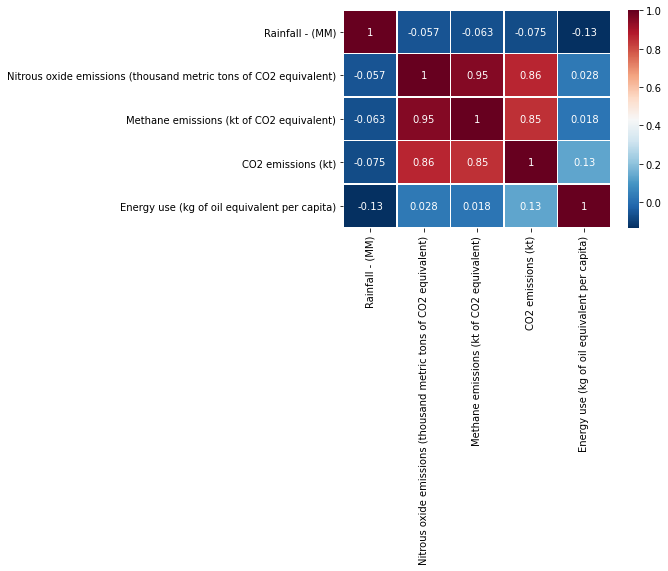

In [24]:
print(pearsoncorr.columns)

import seaborn as sb
sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

In [25]:
temperature.describe()

,Temperature - (Celsius),Year
count,61152.000000,61152.000000
mean,19.224302,2003.500000
std,10.136161,7.500061
min,-30.859000,1991.000000
25%,13.824000,1997.000000
50%,23.322650,2003.500000
75%,26.244025,2010.000000
max,38.566900,2016.000000


In [26]:
temperature['Country Code'] = temperature['Country Code'].apply(lambda x: x.strip())
new_indicators['Country Code'] = new_indicators['Country Code'].apply(lambda x: x.strip())
new_indicators['Year'] = new_indicators['Year'].astype('int')
temperature[' Statistics'] = temperature[' Statistics'].apply(lambda x: str(x).strip())

result_temp = temperature.merge(
    new_indicators, left_on=['Country Code', ' Year'], 
    right_on=['Country Code', 'Year'], 
    how='inner'
)

In [27]:
result_temp.head()

,Temperature - (Celsius),Year,Statistics,Country,Country Code,Country Name,Population growth (annual %),Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population),"Mortality rate, under-5 (per 1,000 live births)","Agriculture, forestry, and fishing, value added (% of GDP)","Droughts, floods, extreme temperatures (% of population, average 1990-2009)",Nitrous oxide emissions (thousand metric tons of CO2 equivalent),Methane emissions (kt of CO2 equivalent),CO2 emissions (kt),Energy use (kg of oil equivalent per capita),Cereal yield (kg per hectare),Agricultural irrigated land (% of total agricultural land),Forest area (sq. km),Agricultural land (sq. km),Year
0,-0.03110,1991,Jan Average,Afghanistan,AFG,Afghanistan,6.900156,NaN,172.6,NaN,NaN,2755.8938,7702.08,2438.555,NaN,1160.4,NaN,13500.0,380300.0,1991
1,1.43654,1991,Feb Average,Afghanistan,AFG,Afghanistan,6.900156,NaN,172.6,NaN,NaN,2755.8938,7702.08,2438.555,NaN,1160.4,NaN,13500.0,380300.0,1991
2,6.88685,1991,Mar Average,Afghanistan,AFG,Afghanistan,6.900156,NaN,172.6,NaN,NaN,2755.8938,7702.08,2438.555,NaN,1160.4,NaN,13500.0,380300.0,1991
3,12.93970,1991,Apr Average,Afghanistan,AFG,Afghanistan,6.900156,NaN,172.6,NaN,NaN,2755.8938,7702.08,2438.555,NaN,1160.4,NaN,13500.0,380300.0,1991
4,17.07550,1991,May Average,Afghanistan,AFG,Afghanistan,6.900156,NaN,172.6,NaN,NaN,2755.8938,7702.08,2438.555,NaN,1160.4,NaN,13500.0,380300.0,1991


In [28]:
pearsoncorr = result_temp[[
        'Temperature - (Celsius)',
        'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)',
        'Methane emissions (kt of CO2 equivalent)',
        'CO2 emissions (kt)',
        'Energy use (kg of oil equivalent per capita)'
]].corr(method='pearson')

Index(['Temperature - (Celsius)',
       'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)',
       'Methane emissions (kt of CO2 equivalent)', 'CO2 emissions (kt)',
       'Energy use (kg of oil equivalent per capita)'],
      dtype='object')


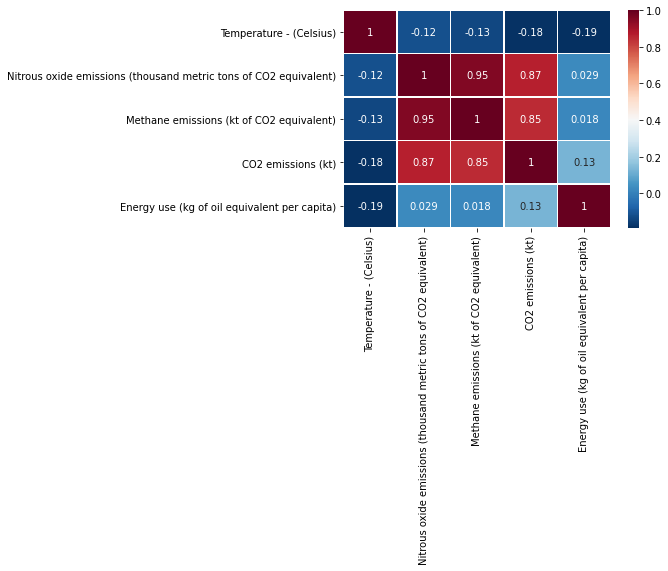

In [29]:
print(pearsoncorr.columns)

import seaborn as sb
sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

In [30]:
# Tasks
'''
    a. For each countries, 
        i.  Analyze change in temperature dataset for each month
        ii. Analyze change in temperature dataset for overall year
        iii. Analyze CO2 and NO2 emission in these countries
        iv. K-means Cluster analysis based on custom indicators such as % change in CO2 production, %change in temperature
'''

'\n    a. For each countries, \n        i.  Analyze change in temperature dataset for each month\n        ii. Analyze change in temperature dataset for overall year\n        iii. Analyze CO2 and NO2 emission in these countries\n        iv. K-means Cluster analysis based on custom indicators such as % change in CO2 production, %change in temperature\n'

In [31]:
country_code_for_analysis = ['CHN', 'USA', 'RUS', 'IND', 'NPL', 'POL', 'CAN', 'AUS']
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [32]:
temperature[(temperature[' Statistics'] == 'Jan Average') & (temperature['Country Code'] == 'CHN')].head()

,Temperature - (Celsius),Year,Statistics,Country,Country Code
10920,-8.0581,1991,Jan Average,China,CHN
10932,-7.6555,1992,Jan Average,China,CHN
10944,-8.9905,1993,Jan Average,China,CHN
10956,-7.5140,1994,Jan Average,China,CHN
10968,-8.3181,1995,Jan Average,China,CHN


In [33]:
country_monthly_temperature_data = {}
for each_country in country_code_for_analysis:
    country_monthly_temperature_data[each_country] = []

# Task 1. Analyze change in temperature dataset for each month
for each_country in country_code_for_analysis:
    for each_month in months:
        avg = temperature[
            (temperature[' Statistics'] == str(each_month) + ' Average') & 
            (temperature['Country Code'] == each_country)
        ]['Temperature - (Celsius)'].mean()
        
        country_monthly_temperature_data[each_country].append(avg)

In [34]:
country_monthly_temperature_data_df=pandas.DataFrame.from_dict(country_monthly_temperature_data,orient='index').transpose()
country_monthly_temperature_data_df['Month'] = months
country_monthly_temperature_data_df.set_index('Month', inplace=True)
country_monthly_temperature_data_df.head()

,CHN,USA,RUS,IND,NPL,POL,CAN,AUS
Month,,,,,,,,
Jan,-7.927631,-4.893523,-25.455462,17.295923,3.847042,-1.523544,-23.006692,28.314377
Feb,-4.364515,-2.884202,-23.267769,19.918585,5.582587,-0.281723,-21.883538,27.569715
Mar,1.524660,0.958290,-15.287923,24.268592,10.101127,3.473298,-17.429923,25.609608
Apr,8.503135,6.747283,-5.293050,28.049823,13.917542,8.593287,-8.713662,22.301742
May,13.587296,12.830377,4.065970,30.247012,16.745592,13.654200,0.493339,18.240396


Text(0.5, 0, 'Month')

Text(0, 0.5, 'Average Temperature')

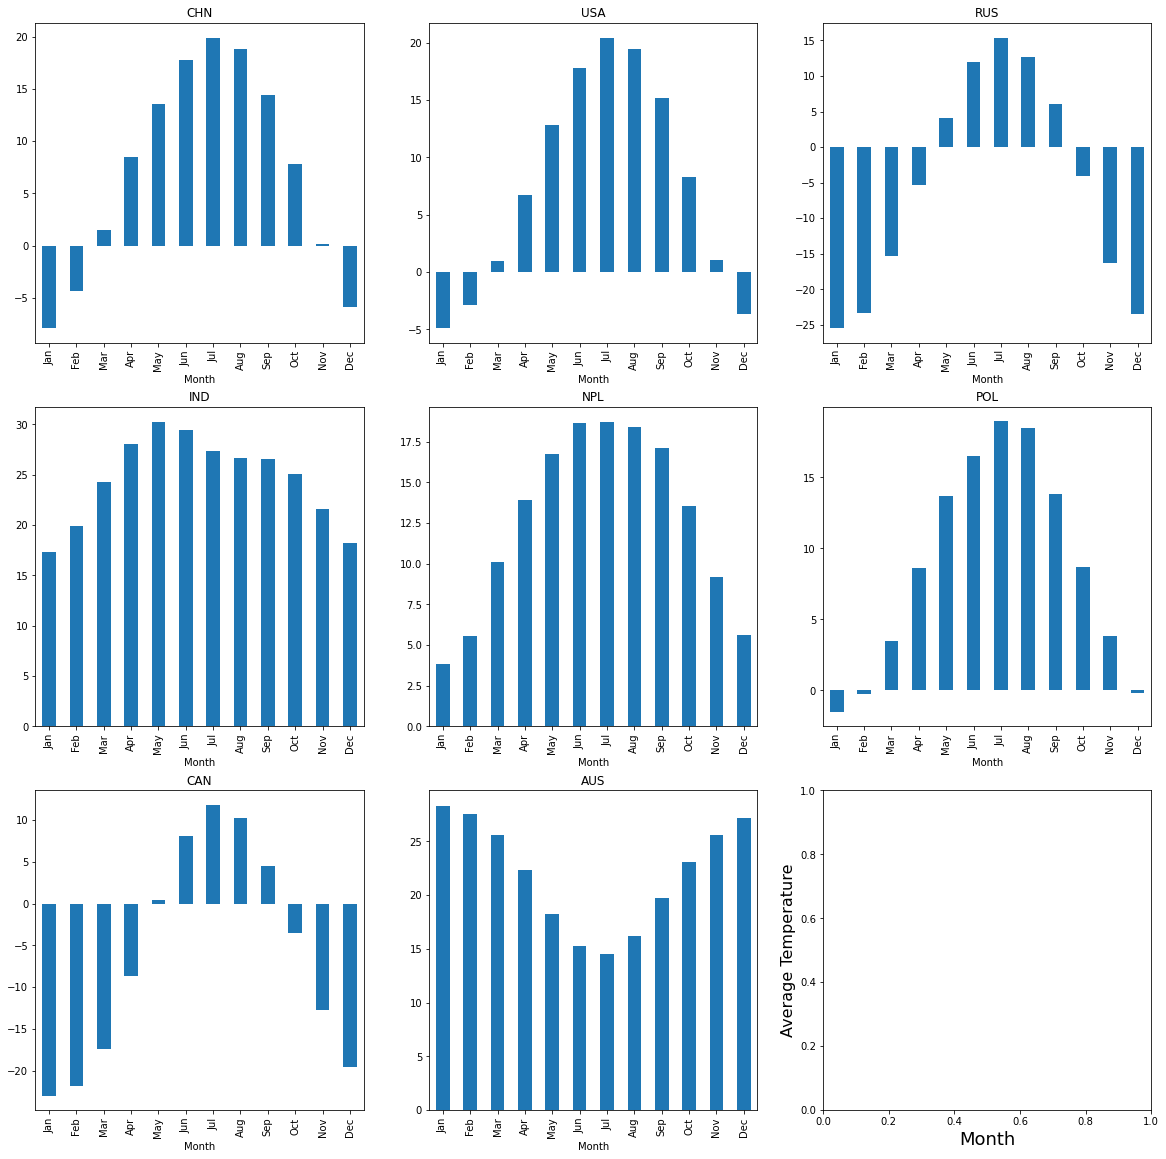

In [35]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,20))
plt.xlabel('Month', fontsize=18)
plt.ylabel('Average Temperature', fontsize=16)

for i in range(len(country_code_for_analysis)):
    ix = np.unravel_index(i, axes.shape) # compute an appropriate index (1d or 2d)
    country_monthly_temperature_data_df[country_code_for_analysis[i]].plot(
        ax=axes[ix],kind='bar', title=country_code_for_analysis[i])

Index(['Temperature - (Celsius)', ' Year', ' Statistics', ' Country',
       'Country Code'],
      dtype='object')

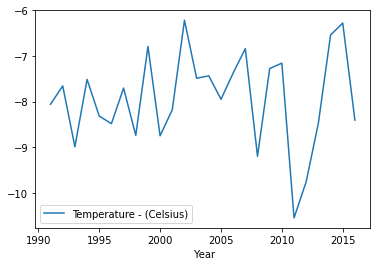

In [36]:
# Analyze temperature change for January for China
temperature.columns
temp_new = temperature[(temperature[' Statistics'] == 'Jan Average') &  (temperature['Country Code'] == 'CHN')][
    ['Temperature - (Celsius)', ' Year']]
temp_new.set_index(' Year', inplace=True)
temp_new.plot.line()

In [37]:
# Analyze % change in temperature data for January for the last 3 decades
temperature.columns

for month in months:
    m1 = temperature[
            (temperature[' Statistics'] == str(month) + ' Average') &  
            (temperature['Country Code'] == 'CHN') & 
            (temperature[' Year']  >1989) &
            (temperature[' Year']  < 2001)
        ]['Temperature - (Celsius)'].mean()

    m2 = temperature[
            (temperature[' Statistics'] == str(month) + ' Average') &  
            (temperature['Country Code'] == 'CHN') & 
            (temperature[' Year']  > 2000) &
            (temperature[' Year']  < 2011)
        ]['Temperature - (Celsius)'].mean()

    m3 = temperature[
            (temperature[' Statistics'] == str(month) + ' Average') &  
            (temperature['Country Code'] == 'CHN') & 
            (temperature[' Year']  > 2010) &
            (temperature[' Year']  < 2020)
        ]['Temperature - (Celsius)'].mean()

    print(month, m1, m2, m3, (m2-m1)/m1*100, (m3-m1)/m1*100)

Index(['Temperature - (Celsius)', ' Year', ' Statistics', ' Country',
       'Country Code'],
      dtype='object')

Jan -8.100719999999999 -7.510999999999998 -8.333533333333333 -7.279846729673421 2.8739832179526568
Feb -4.48024 -4.053660000000001 -4.689733333333334 -9.521364926878906 4.67593997940587
Mar 0.9498190000000001 1.914286 1.8333500000000003 101.5421885643475 93.02098610366818
Apr 8.201236999999999 8.562738 8.90696 4.407883835084885 8.6050799409894
May 13.470509999999999 13.765600000000001 13.484766666666665 2.1906371770630946 0.10583613142090657
Jun 17.49015 17.981260000000002 17.91675 2.8079233168383495 2.439087143334966
Jul 19.70023 20.099619999999998 20.114300000000004 2.027336736677677 2.1018536331809443
Aug 18.58692 18.991719999999997 19.201666666666664 2.1778756243637893 3.3074154656428565
Sep 14.215859999999997 14.738900000000001 14.461533333333334 3.679270898841179 1.728163708233875
Oct 7.406619999999999 8.090951 8.077276666666666 9.239450653604495 9.054827528166248
Nov -0.18990099999999996 0.40911400000000003 0.33003166666666667 -315.4354110826168 -273.79143167580304
Dec -5.820300

In [38]:
country_code_for_analysis = list(rainfall['Code'].unique())
months = ['Jun', 'Jul', 'Aug', 'Nov', 'Dec', 'Jan']

june_1990 = []
june_2000 = []
june_2010 = []

percentage_june_2000 = []
percentage_june_2010 = []

july_1990 = []
july_2000 = []
july_2010 = []

percentage_july_2000 = []
percentage_july_2010 = []

august_1990 = []
august_2000 = []
august_2010 = []

percentage_august_2000 = []
percentage_august_2010 = []

november_1990 = []
november_2000 = []
november_2010 = []

percentage_november_2000 = []
percentage_november_2010 = []

december_1990 = []
december_2000 = []
december_2010 = []

percentage_december_2000 = []
percentage_december_2010 = []

january_1990 = []
january_2000 = []
january_2010 = []

percentage_january_2000 = []
percentage_january_2010 = []

for each_country in country_code_for_analysis:
    for month in months:
        m1 = temperature[
                (temperature[' Statistics'] == str(month) + ' Average') &  
                (temperature['Country Code'] == each_country) & 
                (temperature[' Year']  >1989) &
                (temperature[' Year']  < 2001)
            ]['Temperature - (Celsius)'].mean()

        m2 = temperature[
                (temperature[' Statistics'] == str(month) + ' Average') &  
                (temperature['Country Code'] == each_country) & 
                (temperature[' Year']  > 2000) &
                (temperature[' Year']  < 2011)
            ]['Temperature - (Celsius)'].mean()

        m3 = temperature[
                (temperature[' Statistics'] == str(month) + ' Average') &  
                (temperature['Country Code'] == each_country) & 
                (temperature[' Year']  > 2010) &
                (temperature[' Year']  < 2020)
            ]['Temperature - (Celsius)'].mean()
        
        if month == 'Jun':
            june_1990.append(m1)
            june_2000.append(m2)
            june_2010.append(m3)
            
            percentage_june_2000.append((m2-m1)/m1*100)            
            percentage_june_2010.append((m3-m1)/m1*100)
        
        if month == 'Jul':
            july_1990.append(m1)
            july_2000.append(m2)
            july_2010.append(m3)
            
            percentage_july_2000.append((m2-m1)/m1*100)            
            percentage_july_2010.append((m3-m1)/m1*100)
        
        if month == 'Aug':            
            august_1990.append(m1)
            august_2000.append(m2)
            august_2010.append(m3)
            
            percentage_august_2000.append((m2-m1)/m1*100)            
            percentage_august_2010.append((m3-m1)/m1*100)
        
        if month == 'Nov':
            november_1990.append(m1)
            november_2000.append(m2)
            november_2010.append(m3)
            
            percentage_november_2000.append((m2-m1)/m1*100)            
            percentage_november_2010.append((m3-m1)/m1*100)
        
        if month == 'Dec':
            december_1990.append(m1)
            december_2000.append(m2)
            december_2010.append(m3)
            
            percentage_december_2000.append((m2-m1)/m1*100)            
            percentage_december_2010.append((m3-m1)/m1*100)
            
        if month == 'Jan':
            january_1990.append(m1)
            january_2000.append(m2)
            january_2010.append(m3)
            
            percentage_january_2000.append((m2-m1)/m1*100)            
            percentage_january_2010.append((m3-m1)/m1*100)


data_stats = {
    'country': country_code_for_analysis,
    'june_1990': june_1990, 
    'june_2000': june_2000, 
    'june_2010': june_2010, 
    'july_1990': july_1990, 
    'july_2000': july_2000,
    'july_2010': july_2010, 
    'august_1990': august_1990, 
    'august_2000': august_2000, 
    'august_2010': august_2010, 
    'november_1990':november_1990,
    'november_2000':november_2000,
    'november_2010':november_2010,
    'december_1990': december_1990,
    'december_2000': december_2000,
    'december_2010': december_2010,
    'january_1990': january_1990, 
    'january_2000': january_2000,
    'january_2010': january_2010
}

df_stat = pd.DataFrame(data=data_stats)

data_percentage ={
    'country': country_code_for_analysis,
    'percentage_june_2000': percentage_june_2000, 
    'percentage_june_2010': percentage_june_2010, 
    'percentage_july_2000': percentage_july_2000, 
    'percentage_july_2010': percentage_july_2010, 
    'percentage_august_2000': percentage_august_2000, 
    'percentage_august_2010': percentage_august_2010, 
    'percentage_november_2000':percentage_november_2000,
    'percentage_november_2010':percentage_november_2010,
    'percentage_december_2000': percentage_december_2000,
    'percentage_december_2010': percentage_december_2010,
    'percentage_january_2000': percentage_january_2000,
    'percentage_january_2010': percentage_january_2010
}


df_percentage = pd.DataFrame(data=data_percentage)

In [39]:
df_percentage.head()

,country,percentage_june_2000,percentage_june_2010,percentage_july_2000,percentage_july_2010,percentage_august_2000,percentage_august_2010,percentage_november_2000,percentage_november_2010,percentage_december_2000,percentage_december_2010,percentage_january_2000,percentage_january_2010
0,AFG,1.751457,6.326181,1.218239,3.877877,1.826468,3.022545,4.791107,-6.245956,-17.067701,-23.037810,10.864381,160.120367
1,ALB,1.224828,2.273618,4.537126,5.787713,1.587604,4.911092,5.891520,13.001156,-0.481762,0.610916,13.235597,35.291330
2,DZA,1.766063,1.902554,2.354052,2.091291,0.652762,1.053353,0.853632,3.550871,1.795430,-0.477235,1.479689,5.303360
3,AND,8.924938,5.706145,2.892242,2.384314,-2.201155,-0.367138,2.038986,19.423065,-23.551342,8.252903,-2.864516,16.007828
4,AGO,1.589487,-0.037665,1.587331,1.719372,2.110719,0.038757,-0.251736,-0.382624,0.746580,0.745771,1.748728,0.371265


In [40]:
df_percentage.columns
df_stat.head()

Index(['country', 'percentage_june_2000', 'percentage_june_2010',
       'percentage_july_2000', 'percentage_july_2010',
       'percentage_august_2000', 'percentage_august_2010',
       'percentage_november_2000', 'percentage_november_2010',
       'percentage_december_2000', 'percentage_december_2010',
       'percentage_january_2000', 'percentage_january_2010'],
      dtype='object')

,country,june_1990,june_2000,june_2010,july_1990,july_2000,july_2010,august_1990,august_2000,august_2010,november_1990,november_2000,november_2010,december_1990,december_2000,december_2010,january_1990,january_2000,january_2010
0,AFG,23.23208,23.63898,24.701783,25.28076,25.58874,26.261117,23.90789,24.34456,24.630517,7.475850,7.834026,7.008912,3.367331,2.792605,2.591572,0.579895,0.642897,1.508425
1,ALB,19.31210,19.54864,19.751183,21.48805,22.46299,22.731717,21.85746,22.20447,22.930900,7.792115,8.251189,8.805180,3.730682,3.712709,3.753473,2.243790,2.540769,3.035653
2,DZA,31.66988,32.22919,32.272417,33.04642,33.82435,33.737517,32.78072,32.99470,33.126017,17.871860,18.024420,18.506467,13.578920,13.822720,13.514117,12.253930,12.435250,12.903800
3,AND,17.07586,18.59987,18.050233,20.29948,20.88659,20.783483,20.93946,20.47855,20.862583,7.604416,7.759469,9.081427,5.406885,4.133491,5.853110,4.266271,4.144063,4.949208
4,AGO,19.08037,19.38365,19.073183,18.65836,18.95453,18.979167,20.58114,21.01555,20.589117,23.473030,23.413940,23.383217,23.089290,23.261670,23.261483,22.944100,23.345330,23.029283


In [41]:
from sklearn import cluster
from mpl_toolkits.mplot3d import Axes3D

df_percentage_subset = df_percentage[[
       'country', 
       'percentage_june_2000', 'percentage_june_2010',
       'percentage_july_2000', 'percentage_july_2010',
       'percentage_august_2000', 'percentage_august_2010',
       'percentage_november_2000', 'percentage_november_2010',
       'percentage_december_2000', 'percentage_december_2010',
       'percentage_january_2000', 'percentage_january_2010'
]]
# df_stat_subset[df_stat_subset.isna().any(axis=1)]
df_percentage_subset = df_percentage_subset.dropna()


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

/home/rbhanda/.conda/envs/8650env/lib/python3.8/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/rbhanda/.conda/envs/8650env/lib/python3.8/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


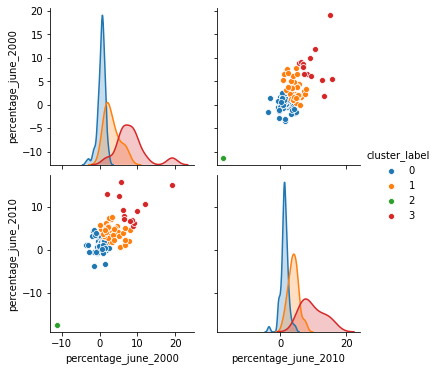

In [42]:
k_means = cluster.KMeans(n_clusters=4, max_iter = 1000)
k_means.fit(df_percentage_subset[[
        'percentage_june_2000', 'percentage_june_2010']])

df_percentage_subset['cluster_label'] = k_means.labels_

data_plot = sns.pairplot(df_percentage_subset, hue='cluster_label', vars =['percentage_june_2000', 'percentage_june_2010'])
data_plot

In [43]:
cluster_means = []

percentage_june_2000_mean = pd.DataFrame(df_percentage_subset.groupby(['cluster_label'])['percentage_june_2000'].mean())
percentage_june_2010_mean = pd.DataFrame(df_percentage_subset.groupby(['cluster_label'])['percentage_june_2010'].mean())

df_cluster_means = percentage_june_2000_mean.merge(percentage_june_2010_mean, left_index=True, right_index=True)
print(df_cluster_means)
df_percentage_subset[df_percentage_subset['cluster_label']==2].head()

               percentage_june_2000  percentage_june_2010
cluster_label                                            
0                          0.528608              1.309503
1                          3.258360              3.995683
2                        -11.269796            -17.324182
3                          8.297381              9.744282


,country,percentage_june_2000,percentage_june_2010,percentage_july_2000,percentage_july_2010,percentage_august_2000,percentage_august_2010,percentage_november_2000,percentage_november_2010,percentage_december_2000,percentage_december_2010,percentage_january_2000,percentage_january_2010,cluster_label
68,GRL,-11.269796,-17.324182,-20.53368,-31.610776,-21.458967,-19.7955,-0.162142,-3.243566,-10.709829,-5.360524,-8.645431,-15.767379,2


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

/home/rbhanda/.conda/envs/8650env/lib/python3.8/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/rbhanda/.conda/envs/8650env/lib/python3.8/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


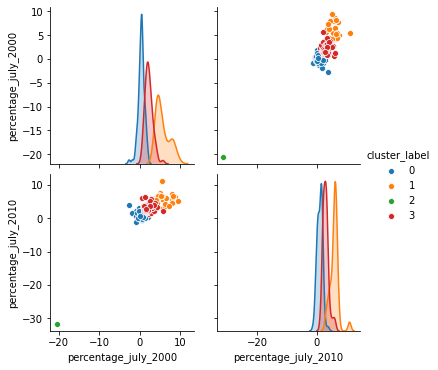

In [44]:
k_means = cluster.KMeans(n_clusters=4, max_iter = 1000)
k_means.fit(df_percentage_subset[[
        'percentage_july_2000', 'percentage_july_2010']])

df_percentage_subset['cluster_label'] = k_means.labels_

data_plot = sns.pairplot(df_percentage_subset, hue='cluster_label', vars =['percentage_july_2000', 'percentage_july_2010'])
data_plot

In [45]:
cluster_means = []

percentage_july_2000_mean = pd.DataFrame(df_percentage_subset.groupby(['cluster_label'])['percentage_july_2000'].mean())
percentage_july_2010_mean = pd.DataFrame(df_percentage_subset.groupby(['cluster_label'])['percentage_july_2010'].mean())

df_cluster_means = percentage_july_2000_mean.merge(percentage_july_2010_mean, left_index=True, right_index=True)
print(df_cluster_means)
df_percentage_subset[df_percentage_subset['cluster_label']==2].head()

               percentage_july_2000  percentage_july_2010
cluster_label                                            
0                          0.402483              1.092128
1                          5.662374              5.968280
2                        -20.533680            -31.610776
3                          2.250455              3.067742


,country,percentage_june_2000,percentage_june_2010,percentage_july_2000,percentage_july_2010,percentage_august_2000,percentage_august_2010,percentage_november_2000,percentage_november_2010,percentage_december_2000,percentage_december_2010,percentage_january_2000,percentage_january_2010,cluster_label
68,GRL,-11.269796,-17.324182,-20.53368,-31.610776,-21.458967,-19.7955,-0.162142,-3.243566,-10.709829,-5.360524,-8.645431,-15.767379,2


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

/home/rbhanda/.conda/envs/8650env/lib/python3.8/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/rbhanda/.conda/envs/8650env/lib/python3.8/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


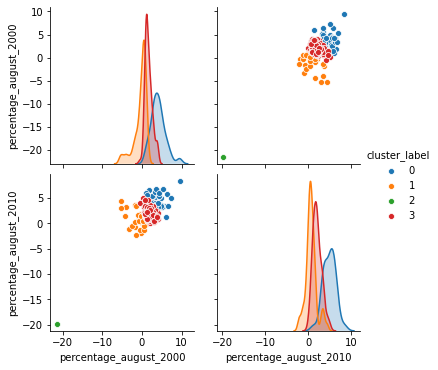

In [46]:
k_means = cluster.KMeans(n_clusters=4, max_iter = 1000)
k_means.fit(df_percentage_subset[[
        'percentage_august_2000', 'percentage_august_2010']])

df_percentage_subset['cluster_label'] = k_means.labels_

data_plot = sns.pairplot(df_percentage_subset, hue='cluster_label', vars =['percentage_august_2000', 'percentage_august_2010'])
data_plot

In [47]:
cluster_means = []

percentage_august_2000_mean = pd.DataFrame(df_percentage_subset.groupby(['cluster_label'])['percentage_august_2000'].mean())
percentage_august_2010_mean = pd.DataFrame(df_percentage_subset.groupby(['cluster_label'])['percentage_august_2010'].mean())

df_cluster_means = percentage_august_2000_mean.merge(percentage_august_2010_mean, left_index=True, right_index=True)
print(df_cluster_means)
df_percentage_subset[df_percentage_subset['cluster_label']==2].head()

               percentage_august_2000  percentage_august_2010
cluster_label                                                
0                            4.085462                4.912006
1                           -0.348448                0.660082
2                          -21.458967              -19.795500
3                            1.685671                2.062972


,country,percentage_june_2000,percentage_june_2010,percentage_july_2000,percentage_july_2010,percentage_august_2000,percentage_august_2010,percentage_november_2000,percentage_november_2010,percentage_december_2000,percentage_december_2010,percentage_january_2000,percentage_january_2010,cluster_label
68,GRL,-11.269796,-17.324182,-20.53368,-31.610776,-21.458967,-19.7955,-0.162142,-3.243566,-10.709829,-5.360524,-8.645431,-15.767379,2


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

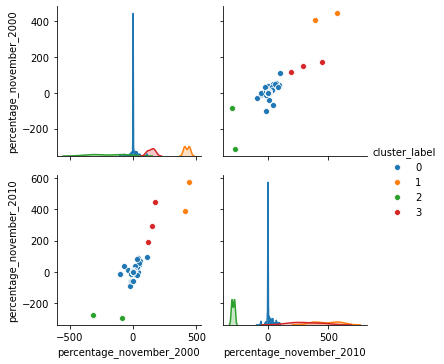

In [48]:
k_means = cluster.KMeans(n_clusters=4, max_iter = 1000)
k_means.fit(df_percentage_subset[[
        'percentage_november_2000', 'percentage_november_2010']])

df_percentage_subset['cluster_label'] = k_means.labels_

data_plot = sns.pairplot(df_percentage_subset, hue='cluster_label', vars =['percentage_november_2000', 'percentage_november_2010'])
data_plot

In [49]:
cluster_means = []

percentage_november_2000_mean = pd.DataFrame(df_percentage_subset.groupby(['cluster_label'])['percentage_november_2000'].mean())
percentage_november_2010_mean = pd.DataFrame(df_percentage_subset.groupby(['cluster_label'])['percentage_november_2010'].mean())

df_cluster_means = percentage_november_2000_mean.merge(percentage_november_2010_mean, left_index=True, right_index=True)
print(df_cluster_means)
df_percentage_subset[df_percentage_subset['cluster_label']==2].head()

               percentage_november_2000  percentage_november_2010
cluster_label                                                    
0                              3.928874                  5.491338
1                            426.923099                482.384036
2                           -200.019495               -284.142801
3                            145.187228                310.558057


,country,percentage_june_2000,percentage_june_2010,percentage_july_2000,percentage_july_2010,percentage_august_2000,percentage_august_2010,percentage_november_2000,percentage_november_2010,percentage_december_2000,percentage_december_2010,percentage_january_2000,percentage_january_2010,cluster_label
35,CHN,2.807923,2.439087,2.027337,2.101854,2.177876,3.307415,-315.435411,-273.791432,3.240383,2.104703,-7.279847,2.873983,2
101,LIE,11.911341,10.643766,5.058448,7.425491,-5.372026,2.995075,-84.603580,-294.494171,27.529588,-41.381250,22.062754,-4.518180,2


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

/home/rbhanda/.conda/envs/8650env/lib/python3.8/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/rbhanda/.conda/envs/8650env/lib/python3.8/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/rbhanda/.conda/envs/8650env/lib/python3.8/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/rbhanda/.conda/envs/8650env/lib/python3.8/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


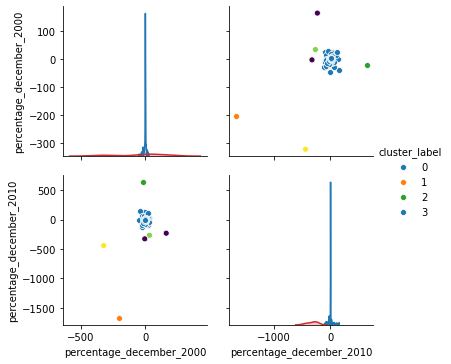

In [50]:
k_means = cluster.KMeans(n_clusters=4, max_iter = 1000)
k_means.fit(df_percentage_subset[[
        'percentage_december_2000', 'percentage_december_2010']])

df_percentage_subset['cluster_label'] = k_means.labels_

data_plot = sns.pairplot(df_percentage_subset, hue='cluster_label', vars =['percentage_december_2000', 'percentage_december_2010'])
data_plot

In [51]:
percentage_december_2000_mean = pd.DataFrame(df_percentage_subset.groupby(['cluster_label'])['percentage_december_2000'].mean())
percentage_december_2010_mean = pd.DataFrame(df_percentage_subset.groupby(['cluster_label'])['percentage_december_2010'].mean())

df_cluster_means = percentage_december_2000_mean.merge(percentage_december_2010_mean, left_index=True, right_index=True)
print(df_cluster_means)
df_percentage_subset[df_percentage_subset['cluster_label']==2].head()

               percentage_december_2000  percentage_december_2010
cluster_label                                                    
0                              0.393196                  1.404352
1                           -203.422736              -1674.489622
2                            -21.022917                640.310623
3                            -32.603537               -317.195485


,country,percentage_june_2000,percentage_june_2010,percentage_july_2000,percentage_july_2010,percentage_august_2000,percentage_august_2010,percentage_november_2000,percentage_november_2010,percentage_december_2000,percentage_december_2010,percentage_january_2000,percentage_january_2010,cluster_label
156,SVN,3.709049,4.973329,4.449279,6.723682,-1.389467,3.520506,18.200059,35.591282,-21.022917,640.310623,333.155871,-685.010731,2


In [52]:
# Analysis of Rainfall Patterns begin hereafter

In [53]:
rainfall.head()

,Rainfall - (MM),Year,Statistics,Country,Code
0,64.7765,1991,Jan Average,Afghanistan,AFG
1,59.4025,1991,Feb Average,Afghanistan,AFG
2,119.6250,1991,Mar Average,Afghanistan,AFG
3,51.8025,1991,Apr Average,Afghanistan,AFG
4,57.2438,1991,May Average,Afghanistan,AFG


In [54]:
rainfall['Code'] = rainfall['Code'].apply(lambda x: x.strip())
rainfall[' Year'] = rainfall[' Year'].astype('int')
rainfall[' Statistics'] = rainfall[' Statistics'].apply(lambda x: str(x).strip())

In [55]:
# Analyze % change in temperature data for January for the last 3 decades
rainfall.columns

country_code_for_analysis = list(rainfall['Code'].unique())
months = ['Jun', 'Jul', 'Aug', 'Nov', 'Dec', 'Jan']

june_1990 = []
june_2000 = []
june_2010 = []

percentage_june_2000 = []
percentage_june_2010 = []

july_1990 = []
july_2000 = []
july_2010 = []

percentage_july_2000 = []
percentage_july_2010 = []

august_1990 = []
august_2000 = []
august_2010 = []

percentage_august_2000 = []
percentage_august_2010 = []

november_1990 = []
november_2000 = []
november_2010 = []

percentage_november_2000 = []
percentage_november_2010 = []

december_1990 = []
december_2000 = []
december_2010 = []

percentage_december_2000 = []
percentage_december_2010 = []

january_1990 = []
january_2000 = []
january_2010 = []

percentage_january_2000 = []
percentage_january_2010 = []

for each_country in country_code_for_analysis:
    for month in months:
        m1 = rainfall[
            (rainfall[' Statistics'] == str(month) + ' Average') &  
            (rainfall['Code'] == each_country) & 
            (rainfall[' Year']  >1989) &
            (rainfall[' Year']  < 2001)]['Rainfall - (MM)'].mean()

        m2 = rainfall[
            (rainfall[' Statistics'] == str(month) + ' Average') &  
            (rainfall['Code'] == each_country) & 
            (rainfall[' Year']  > 2000) &
            (rainfall[' Year']  < 2011)]['Rainfall - (MM)'].mean()

        m3 = rainfall[
            (rainfall[' Statistics'] == str(month) + ' Average') &  
            (rainfall['Code'] == each_country) & 
            (rainfall[' Year']  > 2010) &
            (rainfall[' Year']  < 2020)]['Rainfall - (MM)'].mean()
        
        if month == 'Jun':
            june_1990.append(m1)
            june_2000.append(m2)
            june_2010.append(m3)
            
            percentage_june_2000.append((m2-m1)/m1*100)            
            percentage_june_2010.append((m3-m1)/m1*100)
        
        if month == 'Jul':
            july_1990.append(m1)
            july_2000.append(m2)
            july_2010.append(m3)
            
            percentage_july_2000.append((m2-m1)/m1*100)            
            percentage_july_2010.append((m3-m1)/m1*100)
        
        if month == 'Aug':            
            august_1990.append(m1)
            august_2000.append(m2)
            august_2010.append(m3)
            
            percentage_august_2000.append((m2-m1)/m1*100)            
            percentage_august_2010.append((m3-m1)/m1*100)
        
        if month == 'Nov':
            november_1990.append(m1)
            november_2000.append(m2)
            november_2010.append(m3)
            
            percentage_november_2000.append((m2-m1)/m1*100)            
            percentage_november_2010.append((m3-m1)/m1*100)
        
        if month == 'Dec':
            december_1990.append(m1)
            december_2000.append(m2)
            december_2010.append(m3)
            
            percentage_december_2000.append((m2-m1)/m1*100)            
            percentage_december_2010.append((m3-m1)/m1*100)
            
        if month == 'Jan':
            january_1990.append(m1)
            january_2000.append(m2)
            january_2010.append(m3)
            
            percentage_january_2000.append((m2-m1)/m1*100)            
            percentage_january_2010.append((m3-m1)/m1*100)


data_stats = {
    'country': country_code_for_analysis,
    'june_1990': june_1990, 
    'june_2000': june_2000, 
    'june_2010': june_2010, 
    'july_1990': july_1990, 
    'july_2000': july_2000,
    'july_2010': july_2010, 
    'august_1990': august_1990, 
    'august_2000': august_2000, 
    'august_2010': august_2010, 
    'november_1990':november_1990,
    'november_2000':november_2000,
    'november_2010':november_2010,
    'december_1990': december_1990,
    'december_2000': december_2000,
    'december_2010': december_2010,
    'january_1990': january_1990, 
    'january_2000': january_2000,
    'january_2010': january_2010
}

df_stat = pd.DataFrame(data=data_stats)

data_percentage ={
    'country': country_code_for_analysis,
    'percentage_june_2000': percentage_june_2000, 
    'percentage_june_2010': percentage_june_2010, 
    'percentage_july_2000': percentage_july_2000, 
    'percentage_july_2010': percentage_july_2010, 
    'percentage_august_2000': percentage_august_2000, 
    'percentage_august_2010': percentage_august_2010, 
    'percentage_november_2000':percentage_november_2000,
    'percentage_november_2010':percentage_november_2010,
    'percentage_december_2000': percentage_december_2000,
    'percentage_december_2010': percentage_december_2010,
    'percentage_january_2000': percentage_january_2000,
    'percentage_january_2010': percentage_january_2010
}

df_percentage = pd.DataFrame(data=data_percentage)

Index(['Rainfall - (MM)', ' Year', ' Statistics', ' Country', 'Code'], dtype='object')

<ipython-input-55-121ff45715f7>:82: RuntimeWarning: invalid value encountered in double_scalars
  percentage_july_2000.append((m2-m1)/m1*100)
<ipython-input-55-121ff45715f7>:83: RuntimeWarning: invalid value encountered in double_scalars
  percentage_july_2010.append((m3-m1)/m1*100)


In [56]:
df_percentage_subset = df_percentage[[
       'country', 
       'percentage_june_2000', 'percentage_june_2010',
       'percentage_july_2000', 'percentage_july_2010',
       'percentage_august_2000', 'percentage_august_2010',
       'percentage_november_2000', 'percentage_november_2010',
       'percentage_december_2000', 'percentage_december_2010',
       'percentage_january_2000', 'percentage_january_2010'
]]

# df_stat_subset[df_stat_subset.isna().any(axis=1)]
df_percentage_subset = df_percentage_subset.dropna()

df_percentage_subset.head()

,country,percentage_june_2000,percentage_june_2010,percentage_july_2000,percentage_july_2010,percentage_august_2000,percentage_august_2010,percentage_november_2000,percentage_november_2010,percentage_december_2000,percentage_december_2010,percentage_january_2000,percentage_january_2010
0,AFG,3.888255,-20.584952,6.362559,-14.514028,49.182706,70.926766,28.894427,108.733684,38.423828,-13.508513,-8.054398,-28.476158
1,ALB,44.629454,57.824826,-9.223883,-21.286319,-2.353005,-35.584549,-18.917279,-23.097617,5.324408,-30.379698,46.822962,40.910538
2,DZA,-17.995947,-3.383681,56.560008,4.968516,22.681345,18.218087,22.498327,24.491267,30.844348,-14.967411,11.964593,-23.678366
3,AND,-38.448142,-24.933908,-2.300403,59.545036,-5.808437,-16.687957,-26.760395,32.405308,-31.442160,-70.156334,0.653928,-18.137281
4,AGO,100.734301,49.674876,7.662376,-5.898683,28.185162,2.397762,6.524026,3.243526,-2.182594,15.820816,-1.300127,-9.457844


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

/home/rbhanda/.conda/envs/8650env/lib/python3.8/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/rbhanda/.conda/envs/8650env/lib/python3.8/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


               percentage_august_2000  percentage_august_2010
cluster_label                                                
0                            0.253913               -2.906159
1                         3854.486061              298.412912
2                          358.944460              427.414585
3                           50.614526               49.814792


,country,percentage_june_2000,percentage_june_2010,percentage_july_2000,percentage_july_2010,percentage_august_2000,percentage_august_2010,percentage_november_2000,percentage_november_2010,percentage_december_2000,percentage_december_2010,percentage_january_2000,percentage_january_2010,cluster_label
22,BWA,244.368755,284.930996,-55.123082,76.245862,474.035329,553.776713,-3.340404,-24.189784,-4.205337,9.799995,-1.772671,-13.073931,2
97,LBN,-33.251834,-33.151419,105.717220,141.717068,243.853591,301.052457,-10.509738,1.770196,-6.410057,8.785354,-2.312987,13.912956,2


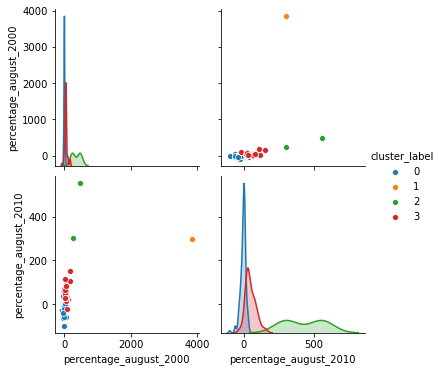

In [57]:
k_means = cluster.KMeans(n_clusters=4, max_iter = 1000)
k_means.fit(df_percentage_subset[[
        'percentage_august_2000', 'percentage_august_2010']])

df_percentage_subset['cluster_label'] = k_means.labels_

data_plot = sns.pairplot(df_percentage_subset, hue='cluster_label', vars =['percentage_august_2000', 'percentage_august_2010'])
data_plot

percentage_august_2000_mean = pd.DataFrame(df_percentage_subset.groupby(['cluster_label'])['percentage_august_2000'].mean())
percentage_august_2010_mean = pd.DataFrame(df_percentage_subset.groupby(['cluster_label'])['percentage_august_2010'].mean())

df_cluster_means = percentage_august_2000_mean.merge(percentage_august_2010_mean, left_index=True, right_index=True)
print(df_cluster_means)
df_percentage_subset[df_percentage_subset['cluster_label']==2].head()

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

/home/rbhanda/.conda/envs/8650env/lib/python3.8/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/rbhanda/.conda/envs/8650env/lib/python3.8/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


               percentage_august_2000  percentage_july_2010
cluster_label                                              
0                            0.253913             -9.563156
1                         3854.486061            393.867994
2                          358.944460             29.539098
3                           50.614526            142.346764


,country,percentage_june_2000,percentage_june_2010,percentage_july_2000,percentage_july_2010,percentage_august_2000,percentage_august_2010,percentage_november_2000,percentage_november_2010,percentage_december_2000,percentage_december_2010,percentage_january_2000,percentage_january_2010,cluster_label
2,DZA,-17.995947,-3.383681,56.560008,4.968516,22.681345,18.218087,22.498327,24.491267,30.844348,-14.967411,11.964593,-23.678366,2
3,AND,-38.448142,-24.933908,-2.300403,59.545036,-5.808437,-16.687957,-26.760395,32.405308,-31.442160,-70.156334,0.653928,-18.137281,2
5,ATG,43.366153,-20.104163,24.477551,11.926808,53.428791,18.800103,-6.826765,-6.959992,-9.656793,-2.817191,4.742473,-27.942855,2
6,ARG,-23.484102,-23.600875,11.596248,10.259400,12.705392,27.125635,-5.650264,-2.490941,-7.269564,-10.365711,-8.021168,-3.980810,2
7,ARM,5.002186,8.105001,41.645093,17.376632,62.302460,29.022188,-1.408270,-5.070739,-4.466048,7.154461,19.460298,31.674582,2


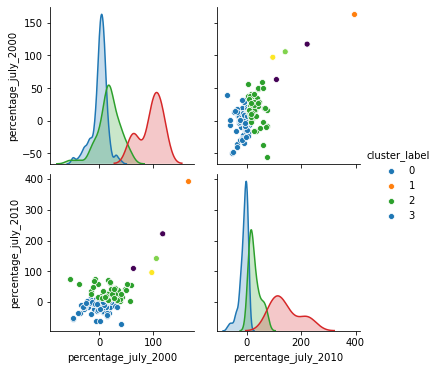

In [58]:
k_means = cluster.KMeans(n_clusters=4, max_iter = 1000)
k_means.fit(df_percentage_subset[[
        'percentage_july_2000', 'percentage_july_2010']])

df_percentage_subset['cluster_label'] = k_means.labels_

data_plot = sns.pairplot(df_percentage_subset, hue='cluster_label', vars =['percentage_july_2000', 'percentage_july_2010'])
data_plot

percentage_july_2000_mean = pd.DataFrame(df_percentage_subset.groupby(['cluster_label'])['percentage_july_2000'].mean())
percentage_july_2010_mean = pd.DataFrame(df_percentage_subset.groupby(['cluster_label'])['percentage_july_2010'].mean())

df_cluster_means = percentage_august_2000_mean.merge(percentage_july_2010_mean, left_index=True, right_index=True)
print(df_cluster_means)
df_percentage_subset[df_percentage_subset['cluster_label']==2].head()

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

/home/rbhanda/.conda/envs/8650env/lib/python3.8/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/rbhanda/.conda/envs/8650env/lib/python3.8/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


               percentage_november_2000  percentage_november_2010
cluster_label                                                    
0                             -8.243464                -18.830267
1                             10.950736                 21.816516
2                             25.383621                144.314699
3                            227.549817                118.366545


,country,percentage_june_2000,percentage_june_2010,percentage_july_2000,percentage_july_2010,percentage_august_2000,percentage_august_2010,percentage_november_2000,percentage_november_2010,percentage_december_2000,percentage_december_2010,percentage_january_2000,percentage_january_2010,cluster_label
0,AFG,3.888255,-20.584952,6.362559,-14.514028,49.182706,70.926766,28.894427,108.733684,38.423828,-13.508513,-8.054398,-28.476158,2
109,MLI,22.694082,8.373483,0.972529,2.438935,0.268249,11.701425,74.903777,94.364680,233.212599,43.543971,30.445726,19.067478,2
118,MAR,-27.208430,-25.274421,16.078507,27.507229,13.115022,47.377397,63.746070,114.973432,4.533401,-47.479815,-7.137981,-16.432927,2
131,OMN,-19.713977,34.477155,-15.099397,-38.812287,-17.673030,-58.870678,10.251239,250.486534,63.776209,-52.927416,-31.264997,-71.658489,2
185,ARE,-15.719711,-50.777338,-48.807842,-54.793048,-14.419203,-3.057995,-50.877406,153.015164,-16.313618,-60.620401,-40.967696,-53.743691,2


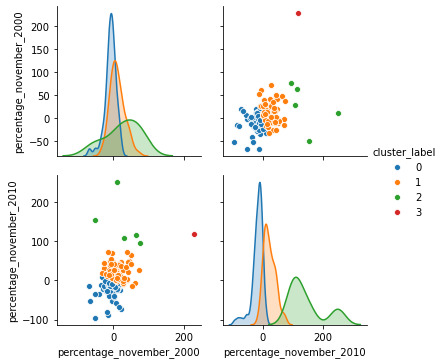

In [59]:
k_means = cluster.KMeans(n_clusters=4, max_iter = 1000)
k_means.fit(df_percentage_subset[[
        'percentage_november_2000', 'percentage_november_2010']])

df_percentage_subset['cluster_label'] = k_means.labels_

data_plot = sns.pairplot(df_percentage_subset, hue='cluster_label', vars =['percentage_november_2000', 'percentage_november_2010'])
data_plot

percentage_november_2000_mean = pd.DataFrame(df_percentage_subset.groupby(['cluster_label'])['percentage_november_2000'].mean())
percentage_november_2010_mean = pd.DataFrame(df_percentage_subset.groupby(['cluster_label'])['percentage_november_2010'].mean())

df_cluster_means = percentage_november_2000_mean.merge(percentage_november_2010_mean, left_index=True, right_index=True)
print(df_cluster_means)
df_percentage_subset[df_percentage_subset['cluster_label']==2].head()

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

<ipython-input-60-2a515b11f4aa>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_percentage_subset['cluster_label'] = k_means.labels_
/home/rbhanda/.conda/envs/8650env/lib/python3.8/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/rbhanda/.conda/envs/8650env/lib/python3.8/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


               percentage_december_2000  percentage_december_2010
cluster_label                                                    
0                             27.492368                 29.331691
1                             -6.105512                  4.196724
2                             -1.411551                -37.724376
3                            233.212599                 43.543971


,country,percentage_june_2000,percentage_june_2010,percentage_july_2000,percentage_july_2010,percentage_august_2000,percentage_august_2010,percentage_november_2000,percentage_november_2010,percentage_december_2000,percentage_december_2010,percentage_january_2000,percentage_january_2010,cluster_label
1,ALB,44.629454,57.824826,-9.223883,-21.286319,-2.353005,-35.584549,-18.917279,-23.097617,5.324408,-30.379698,46.822962,40.910538,2
2,DZA,-17.995947,-3.383681,56.560008,4.968516,22.681345,18.218087,22.498327,24.491267,30.844348,-14.967411,11.964593,-23.678366,2
3,AND,-38.448142,-24.933908,-2.300403,59.545036,-5.808437,-16.687957,-26.760395,32.405308,-31.442160,-70.156334,0.653928,-18.137281,2
9,AUT,2.217062,6.636408,-6.357187,-1.683067,24.515535,6.905300,-15.453146,-24.051080,-11.706490,-33.873470,34.818888,93.102010,2
13,BGD,8.884915,0.847926,-3.101503,2.386335,-13.877365,27.240967,-2.829753,-53.889510,-14.414206,-38.881089,-43.357295,-40.703924,2


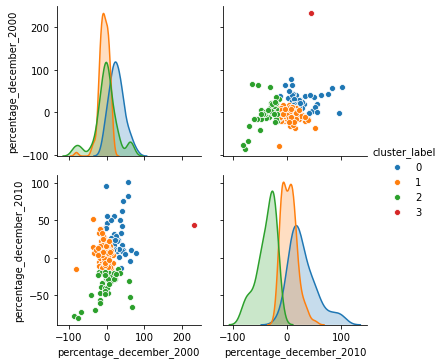

In [60]:
df_percentage_subset = df_percentage_subset[df_percentage_subset['percentage_december_2010']< 400]

k_means = cluster.KMeans(n_clusters=4, max_iter = 1000)

k_means.fit(df_percentage_subset[[
        'percentage_december_2000', 'percentage_december_2010']])

df_percentage_subset['cluster_label'] = k_means.labels_

data_plot = sns.pairplot(df_percentage_subset, hue='cluster_label', vars =['percentage_december_2000', 'percentage_december_2010'])
data_plot

percentage_december_2000_mean = pd.DataFrame(df_percentage_subset.groupby(['cluster_label'])['percentage_december_2000'].mean())
percentage_december_2010_mean = pd.DataFrame(df_percentage_subset.groupby(['cluster_label'])['percentage_december_2010'].mean())

df_cluster_means = percentage_december_2000_mean.merge(percentage_december_2010_mean, left_index=True, right_index=True)
print(df_cluster_means)
df_percentage_subset[df_percentage_subset['cluster_label']==2].head()

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

/home/rbhanda/.conda/envs/8650env/lib/python3.8/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/rbhanda/.conda/envs/8650env/lib/python3.8/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


               percentage_january_2000  percentage_january_2010
cluster_label                                                  
0                           -15.183623               -30.476306
1                            41.155932                58.386294
2                             6.005931                 5.818748
3                           225.104295                67.337501


,country,percentage_june_2000,percentage_june_2010,percentage_july_2000,percentage_july_2010,percentage_august_2000,percentage_august_2010,percentage_november_2000,percentage_november_2010,percentage_december_2000,percentage_december_2010,percentage_january_2000,percentage_january_2010,cluster_label
4,AGO,100.734301,49.674876,7.662376,-5.898683,28.185162,2.397762,6.524026,3.243526,-2.182594,15.820816,-1.300127,-9.457844,2
6,ARG,-23.484102,-23.600875,11.596248,10.259400,12.705392,27.125635,-5.650264,-2.490941,-7.269564,-10.365711,-8.021168,-3.980810,2
7,ARM,5.002186,8.105001,41.645093,17.376632,62.302460,29.022188,-1.408270,-5.070739,-4.466048,7.154461,19.460298,31.674582,2
8,AUS,-6.506283,8.888270,-15.475646,-5.770393,-11.780154,-11.768949,-4.287226,-4.948265,-5.428289,-12.244300,7.057626,12.009812,2
10,AZE,-4.658062,6.207603,31.422734,-5.129508,40.184197,23.143812,-8.536852,-22.623944,3.786061,-4.687181,16.264193,6.250462,2


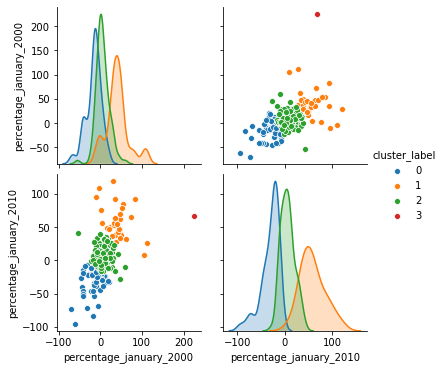

In [61]:
df_percentage_subset = df_percentage_subset[df_percentage_subset['percentage_january_2010']< 400]

k_means = cluster.KMeans(n_clusters=4, max_iter = 1000)

k_means.fit(df_percentage_subset[[
        'percentage_january_2000', 'percentage_january_2010']])

df_percentage_subset['cluster_label'] = k_means.labels_

data_plot = sns.pairplot(df_percentage_subset, hue='cluster_label', vars =['percentage_january_2000', 'percentage_january_2010'])
data_plot

percentage_january_2000_mean = pd.DataFrame(df_percentage_subset.groupby(['cluster_label'])['percentage_january_2000'].mean())
percentage_january_2010_mean = pd.DataFrame(df_percentage_subset.groupby(['cluster_label'])['percentage_january_2010'].mean())

df_cluster_means = percentage_january_2000_mean.merge(percentage_january_2010_mean, left_index=True, right_index=True)
print(df_cluster_means)
df_percentage_subset[df_percentage_subset['cluster_label']==2].head()

In [62]:
# Regression Analysis and Prediction starts below
'''
    Temperature = CO2 + NO2 + Methane + Forest Area
    Rainfall = CO2 + NO2 + Methane + Forest Area

'''

'\n    Temperature = CO2 + NO2 + Methane + Forest Area\n    Rainfall = CO2 + NO2 + Methane + Forest Area\n\n'

In [63]:
# Effect Mining: Socio-economic analysis
# Analyze Temperature, Rainfall dataset to the land area
# Analyze Temperature, Rainfall dataset to the forest area
# Analyze Temperature, Rainfall dataset to the agricultural production
# Analyze Temperature, Rainfall dataset to the Agriculture, Forestry and Fishing value contribution to the GDP
# Deaths by Communicable Diseases
# Employment in Agriculture

# '''
#     Cause Factors for Analysis:
#         SF6 gas emissions (thousand metric tons of CO2 equivalent)
#         PFC gas emissions (thousand metric tons of CO2 equivalent)
#         Nitrous oxide emissions (thousand metric tons of CO2 equivalent)
#         Methane emissions (kt of CO2 equivalent)
#         HFC gas emissions (thousand metric tons of CO2 equivalent)
#         CO2 emissions (kt)
#         Electric power consumption (kWh per capita)
# '''

# '''
#         Population growth (annual %)
#         Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)
#         Mortality rate, under-5 (per 1,000 live births)
#         Agriculture, forestry, and fishing, value added (% of GDP)
#         Droughts, floods, extreme temperatures (% of population, average 1990-2009)
#         Cereal yield (kg per hectare)
#         Agricultural irrigated land (% of total agricultural land)
#         Forest area (sq. km)
#         Agricultural land (sq. km)
# '''


In [64]:
new_indicators.head()
rainfall_with_indicators = rainfall.merge(
    new_indicators, left_on=['Code', ' Year'], 
    right_on=['Country Code', 'Year'], 
    how='inner'
)

,Country Name,Country Code,Population growth (annual %),Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population),"Mortality rate, under-5 (per 1,000 live births)","Agriculture, forestry, and fishing, value added (% of GDP)","Droughts, floods, extreme temperatures (% of population, average 1990-2009)",Nitrous oxide emissions (thousand metric tons of CO2 equivalent),Methane emissions (kt of CO2 equivalent),CO2 emissions (kt),Energy use (kg of oil equivalent per capita),Cereal yield (kg per hectare),Agricultural irrigated land (% of total agricultural land),Forest area (sq. km),Agricultural land (sq. km),Year
0,Aruba,ABW,3.902018,NaN,NaN,NaN,NaN,11.862274,15.4860,1683.153,NaN,NaN,NaN,4.2,20.0,1991
1,Aruba,ABW,5.440272,NaN,NaN,NaN,NaN,12.133462,15.8980,1463.133,NaN,NaN,NaN,4.2,20.0,1992
2,Aruba,ABW,6.068410,NaN,NaN,NaN,NaN,12.684115,16.3861,1595.145,NaN,NaN,NaN,4.2,20.0,1993
3,Aruba,ABW,5.625998,NaN,NaN,NaN,NaN,13.239976,16.8768,1613.480,NaN,NaN,NaN,4.2,20.0,1994
4,Aruba,ABW,4.616675,NaN,NaN,0.505997,NaN,13.292831,17.2964,1668.485,NaN,NaN,NaN,4.2,20.0,1995


In [65]:
temperature.columns
rainfall_with_indicators.columns

temperature['Country Code'] = temperature['Country Code'].apply(lambda x: x.strip())
temperature[' Statistics'] = temperature[' Statistics'].apply(lambda x: str(x).strip())
temperature[' Year'] = temperature[' Year'].apply(lambda x: str(int(x)))
 
rainfall_with_indicators['Code'] = rainfall_with_indicators['Country Code'].apply(lambda x: x.strip())
rainfall_with_indicators[' Statistics'] = rainfall_with_indicators[' Statistics'].apply(lambda x: str(x).strip())
rainfall_with_indicators[' Year'] = rainfall_with_indicators[' Year'].apply(lambda x: str(int(x)))

temperature_and_rainfall = temperature.merge(
    rainfall_with_indicators, 
    left_on=['Country Code', ' Year', ' Statistics'], 
    right_on=['Code', ' Year', ' Statistics'], 
    how='inner'
)

Index(['Temperature - (Celsius)', ' Year', ' Statistics', ' Country',
       'Country Code'],
      dtype='object')

Index(['Rainfall - (MM)', ' Year', ' Statistics', ' Country', 'Code',
       'Country Name', 'Country Code', 'Population growth (annual %)',
       'Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)',
       'Mortality rate, under-5 (per 1,000 live births)',
       'Agriculture, forestry, and fishing, value added (% of GDP)',
       'Droughts, floods, extreme temperatures (% of population, average 1990-2009)',
       'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)',
       'Methane emissions (kt of CO2 equivalent)', 'CO2 emissions (kt)',
       'Energy use (kg of oil equivalent per capita)',
       'Cereal yield (kg per hectare)',
       'Agricultural irrigated land (% of total agricultural land)',
       'Forest area (sq. km)', 'Agricultural land (sq. km)', 'Year'],
      dtype='object')

In [66]:
temperature_and_rainfall.head()

,Temperature - (Celsius),Year,Statistics,Country_x,Country Code_x,Rainfall - (MM),Country_y,Code,Country Name,Country Code_y,...,"Droughts, floods, extreme temperatures (% of population, average 1990-2009)",Nitrous oxide emissions (thousand metric tons of CO2 equivalent),Methane emissions (kt of CO2 equivalent),CO2 emissions (kt),Energy use (kg of oil equivalent per capita),Cereal yield (kg per hectare),Agricultural irrigated land (% of total agricultural land),Forest area (sq. km),Agricultural land (sq. km),Year
0,-0.03110,1991,Jan Average,Afghanistan,AFG,64.7765,Afghanistan,AFG,Afghanistan,AFG,...,NaN,2755.8938,7702.08,2438.555,NaN,1160.4,NaN,13500.0,380300.0,1991
1,1.43654,1991,Feb Average,Afghanistan,AFG,59.4025,Afghanistan,AFG,Afghanistan,AFG,...,NaN,2755.8938,7702.08,2438.555,NaN,1160.4,NaN,13500.0,380300.0,1991
2,6.88685,1991,Mar Average,Afghanistan,AFG,119.6250,Afghanistan,AFG,Afghanistan,AFG,...,NaN,2755.8938,7702.08,2438.555,NaN,1160.4,NaN,13500.0,380300.0,1991
3,12.93970,1991,Apr Average,Afghanistan,AFG,51.8025,Afghanistan,AFG,Afghanistan,AFG,...,NaN,2755.8938,7702.08,2438.555,NaN,1160.4,NaN,13500.0,380300.0,1991
4,17.07550,1991,May Average,Afghanistan,AFG,57.2438,Afghanistan,AFG,Afghanistan,AFG,...,NaN,2755.8938,7702.08,2438.555,NaN,1160.4,NaN,13500.0,380300.0,1991


In [67]:
temperature_subset_for_analysis = temperature_and_rainfall[['Temperature - (Celsius)', ' Year', ' Statistics', 'Country Name',
       'Code', 'Population growth (annual %)']]

In [68]:
temperature_subset_for_analysis.columns
temperature_subset_for_analysis.head()

Index(['Temperature - (Celsius)', ' Year', ' Statistics', 'Country Name',
       'Code', 'Population growth (annual %)'],
      dtype='object')

,Temperature - (Celsius),Year,Statistics,Country Name,Code,Population growth (annual %)
0,-0.03110,1991,Jan Average,Afghanistan,AFG,6.900156
1,1.43654,1991,Feb Average,Afghanistan,AFG,6.900156
2,6.88685,1991,Mar Average,Afghanistan,AFG,6.900156
3,12.93970,1991,Apr Average,Afghanistan,AFG,6.900156
4,17.07550,1991,May Average,Afghanistan,AFG,6.900156


In [69]:
# Task - Calculate % change in temperature for decade from monthly data for a year

In [70]:
# With change is the temperature how is population growth is changing
temperature_subset_pivoted = temperature_and_rainfall.pivot_table(
    index=[' Year', 'Country Name', 'Code', 'Population growth (annual %)'],
    columns=' Statistics', values='Temperature - (Celsius)', aggfunc='first').reset_index()
temperature_subset_pivoted_and_sorted = temperature_subset_pivoted.sort_values(['Code', ' Year'])

In [71]:
temperature_subset_pivoted_and_sorted.head()

Statistics,Year,Country Name,Code,Population growth (annual %),Apr Average,Aug Average,Dec Average,Feb Average,Jan Average,Jul Average,Jun Average,Mar Average,May Average,Nov Average,Oct Average,Sep Average
0,1991,Afghanistan,AFG,6.900156,12.9397,23.9673,4.23571,1.43654,-0.03110,25.5710,23.0777,6.88685,17.0755,7.31675,12.8779,19.3800
191,1992,Afghanistan,AFG,8.546120,11.6926,22.8633,4.47636,2.46018,0.74637,24.7068,22.8875,5.71341,16.1108,8.32035,12.6981,17.8588
382,1993,Afghanistan,AFG,8.790889,13.3735,23.3201,3.32008,4.33465,-0.08350,24.6320,22.8880,6.12034,18.7452,7.40369,12.0373,19.6343
573,1994,Afghanistan,AFG,7.659777,11.9926,24.5555,2.50841,1.14112,1.11415,25.0045,23.8788,8.97734,18.6745,9.50640,12.5059,17.1010
764,1995,Afghanistan,AFG,5.884257,12.2676,24.3760,1.76217,2.96133,0.92358,25.7798,23.4941,6.36893,18.1187,7.86943,13.5466,19.0225


In [72]:
temperature_subset_pivoted_and_sorted['avg'] = temperature_subset_pivoted_and_sorted.iloc[:, [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]].mean(axis=1)
temperature_subset_pivoted_and_sorted['Monthly Population Growth'] = temperature_subset_pivoted_and_sorted['Population growth (annual %)']/12
temperature_subset_pivoted_and_sorted[temperature_subset_pivoted_and_sorted['Code']=='AFG'].head()

Statistics,Year,Country Name,Code,Population growth (annual %),Apr Average,Aug Average,Dec Average,Feb Average,Jan Average,Jul Average,Jun Average,Mar Average,May Average,Nov Average,Oct Average,Sep Average,avg,Monthly Population Growth
0,1991,Afghanistan,AFG,6.900156,12.9397,23.9673,4.23571,1.43654,-0.03110,25.5710,23.0777,6.88685,17.0755,7.31675,12.8779,19.3800,12.894487,0.575013
191,1992,Afghanistan,AFG,8.546120,11.6926,22.8633,4.47636,2.46018,0.74637,24.7068,22.8875,5.71341,16.1108,8.32035,12.6981,17.8588,12.544548,0.712177
382,1993,Afghanistan,AFG,8.790889,13.3735,23.3201,3.32008,4.33465,-0.08350,24.6320,22.8880,6.12034,18.7452,7.40369,12.0373,19.6343,12.977138,0.732574
573,1994,Afghanistan,AFG,7.659777,11.9926,24.5555,2.50841,1.14112,1.11415,25.0045,23.8788,8.97734,18.6745,9.50640,12.5059,17.1010,13.080018,0.638315
764,1995,Afghanistan,AFG,5.884257,12.2676,24.3760,1.76217,2.96133,0.92358,25.7798,23.4941,6.36893,18.1187,7.86943,13.5466,19.0225,13.040895,0.490355


Text(0.5, 0, 'Month')

Text(0, 0.5, 'Average Temperature')

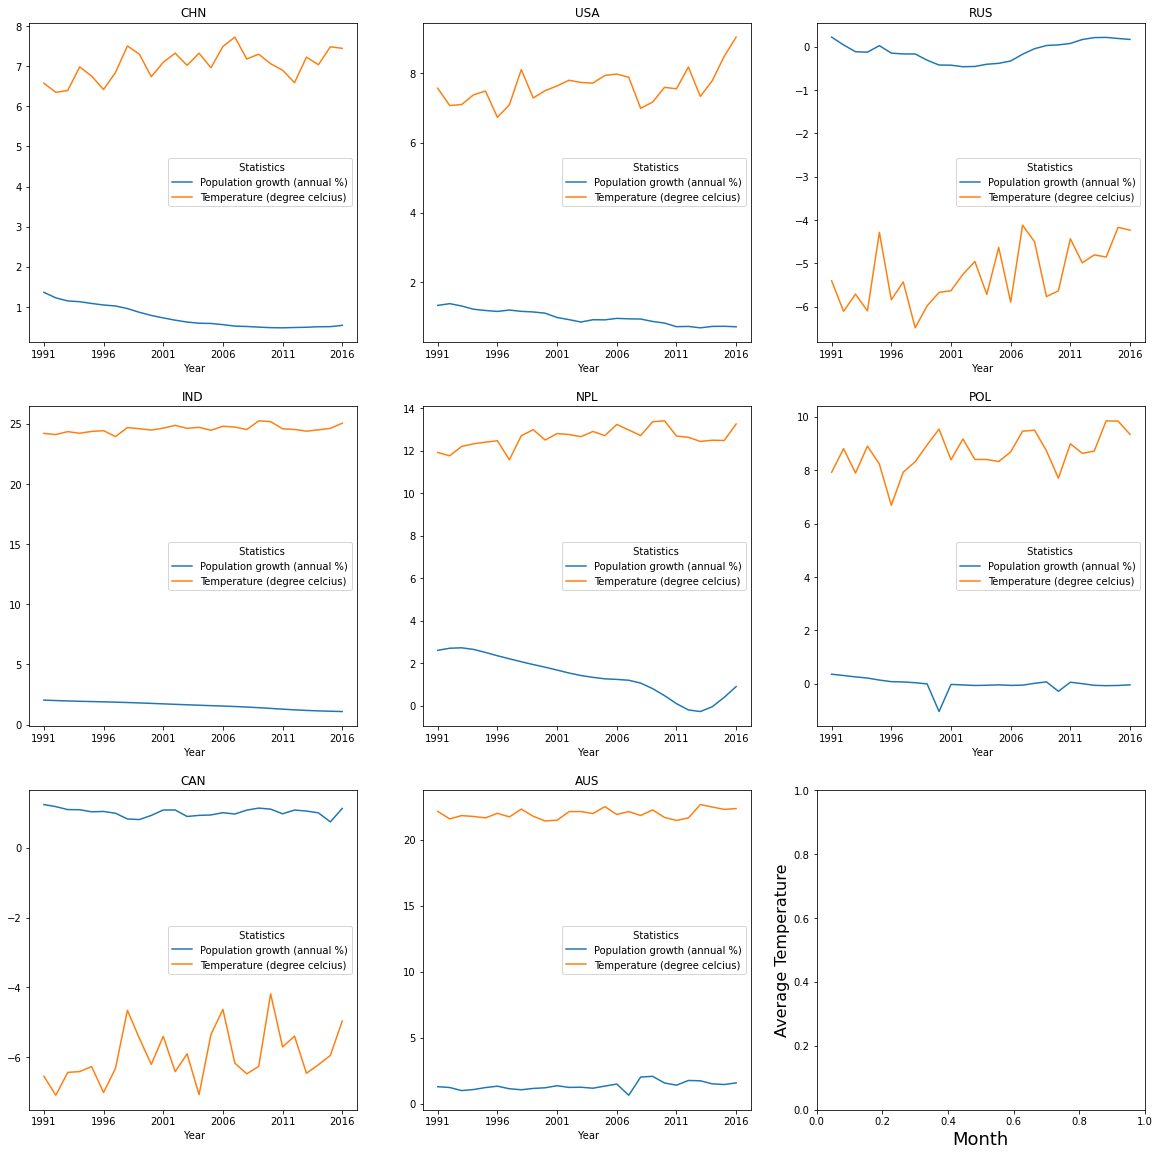

In [73]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,20))
plt.xlabel('Month', fontsize=18)
plt.ylabel('Average Temperature', fontsize=16)

country_code_for_analysis = ['CHN', 'USA', 'RUS', 'IND', 'NPL', 'POL', 'CAN', 'AUS']

temperature_subset_pivoted_and_sorted['Temperature (degree celcius)'] = temperature_subset_pivoted_and_sorted['avg']

for i in range(len(country_code_for_analysis)):
    ix = np.unravel_index(i, axes.shape) # compute an appropriate index (1d or 2d)

    temperature_subset_pivoted_and_sorted[
        [' Year', 'Population growth (annual %)', 'Temperature (degree celcius)']][
        temperature_subset_pivoted_and_sorted['Code']==country_code_for_analysis[i]].plot.line(x=' Year', ax=axes[ix], 
                                                                        title=country_code_for_analysis[i])

In [74]:
temperature_subset_pivoted_and_sorted.columns

Index([' Year', 'Country Name', 'Code', 'Population growth (annual %)',
       'Apr Average', 'Aug Average', 'Dec Average', 'Feb Average',
       'Jan Average', 'Jul Average', 'Jun Average', 'Mar Average',
       'May Average', 'Nov Average', 'Oct Average', 'Sep Average', 'avg',
       'Monthly Population Growth', 'Temperature (degree celcius)'],
      dtype='object', name=' Statistics')

In [75]:
# Cluster analysis of the countries with respect to temperature change and population growth here

country_code_for_analysis = list(rainfall['Code'].unique())
months = ['Jun', 'Jul', 'Aug', 'Nov', 'Dec', 'Jan']
temperature_subset_pivoted_and_sorted[' Year'] = temperature_subset_pivoted_and_sorted[' Year'].astype('int')
population_growth_1990 = []
population_growth_2000 = []
population_growth_2010 = []

percentage_change_population_growth_2000 = []
percentage_change_population_growth_2010 = []

for each_country in country_code_for_analysis:
    m1 = temperature_subset_pivoted_and_sorted[
        (temperature_subset_pivoted_and_sorted['Code'] == each_country) & 
        (temperature_subset_pivoted_and_sorted[' Year']  >1989) &
        (temperature_subset_pivoted_and_sorted[' Year']  < 2001)][
        'Population growth (annual %)'].mean()

    m2 = temperature_subset_pivoted_and_sorted[
        (temperature_subset_pivoted_and_sorted['Code'] == each_country) & 
        (temperature_subset_pivoted_and_sorted[' Year']  > 2000) &
        (temperature_subset_pivoted_and_sorted[' Year']  < 2010)][
        'Population growth (annual %)'].mean()
    
    m3 = temperature_subset_pivoted_and_sorted[
        (temperature_subset_pivoted_and_sorted['Code'] == each_country) & 
        (temperature_subset_pivoted_and_sorted[' Year']  > 2010) &
        (temperature_subset_pivoted_and_sorted[' Year']  < 2021)][
        'Population growth (annual %)'].mean()
    
    population_growth_1990.append(m1)
    population_growth_2000.append(m2)
    population_growth_2010.append(m3)
    percentage_change_population_growth_2000.append((m2-m1)/m1*100)            
    percentage_change_population_growth_2010.append((m3-m1)/m1*100)

data_stats = {
    'country': country_code_for_analysis,
    '%_change_pop_growth_1990': population_growth_1990,
    '%_change_pop_growth_2000': population_growth_2000,
    '%_change_pop_growth_2010': population_growth_2010,
    '%_change_pop_growth_2000': percentage_change_population_growth_2000,
    '%_change_pop_growth_2010': percentage_change_population_growth_2010
}

df_stat = pd.DataFrame(data=data_stats)
df_stat.head()

k_means = cluster.KMeans(n_clusters=5, max_iter = 200000)
df_stat = df_stat.dropna()
k_means.fit(df_stat[[
        '%_change_pop_growth_2000', '%_change_pop_growth_2010']])

df_stat['cluster_label'] = k_means.labels_

df_stat_2000_mean = pd.DataFrame(df_stat.groupby(['cluster_label'])['%_change_pop_growth_2000'].mean())
df_stat_2010_mean = pd.DataFrame(df_stat.groupby(['cluster_label'])['%_change_pop_growth_2010'].mean())

df_cluster_means = df_stat_2000_mean.merge(df_stat_2010_mean, left_index=True, right_index=True)
df_cluster_means


,country,%_change_pop_growth_1990,%_change_pop_growth_2000,%_change_pop_growth_2010
0,AFG,5.153002,-32.678339,-37.718227
1,ALB,-0.619798,-3.730546,-65.700839
2,DZA,1.865697,-22.880411,6.910814
3,AND,1.820035,56.251088,-181.035666
4,AGO,3.248136,8.487711,8.259523


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=200000,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

,%_change_pop_growth_2000,%_change_pop_growth_2010
cluster_label,,
0,-219.648242,-246.114366
1,-1.609816,-15.718666
2,2207.948272,819.198042
3,349.290163,550.475293
4,-918.371971,-408.293980


Text(0.5, 0, 'Year')

Text(0, 0.5, '')

/home/rbhanda/.conda/envs/8650env/lib/python3.8/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/rbhanda/.conda/envs/8650env/lib/python3.8/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


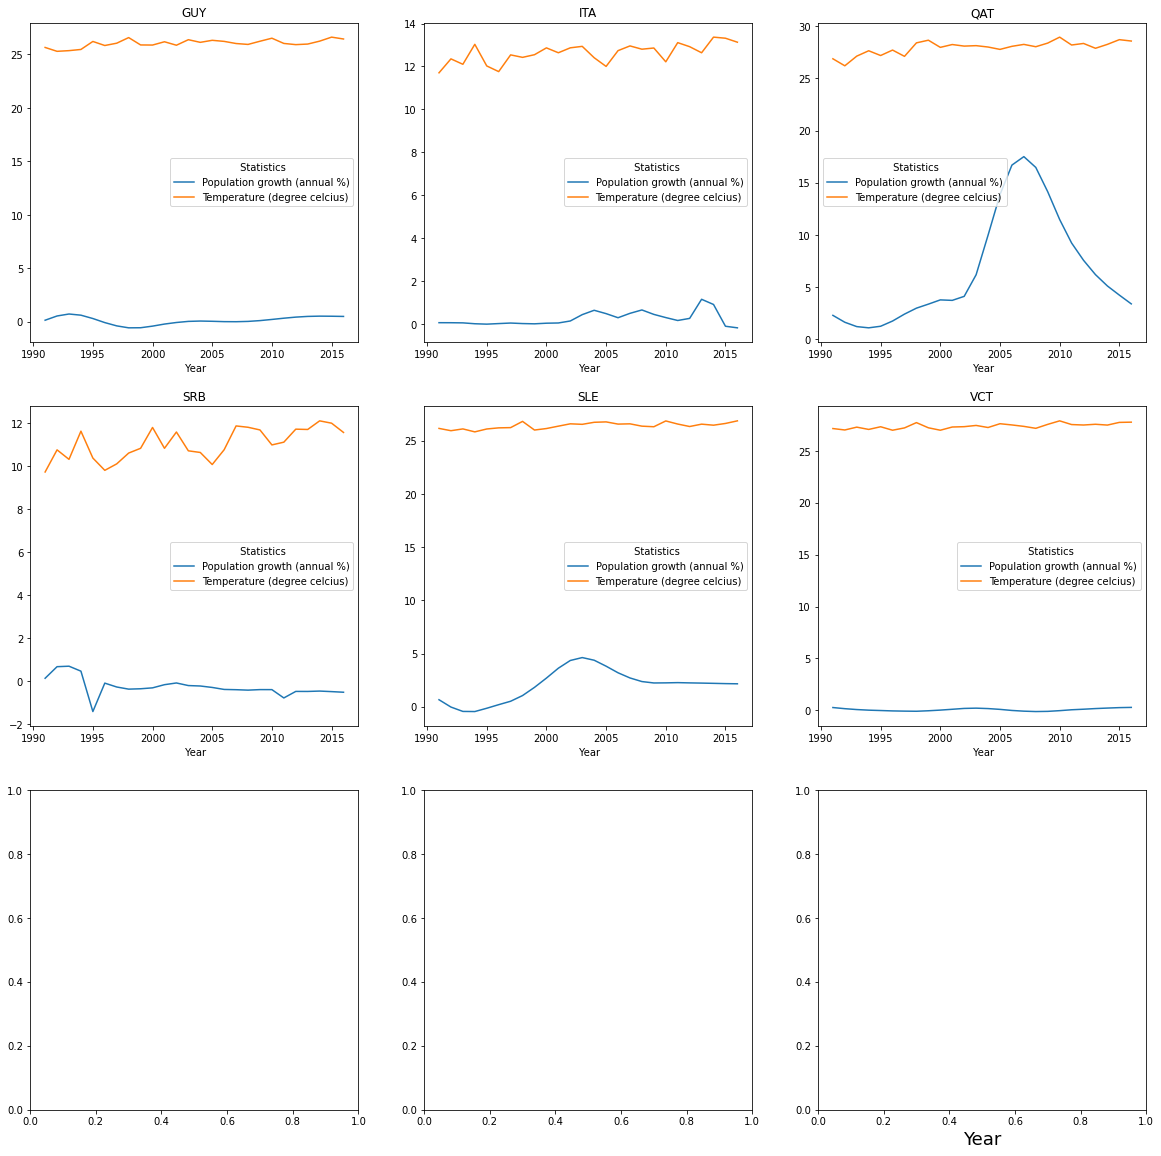

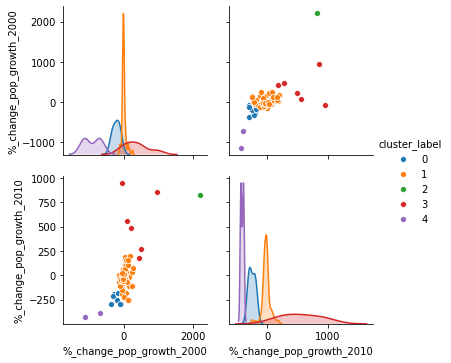

In [76]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,20))
plt.xlabel('Year', fontsize=18)
plt.ylabel('', fontsize=16)

data_plot = sns.pairplot(df_stat, hue='cluster_label', vars =[
    '%_change_pop_growth_2000', '%_change_pop_growth_2010'])
data_plot

country_code_for_analysis = list(df_stat[df_stat['cluster_label']==3]['country'])

temperature_subset_pivoted_and_sorted['Temperature (degree celcius)'] = temperature_subset_pivoted_and_sorted['avg']

for i in range(len(country_code_for_analysis[0:9])):
    ix = np.unravel_index(i, axes.shape) # compute an appropriate index (1d or 2d)

    temperature_subset_pivoted_and_sorted[
        [
            ' Year', 
            'Population growth (annual %)', 
            'Temperature (degree celcius)'
        ]
    ][
        temperature_subset_pivoted_and_sorted['Code']==country_code_for_analysis[i]].plot.line(x=' Year', ax=axes[ix], 
                                                                        title=country_code_for_analysis[i])

In [77]:
df_stat[df_stat['cluster_label']==3].head()

df_stat[df_stat['cluster_label']==1].head()

,country,%_change_pop_growth_1990,%_change_pop_growth_2000,%_change_pop_growth_2010,cluster_label
73,GUY,0.045717,-67.376549,951.459807,3
84,ITA,0.039216,951.645781,857.093738,3
142,QAT,2.182951,422.854408,173.031755,3
144,SRB,-0.092243,217.512426,487.091797,3
153,SLE,0.594962,485.500746,272.794374,3


,country,%_change_pop_growth_1990,%_change_pop_growth_2000,%_change_pop_growth_2010,cluster_label
0,AFG,5.153002,-32.678339,-37.718227,1
1,ALB,-0.619798,-3.730546,-65.700839,1
2,DZA,1.865697,-22.880411,6.910814,1
3,AND,1.820035,56.251088,-181.035666,1
4,AGO,3.248136,8.487711,8.259523,1


In [78]:
temperature_subset_for_analysis = temperature_and_rainfall[['Temperature - (Celsius)', ' Year', ' Statistics', 'Country Name',
       'Code', 'Cereal yield (kg per hectare)']]

# With change is the temperature how is population growth is changing
temperature_subset_pivoted = temperature_subset_for_analysis.pivot_table(
    index=[' Year', 'Country Name', 'Code', 'Cereal yield (kg per hectare)'],
    columns=' Statistics', values='Temperature - (Celsius)', aggfunc='first').reset_index()
temperature_subset_pivoted_and_sorted = temperature_subset_pivoted.sort_values(['Code', ' Year'])

temperature_subset_pivoted_and_sorted['Temperature - (Celsius)'] = temperature_subset_pivoted_and_sorted.iloc[:, [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]].mean(axis=1)
temperature_subset_pivoted_and_sorted['Cereal yield(ton per hectare)'] = temperature_subset_pivoted_and_sorted['Cereal yield (kg per hectare)']/1000
temperature_subset_pivoted_and_sorted.head()

Statistics,Year,Country Name,Code,Cereal yield (kg per hectare),Apr Average,Aug Average,Dec Average,Feb Average,Jan Average,Jul Average,Jun Average,Mar Average,May Average,Nov Average,Oct Average,Sep Average,Temperature - (Celsius),Cereal yield(ton per hectare)
0,1991,Afghanistan,AFG,1160.4,12.9397,23.9673,4.23571,1.43654,-0.03110,25.5710,23.0777,6.88685,17.0755,7.31675,12.8779,19.3800,12.894487,1.1604
144,1992,Afghanistan,AFG,1097.8,11.6926,22.8633,4.47636,2.46018,0.74637,24.7068,22.8875,5.71341,16.1108,8.32035,12.6981,17.8588,12.544548,1.0978
307,1993,Afghanistan,AFG,1132.9,13.3735,23.3201,3.32008,4.33465,-0.08350,24.6320,22.8880,6.12034,18.7452,7.40369,12.0373,19.6343,12.977138,1.1329
474,1994,Afghanistan,AFG,1140.4,11.9926,24.5555,2.50841,1.14112,1.11415,25.0045,23.8788,8.97734,18.6745,9.50640,12.5059,17.1010,13.080018,1.1404
641,1995,Afghanistan,AFG,1214.5,12.2676,24.3760,1.76217,2.96133,0.92358,25.7798,23.4941,6.36893,18.1187,7.86943,13.5466,19.0225,13.040895,1.2145


In [79]:
# Cluster Analysis of change in cereal production in the last 2 decades
# Analyze % change in temperature data for January for the last 3 decades

temperature_subset_pivoted_and_sorted.columns
country_code_for_analysis = list(rainfall['Code'].unique())
months = ['Jun', 'Jul', 'Aug', 'Nov', 'Dec', 'Jan']
temperature_subset_pivoted_and_sorted[' Year'] = temperature_subset_pivoted_and_sorted[' Year'].astype('int')
cereal_1990 = []
cereal_2000 = []
cereal_2010 = []

percentage_change_cereal_2000 = []
percentage_change_cereal_2010 = []

for each_country in country_code_for_analysis:
    m1 = temperature_subset_pivoted_and_sorted[
        (temperature_subset_pivoted_and_sorted['Code'] == each_country) & 
        (temperature_subset_pivoted_and_sorted[' Year']  >1989) &
        (temperature_subset_pivoted_and_sorted[' Year']  < 2001)]['Cereal yield(ton per hectare)'].mean()

    m2 = temperature_subset_pivoted_and_sorted[
        (temperature_subset_pivoted_and_sorted['Code'] == each_country) & 
        (temperature_subset_pivoted_and_sorted[' Year']  > 2000) &
        (temperature_subset_pivoted_and_sorted[' Year']  < 2010)]['Cereal yield(ton per hectare)'].mean()
    
    m3 = temperature_subset_pivoted_and_sorted[
        (temperature_subset_pivoted_and_sorted['Code'] == each_country) & 
        (temperature_subset_pivoted_and_sorted[' Year']  > 2010) &
        (temperature_subset_pivoted_and_sorted[' Year']  < 2021)]['Cereal yield(ton per hectare)'].mean()
    
    cereal_1990.append(m1)
    cereal_2000.append(m2)
    cereal_2010.append(m3)
    percentage_change_cereal_2000.append((m2-m1)/m1*100)            
    percentage_change_cereal_2010.append((m3-m1)/m1*100)

data_stats = {
    'country': country_code_for_analysis,
    'cereal_1990': cereal_1990,
    'cereal_2000': cereal_2000,
    'cereal_2010': cereal_2010,
    'percentage_change_cereal_2000': percentage_change_cereal_2000,
    'percentage_change_cereal_2010': percentage_change_cereal_2010
}

df_stat = pd.DataFrame(data=data_stats)
df_stat.head()

Index([' Year', 'Country Name', 'Code', 'Cereal yield (kg per hectare)',
       'Apr Average', 'Aug Average', 'Dec Average', 'Feb Average',
       'Jan Average', 'Jul Average', 'Jun Average', 'Mar Average',
       'May Average', 'Nov Average', 'Oct Average', 'Sep Average',
       'Temperature - (Celsius)', 'Cereal yield(ton per hectare)'],
      dtype='object', name=' Statistics')

,country,cereal_1990,cereal_2000,cereal_2010,percentage_change_cereal_2000,percentage_change_cereal_2010
0,AFG,1.17792,1.580311,1.978350,34.161158,67.952832
1,ALB,2.63474,3.573811,4.844517,35.641889,83.870768
2,DZA,0.92956,1.325089,1.487300,42.550119,60.000430
3,AND,NaN,NaN,NaN,NaN,NaN
4,AGO,0.48894,0.563122,0.805533,15.172050,64.750958


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=200000,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

/home/rbhanda/.conda/envs/8650env/lib/python3.8/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/rbhanda/.conda/envs/8650env/lib/python3.8/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


               percentage_change_cereal_2000  percentage_change_cereal_2010
cluster_label                                                              
0                                  -6.068130                      -7.141096
1                                  27.845341                      67.168331
2                                 206.191675                     441.285605
3                                  73.787138                     141.246451
4                                  14.561502                      28.328388


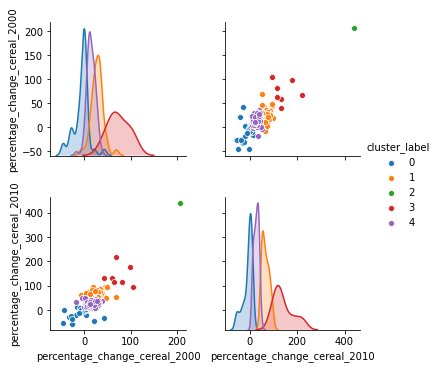

In [80]:
k_means = cluster.KMeans(n_clusters=5, max_iter = 200000)
df_stat = df_stat.dropna()
k_means.fit(df_stat[[
        'percentage_change_cereal_2000', 'percentage_change_cereal_2010']])

df_stat['cluster_label'] = k_means.labels_

data_plot = sns.pairplot(df_stat, hue='cluster_label', vars =['percentage_change_cereal_2000', 'percentage_change_cereal_2010'])
data_plot

df_stat_2000_mean = pd.DataFrame(df_stat.groupby(['cluster_label'])['percentage_change_cereal_2000'].mean())
df_stat_2010_mean = pd.DataFrame(df_stat.groupby(['cluster_label'])['percentage_change_cereal_2010'].mean())

df_cluster_means = df_stat_2000_mean.merge(df_stat_2010_mean, left_index=True, right_index=True)
print(df_cluster_means)

In [81]:
df_stat[df_stat['cluster_label']==3].head(10)

,country,cereal_1990,cereal_2000,cereal_2010,percentage_change_cereal_2000,percentage_change_cereal_2010,cluster_label
19,BTN,1.341480,2.135622,3.111933,59.198961,131.977617,3
81,IRQ,0.737200,1.235622,2.360017,67.610177,220.132483,3
93,KWT,5.697670,8.052100,13.259600,41.322681,132.719691,3
108,MDV,1.127080,1.848767,2.430933,64.031539,115.684187,3
172,TJK,1.098744,2.173522,3.061483,97.818722,178.634704,3
185,ARE,9.972850,20.470589,19.507550,105.263178,95.606572,3
189,UZB,2.186367,3.963111,4.678167,81.264706,113.969904,3


Text(0.5, 0, 'Year')

Text(0, 0.5, '')

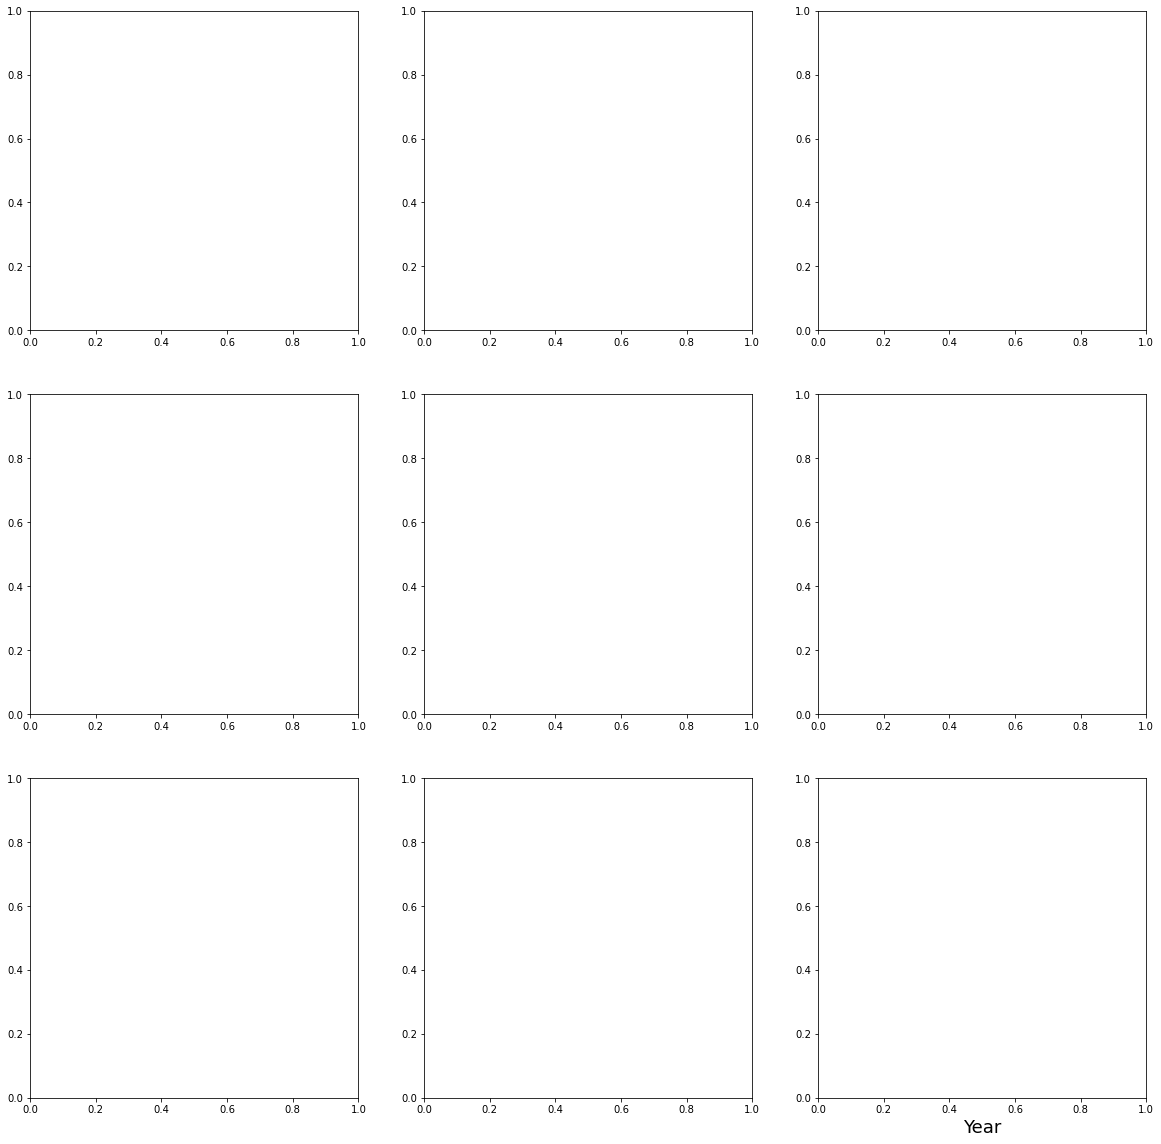

In [82]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,20))
plt.xlabel('Year', fontsize=18)
plt.ylabel('', fontsize=16)

country_code_for_analysis = list(df_stat[df_stat['cluster_label']==3]['country'])[10:19]

for i in range(len(country_code_for_analysis)):
    ix = np.unravel_index(i, axes.shape) # compute an appropriate index (1d or 2d)

    temperature_subset_pivoted_and_sorted[
        [' Year', 'Cereal yield(ton per hectare)', 'Temperature - (Celsius)']][
        temperature_subset_pivoted_and_sorted['Code']==country_code_for_analysis[i]].plot.line(x=' Year', ax=axes[ix], 
                                                                        title=country_code_for_analysis[i])

In [83]:
# Cluster Analysis of change in poverty head count in the last 2 decades
# Analyze % change in temperature data for January for the last 3 decades
temperature_and_rainfall['Code'] = temperature_and_rainfall['Code'].apply(lambda x: x.strip())
temperature_and_rainfall[' Statistics'] = temperature_and_rainfall[' Statistics'].apply(lambda x: str(x).strip())
temperature_and_rainfall[' Year'] = temperature_and_rainfall[' Year'].apply(lambda x: str(int(x)))

temperature_subset_for_analysis = temperature_and_rainfall[['Temperature - (Celsius)', ' Year', ' Statistics', 'Country Name',
       'Code', 'Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)']]

# With change is the temperature how is population growth is changing
temperature_subset_pivoted = temperature_subset_for_analysis.pivot_table(
    index=[' Year', 'Country Name', 'Code', 'Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)'],
    columns=' Statistics', values='Temperature - (Celsius)', aggfunc='first').reset_index()
temperature_subset_pivoted_and_sorted = temperature_subset_pivoted.sort_values(['Code', ' Year'])

temperature_subset_pivoted_and_sorted['avg'] = temperature_subset_pivoted_and_sorted.iloc[:, [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]].mean(axis=1)
temperature_subset_pivoted_and_sorted['Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)'] = temperature_subset_pivoted_and_sorted[
    'Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)']/1000

temperature_subset_pivoted_and_sorted.head()

Statistics,Year,Country Name,Code,Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population),Apr Average,Aug Average,Dec Average,Feb Average,Jan Average,Jul Average,Jun Average,Mar Average,May Average,Nov Average,Oct Average,Sep Average,avg
258,2000,Angola,AGO,0.0323,21.7163,19.8500,22.71100,23.07390,23.00580,18.7306,19.7778,22.86610,21.4990,22.68060,24.3217,22.8667,21.924958
726,2008,Angola,AGO,0.0301,22.2924,20.7756,23.33390,22.68470,22.83730,18.9104,18.6647,22.56890,21.1640,23.10340,23.2823,22.6870,21.858717
134,1996,Albania,ALB,0.0011,9.6424,21.1839,3.81211,2.06475,2.74004,20.7943,19.6962,3.79620,15.6802,8.51967,11.3562,14.6405,11.160539
328,2002,Albania,ALB,0.0020,10.3717,20.9112,3.83851,6.15358,1.22001,22.3559,20.4108,8.11910,16.2278,9.51594,12.4795,16.4238,12.335653
503,2005,Albania,ALB,0.0011,10.2636,20.6688,3.59408,0.87773,2.01291,21.9434,18.9241,5.73844,15.6961,7.17907,12.1412,17.8309,11.405861


In [84]:
country_code_for_analysis = list(rainfall['Code'].unique())
months = ['Jun', 'Jul', 'Aug', 'Nov', 'Dec', 'Jan']
temperature_subset_pivoted_and_sorted[' Year'] = temperature_subset_pivoted_and_sorted[' Year'].astype('int')
poverty_1990 = []
poverty_2000 = []
poverty_2010 = []

percentage_change_poverty_2000 = []
percentage_change_poverty_2010 = []

for each_country in country_code_for_analysis:
    m1 = temperature_subset_pivoted_and_sorted[
        (temperature_subset_pivoted_and_sorted['Code'] == each_country) & 
        (temperature_subset_pivoted_and_sorted[' Year']  >1989) &
        (temperature_subset_pivoted_and_sorted[' Year']  < 2001)][
        'Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)'].mean()

    m2 = temperature_subset_pivoted_and_sorted[
        (temperature_subset_pivoted_and_sorted['Code'] == each_country) & 
        (temperature_subset_pivoted_and_sorted[' Year']  > 2000) &
        (temperature_subset_pivoted_and_sorted[' Year']  < 2010)]['Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)'].mean()
    
    m3 = temperature_subset_pivoted_and_sorted[
        (temperature_subset_pivoted_and_sorted['Code'] == each_country) & 
        (temperature_subset_pivoted_and_sorted[' Year']  > 2010) &
        (temperature_subset_pivoted_and_sorted[' Year']  < 2021)]['Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)'].mean()
    
    poverty_1990.append(m1)
    poverty_2000.append(m2)
    poverty_2010.append(m3)
    percentage_change_poverty_2000.append((m2-m1)/m1*100)            
    percentage_change_poverty_2010.append((m3-m1)/m1*100)

data_stats = {
    'country': country_code_for_analysis,
    'poverty_1990': cereal_1990,
    'poverty_2000': cereal_2000,
    'poverty_2010': cereal_2010,
    'percentage_change_poverty_2000': percentage_change_cereal_2000,
    'percentage_change_poverty_2010': percentage_change_cereal_2010
}

df_stat = pd.DataFrame(data=data_stats)
df_stat.head()

<ipython-input-84-cfb0edecc310>:31: RuntimeWarning: divide by zero encountered in double_scalars
  percentage_change_poverty_2000.append((m2-m1)/m1*100)
<ipython-input-84-cfb0edecc310>:32: RuntimeWarning: divide by zero encountered in double_scalars
  percentage_change_poverty_2010.append((m3-m1)/m1*100)
<ipython-input-84-cfb0edecc310>:31: RuntimeWarning: invalid value encountered in double_scalars
  percentage_change_poverty_2000.append((m2-m1)/m1*100)
<ipython-input-84-cfb0edecc310>:32: RuntimeWarning: invalid value encountered in double_scalars
  percentage_change_poverty_2010.append((m3-m1)/m1*100)


,country,poverty_1990,poverty_2000,poverty_2010,percentage_change_poverty_2000,percentage_change_poverty_2010
0,AFG,1.17792,1.580311,1.978350,34.161158,67.952832
1,ALB,2.63474,3.573811,4.844517,35.641889,83.870768
2,DZA,0.92956,1.325089,1.487300,42.550119,60.000430
3,AND,NaN,NaN,NaN,NaN,NaN
4,AGO,0.48894,0.563122,0.805533,15.172050,64.750958


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=200000,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

/home/rbhanda/.conda/envs/8650env/lib/python3.8/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/rbhanda/.conda/envs/8650env/lib/python3.8/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


               percentage_change_poverty_2000  percentage_change_poverty_2010
cluster_label                                                                
0                                   13.794984                       27.257863
1                                  206.191675                      441.285605
2                                   73.787138                      141.246451
3                                   27.845341                       67.168331
4                                   -7.197478                       -9.669491


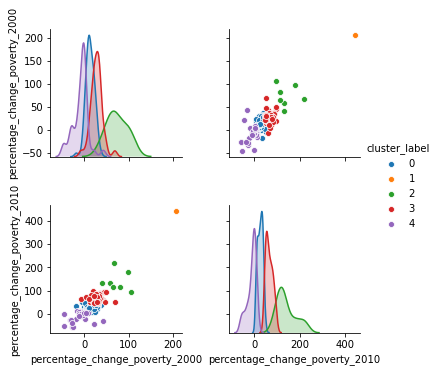

In [85]:
k_means = cluster.KMeans(n_clusters=5, max_iter = 200000)
df_stat = df_stat.dropna()
k_means.fit(df_stat[[
        'percentage_change_poverty_2000', 'percentage_change_poverty_2010']])

df_stat['cluster_label'] = k_means.labels_

data_plot = sns.pairplot(df_stat, hue='cluster_label', vars =['percentage_change_poverty_2000', 'percentage_change_poverty_2010'])
data_plot

df_stat_2000_mean = pd.DataFrame(df_stat.groupby(['cluster_label'])['percentage_change_poverty_2000'].mean())
df_stat_2010_mean = pd.DataFrame(df_stat.groupby(['cluster_label'])['percentage_change_poverty_2010'].mean())

df_cluster_means = df_stat_2000_mean.merge(df_stat_2010_mean, left_index=True, right_index=True)
print(df_cluster_means)

,country,poverty_1990,poverty_2000,poverty_2010,percentage_change_poverty_2000,percentage_change_poverty_2010,cluster_label
0,AFG,1.177920,1.580311,1.978350,34.161158,67.952832,3
1,ALB,2.634740,3.573811,4.844517,35.641889,83.870768,3
2,DZA,0.929560,1.325089,1.487300,42.550119,60.000430,3
4,AGO,0.488940,0.563122,0.805533,15.172050,64.750958,3
6,ARG,3.044180,3.679956,4.728333,20.884953,55.323711,3
7,ARM,1.666833,2.049089,2.983633,22.933040,79.000100,3
10,AZE,1.792844,2.624978,2.711400,46.414140,51.234537,3
13,BGD,2.767100,3.707456,4.493250,33.983432,62.381193,3
15,BLR,2.200167,2.788344,3.391050,26.733328,54.126960,3
22,BWA,0.300450,0.508344,0.459067,69.194357,52.793033,3


Text(0.5, 0, 'Year')

Text(0, 0.5, '')

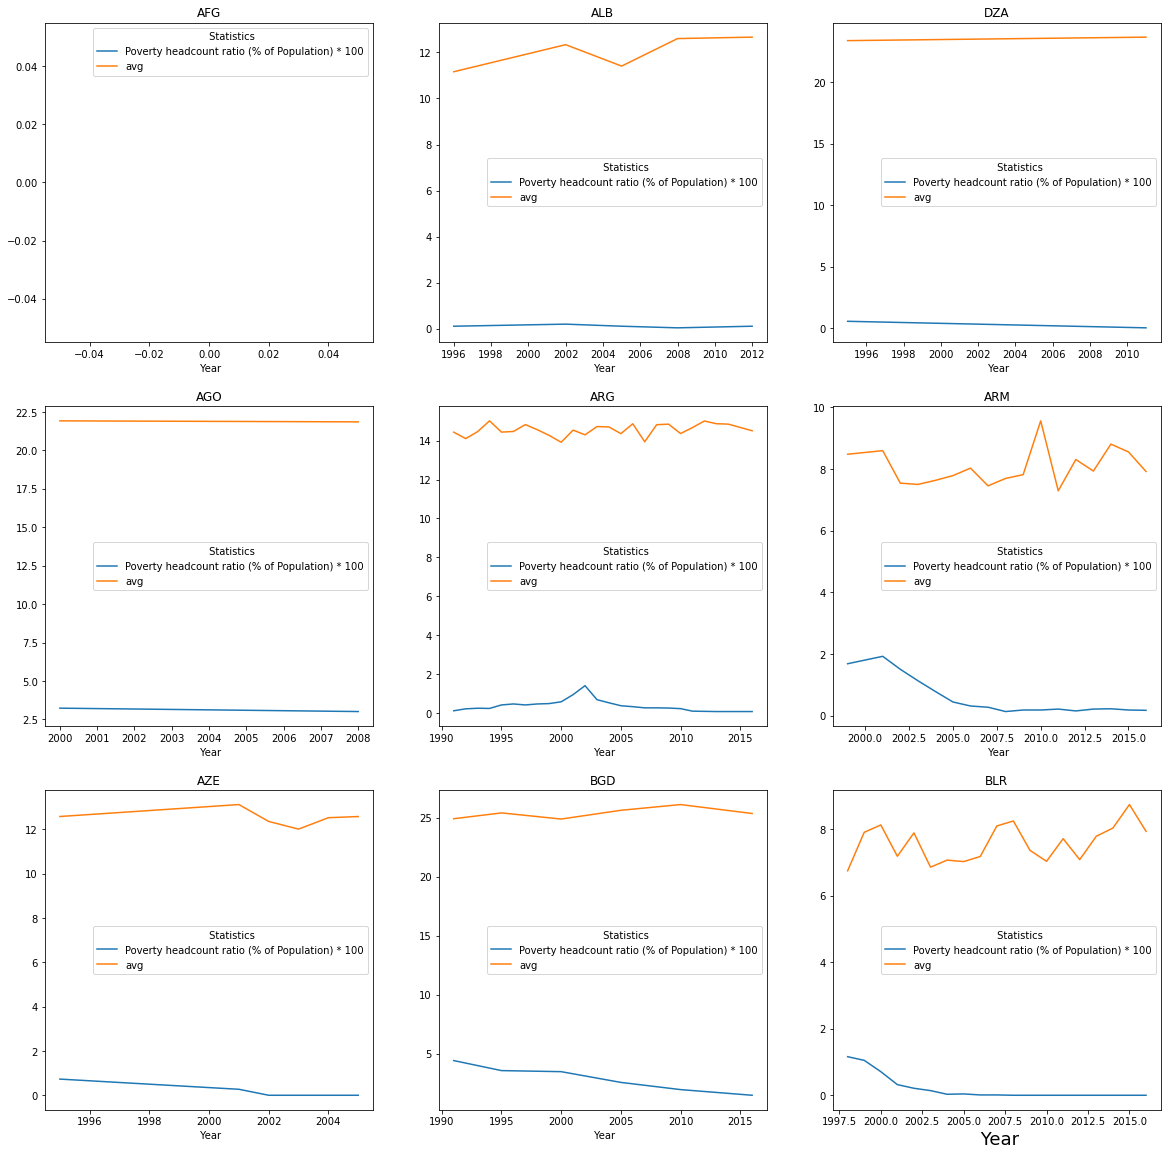

In [86]:
df_stat[df_stat['cluster_label']==3].head(10)

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,20))
plt.xlabel('Year', fontsize=18)
plt.ylabel('', fontsize=16)

country_code_for_analysis = list(df_stat[df_stat['cluster_label']==3]['country'])
temperature_subset_pivoted_and_sorted[
    'Poverty headcount ratio (% of Population) * 100'] = temperature_subset_pivoted_and_sorted[
    'Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)']*100

for i in range(len(country_code_for_analysis[0:9])):
    ix = np.unravel_index(i, axes.shape) # compute an appropriate index (1d or 2d)

    temperature_subset_pivoted_and_sorted[
        [
            ' Year', 
            'Poverty headcount ratio (% of Population) * 100', 
             'avg'
        ]
    ][
        temperature_subset_pivoted_and_sorted['Code']==country_code_for_analysis[i]].plot.line(x=' Year', ax=axes[ix], 
                                                                        title=country_code_for_analysis[i])

In [87]:
# Cluster Analysis of change in poverty head count in the last 2 decades
# Analyze % change in temperature data for January for the last 3 decades

In [88]:
temperature_and_rainfall['Code'] = temperature_and_rainfall['Code'].apply(lambda x: x.strip())
temperature_and_rainfall[' Statistics'] = temperature_and_rainfall[' Statistics'].apply(lambda x: str(x).strip())
temperature_and_rainfall[' Year'] = temperature_and_rainfall[' Year'].apply(lambda x: str(int(x)))

temperature_subset_for_analysis = temperature_and_rainfall[['Temperature - (Celsius)', ' Year', ' Statistics', 'Country Name',
       'Code', 'Mortality rate, under-5 (per 1,000 live births)']]

# With change is the temperature how is population growth is changing
temperature_subset_pivoted = temperature_subset_for_analysis.pivot_table(
    index=[' Year', 'Country Name', 'Code', 'Mortality rate, under-5 (per 1,000 live births)'],
    columns=' Statistics', values='Temperature - (Celsius)', aggfunc='first').reset_index()
temperature_subset_pivoted_and_sorted = temperature_subset_pivoted.sort_values(['Code', ' Year'])

temperature_subset_pivoted_and_sorted['avg'] = temperature_subset_pivoted_and_sorted.iloc[:, [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]].mean(axis=1)
# temperature_subset_pivoted_and_sorted['Mortality rate, under-5 (per 1,000 live births)'] = temperature_subset_pivoted_and_sorted[
#    'Mortality rate, under-5 (per 1,000 live births)']/1000

temperature_subset_pivoted_and_sorted.head()

Statistics,Year,Country Name,Code,"Mortality rate, under-5 (per 1,000 live births)",Apr Average,Aug Average,Dec Average,Feb Average,Jan Average,Jul Average,Jun Average,Mar Average,May Average,Nov Average,Oct Average,Sep Average,avg
0,1991,Afghanistan,AFG,172.6,12.9397,23.9673,4.23571,1.43654,-0.03110,25.5710,23.0777,6.88685,17.0755,7.31675,12.8779,19.3800,12.894487
186,1992,Afghanistan,AFG,166.7,11.6926,22.8633,4.47636,2.46018,0.74637,24.7068,22.8875,5.71341,16.1108,8.32035,12.6981,17.8588,12.544548
372,1993,Afghanistan,AFG,161.1,13.3735,23.3201,3.32008,4.33465,-0.08350,24.6320,22.8880,6.12034,18.7452,7.40369,12.0373,19.6343,12.977138
558,1994,Afghanistan,AFG,155.8,11.9926,24.5555,2.50841,1.14112,1.11415,25.0045,23.8788,8.97734,18.6745,9.50640,12.5059,17.1010,13.080018
744,1995,Afghanistan,AFG,150.8,12.2676,24.3760,1.76217,2.96133,0.92358,25.7798,23.4941,6.36893,18.1187,7.86943,13.5466,19.0225,13.040895


In [89]:
country_code_for_analysis = list(rainfall['Code'].unique())
months = ['Jun', 'Jul', 'Aug', 'Nov', 'Dec', 'Jan']
temperature_subset_pivoted_and_sorted[' Year'] = temperature_subset_pivoted_and_sorted[' Year'].astype('int')
mortality_1990 = []
mortality_2000 = []
mortality_2010 = []

percentage_change_mortality_2000 = []
percentage_change_mortality_2010 = []

for each_country in country_code_for_analysis:
    m1 = temperature_subset_pivoted_and_sorted[
        (temperature_subset_pivoted_and_sorted['Code'] == each_country) & 
        (temperature_subset_pivoted_and_sorted[' Year']  >1989) &
        (temperature_subset_pivoted_and_sorted[' Year']  < 2001)][
        'Mortality rate, under-5 (per 1,000 live births)'].mean()

    m2 = temperature_subset_pivoted_and_sorted[
        (temperature_subset_pivoted_and_sorted['Code'] == each_country) & 
        (temperature_subset_pivoted_and_sorted[' Year']  > 2000) &
        (temperature_subset_pivoted_and_sorted[' Year']  < 2010)][
        'Mortality rate, under-5 (per 1,000 live births)'].mean()
    
    m3 = temperature_subset_pivoted_and_sorted[
        (temperature_subset_pivoted_and_sorted['Code'] == each_country) & 
        (temperature_subset_pivoted_and_sorted[' Year']  > 2010) &
        (temperature_subset_pivoted_and_sorted[' Year']  < 2021)][
        'Mortality rate, under-5 (per 1,000 live births)'].mean()
    
    mortality_1990.append(m1)
    mortality_2000.append(m2)
    mortality_2010.append(m3)
    percentage_change_mortality_2000.append((m2-m1)/m1*100)            
    percentage_change_mortality_2010.append((m3-m1)/m1*100)

data_stats = {
    'country': country_code_for_analysis,
    'moratality_1990': cereal_1990,
    'mortality_2000': cereal_2000,
    'mortality_2010': cereal_2010,
    'percentage_change_mortality_2000': percentage_change_mortality_2000,
    'percentage_change_mortality_2010': percentage_change_mortality_2010
}

df_stat = pd.DataFrame(data=data_stats)
df_stat.head()

,country,moratality_1990,mortality_2000,mortality_2010,percentage_change_mortality_2000,percentage_change_mortality_2010
0,AFG,1.17792,1.580311,1.978350,-27.389870,-49.505083
1,ALB,2.63474,3.573811,4.844517,-40.466392,-67.438272
2,DZA,0.92956,1.325089,1.487300,-22.720880,-41.235136
3,AND,NaN,NaN,NaN,-34.737712,-56.216439
4,AGO,0.48894,0.563122,0.805533,-24.261340,-55.786974


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=200000,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

/home/rbhanda/.conda/envs/8650env/lib/python3.8/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/rbhanda/.conda/envs/8650env/lib/python3.8/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


,percentage_change_mortality_2000,percentage_change_mortality_2010
cluster_label,,
0,-21.645392,-36.990351
1,-42.784128,-64.516859
2,-2.851888,-22.205127
3,4.073363,82.554916
4,-31.596729,-51.190002


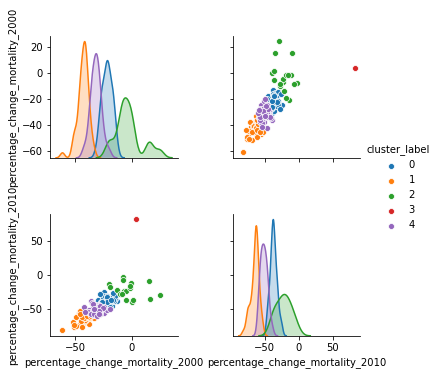

In [90]:
k_means = cluster.KMeans(n_clusters=5, max_iter = 200000)
df_stat = df_stat.dropna()
k_means.fit(df_stat[[
        'percentage_change_mortality_2000', 'percentage_change_mortality_2010']])

df_stat['cluster_label'] = k_means.labels_

data_plot = sns.pairplot(df_stat, hue='cluster_label', vars =['percentage_change_mortality_2000', 'percentage_change_mortality_2010'])
data_plot

df_stat_2000_mean = pd.DataFrame(df_stat.groupby(['cluster_label'])['percentage_change_mortality_2000'].mean())
df_stat_2010_mean = pd.DataFrame(df_stat.groupby(['cluster_label'])['percentage_change_mortality_2010'].mean())

df_cluster_means = df_stat_2000_mean.merge(df_stat_2010_mean, left_index=True, right_index=True)
df_cluster_means

,country,moratality_1990,mortality_2000,mortality_2010,percentage_change_mortality_2000,percentage_change_mortality_2010,cluster_label
48,DMA,1.34649,1.390967,1.615933,4.073363,82.554916,3


Text(0.5, 0, 'Year')

Text(0, 0.5, '')

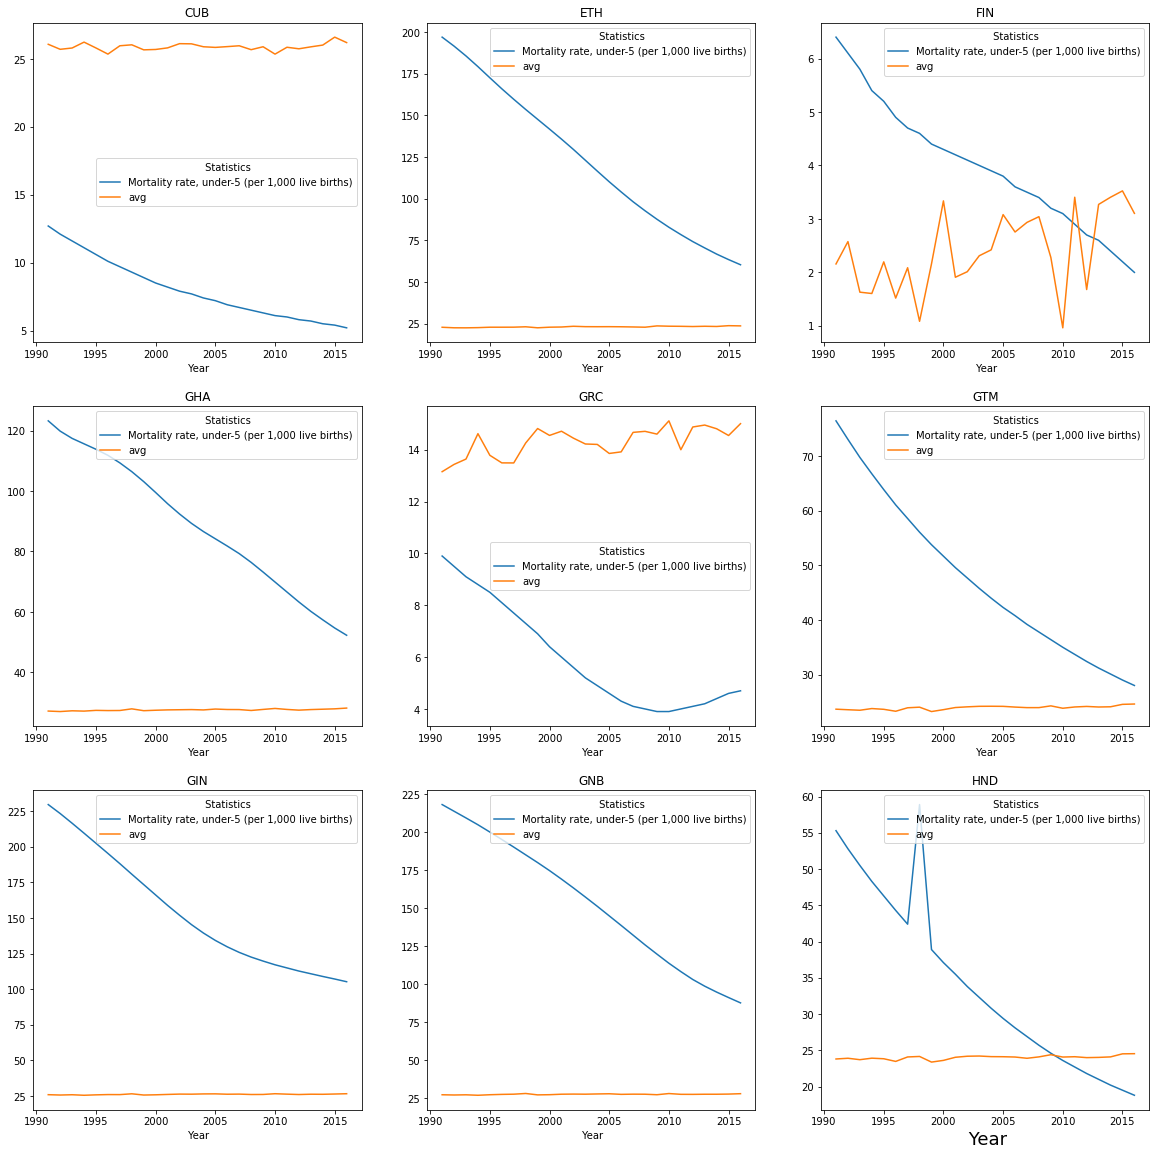

In [91]:
df_stat[df_stat['cluster_label']==3].head(10)

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,20))
plt.xlabel('Year', fontsize=18)
plt.ylabel('', fontsize=16)

country_code_for_analysis = list(df_stat[df_stat['cluster_label']==4]['country'])[10:19]

for i in range(len(country_code_for_analysis[0:9])):
    ix = np.unravel_index(i, axes.shape) # compute an appropriate index (1d or 2d)

    temperature_subset_pivoted_and_sorted[
        [
            ' Year', 
            'Mortality rate, under-5 (per 1,000 live births)', 
            'avg'
        ]
    ][
        temperature_subset_pivoted_and_sorted['Code']==country_code_for_analysis[i]].plot.line(x=' Year', ax=axes[ix], 
                                                                        title=country_code_for_analysis[i])

In [92]:
# Agriculture, forestry, and fishing, value added (% of GDP)
# Cluster analysis of the countries with respect to temperature change and population growth here

# With change is the temperature how is population growth is changing
temperature_subset_pivoted = temperature_and_rainfall.pivot_table(
    index=[' Year', 'Country Name', 'Code', 'Agriculture, forestry, and fishing, value added (% of GDP)'],
    columns=' Statistics', values='Temperature - (Celsius)', aggfunc='first').reset_index()
temperature_subset_pivoted_and_sorted = temperature_subset_pivoted.sort_values(['Code', ' Year'])

temperature_subset_pivoted_and_sorted['Average Temperature Change'] = temperature_subset_pivoted_and_sorted.iloc[
    :, [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]].mean(axis=1)


country_code_for_analysis = list(rainfall['Code'].unique())
months = ['Jun', 'Jul', 'Aug', 'Nov', 'Dec', 'Jan']
temperature_subset_pivoted_and_sorted[' Year'] = temperature_subset_pivoted_and_sorted[' Year'].astype('int')
agri_gdp_1990 = []
agri_gdp_2000 = []
agri_gdp_2010 = []

agri_gdp_change_2000 = []
agri_gdp_change_2010 = []

for each_country in country_code_for_analysis:
    m1 = temperature_subset_pivoted_and_sorted[
        (temperature_subset_pivoted_and_sorted['Code'] == each_country) & 
        (temperature_subset_pivoted_and_sorted[' Year']  >1989) &
        (temperature_subset_pivoted_and_sorted[' Year']  < 2001)][
        'Agriculture, forestry, and fishing, value added (% of GDP)'].mean()

    m2 = temperature_subset_pivoted_and_sorted[
        (temperature_subset_pivoted_and_sorted['Code'] == each_country) & 
        (temperature_subset_pivoted_and_sorted[' Year']  > 2000) &
        (temperature_subset_pivoted_and_sorted[' Year']  < 2010)][
        'Agriculture, forestry, and fishing, value added (% of GDP)'].mean()
    
    m3 = temperature_subset_pivoted_and_sorted[
        (temperature_subset_pivoted_and_sorted['Code'] == each_country) & 
        (temperature_subset_pivoted_and_sorted[' Year']  > 2010) &
        (temperature_subset_pivoted_and_sorted[' Year']  < 2021)][
        'Agriculture, forestry, and fishing, value added (% of GDP)'].mean()
    
    agri_gdp_1990.append(m1)
    agri_gdp_2000.append(m2)
    agri_gdp_2010.append(m3)
    agri_gdp_change_2000.append((m2-m1)/m1*100)            
    agri_gdp_change_2010.append((m3-m1)/m1*100)

data_stats = {
    'country': country_code_for_analysis,
    'agri_gdp_1990': agri_gdp_1990,
    'agri_gdp_2000': agri_gdp_2000,
    'agri_gdp_2010': agri_gdp_2010,
    'agri_gdp_change_2000': agri_gdp_change_2000,
    'agri_gdp_change_2010': agri_gdp_change_2010
}

df_stat = pd.DataFrame(data=data_stats)
df_stat.head()

k_means = cluster.KMeans(n_clusters=3, max_iter = 200000)
df_stat = df_stat.dropna()
k_means.fit(df_stat[[
        'agri_gdp_change_2000', 'agri_gdp_change_2010']])

df_stat['cluster_label'] = k_means.labels_

df_stat_2000_mean = pd.DataFrame(df_stat.groupby(['cluster_label'])['agri_gdp_change_2000'].mean())
df_stat_2010_mean = pd.DataFrame(df_stat.groupby(['cluster_label'])['agri_gdp_change_2010'].mean())

df_cluster_means = df_stat_2000_mean.merge(df_stat_2010_mean, left_index=True, right_index=True)
df_cluster_means



,country,agri_gdp_1990,agri_gdp_2000,agri_gdp_2010,agri_gdp_change_2000,agri_gdp_change_2010
0,AFG,NaN,31.226678,22.466275,NaN,NaN
1,ALB,29.434771,19.399532,19.363183,-34.093145,-34.216635
2,DZA,9.752379,8.551025,10.136223,-12.318574,3.935907
3,AND,0.487498,0.424011,0.530454,-13.022949,8.811612
4,AGO,7.924705,5.929521,7.487261,-25.176765,-5.520008


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=200000,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

,agri_gdp_change_2000,agri_gdp_change_2010
cluster_label,,
0,-42.403109,-57.745451
1,-4.115629,0.131686
2,-24.973684,-31.692112


,country,agri_gdp_1990,agri_gdp_2000,agri_gdp_2010,agri_gdp_change_2000,agri_gdp_change_2010,cluster_label


Text(0.5, 0, 'Year')

Text(0, 0.5, '')

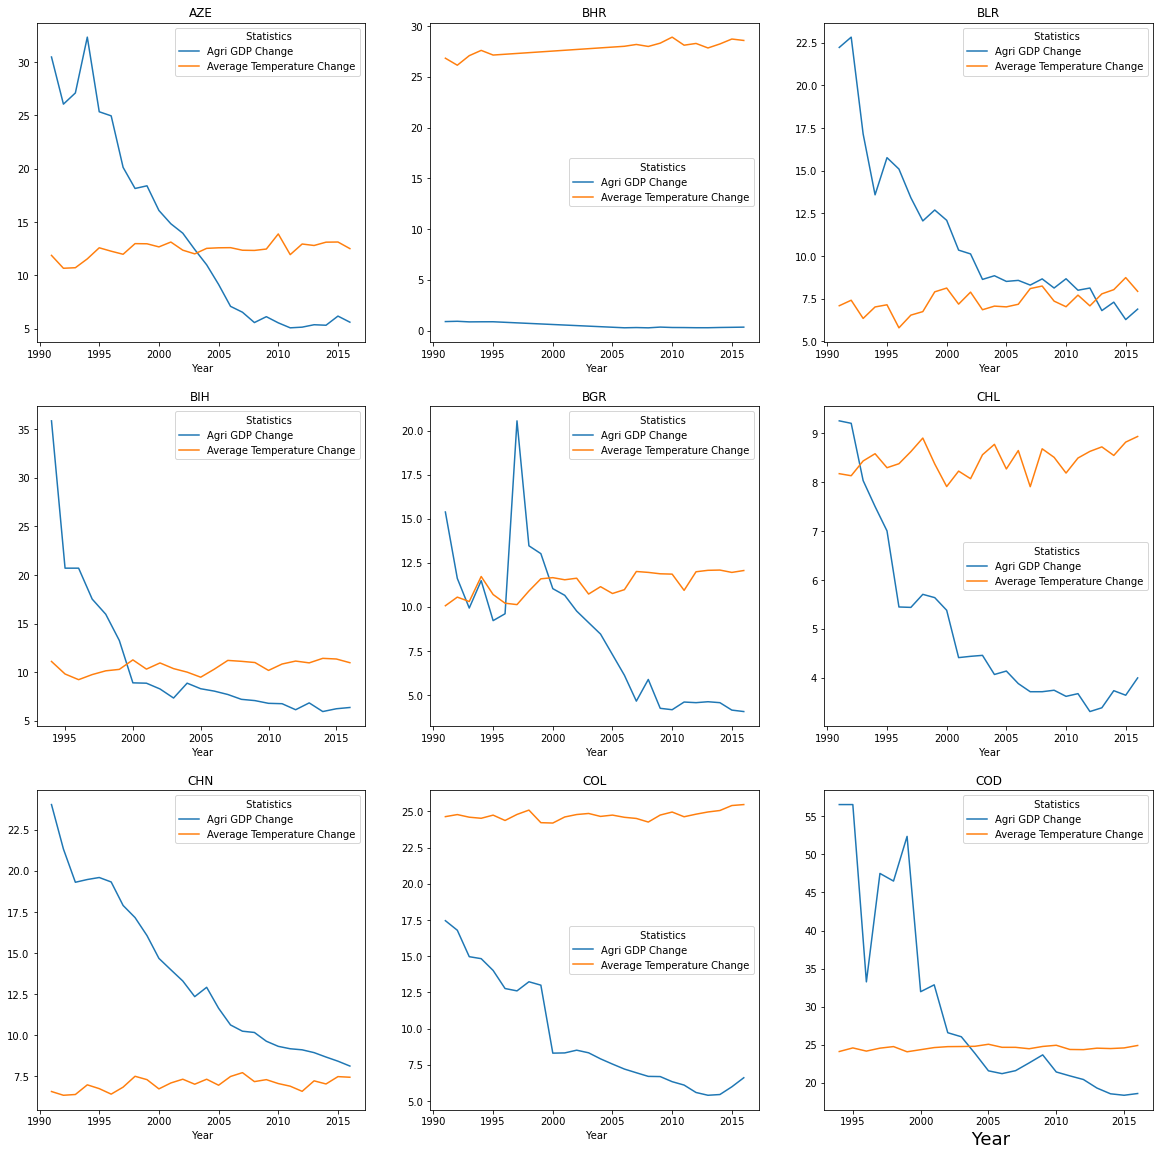

In [93]:
df_stat[df_stat['cluster_label']==3].head(10)

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,20))
plt.xlabel('Year', fontsize=18)
plt.ylabel('', fontsize=16)

temperature_subset_pivoted_and_sorted['Agri GDP Change'] = temperature_subset_pivoted_and_sorted['Agriculture, forestry, and fishing, value added (% of GDP)']
country_code_for_analysis = list(df_stat[df_stat['cluster_label']==0]['country'])

for i in range(len(country_code_for_analysis[0:9])):
    ix = np.unravel_index(i, axes.shape) # compute an appropriate index (1d or 2d)

    temperature_subset_pivoted_and_sorted[
        [
            ' Year', 
            'Agri GDP Change', 
            'Average Temperature Change'
        ]
    ][
        temperature_subset_pivoted_and_sorted['Code']==country_code_for_analysis[i]].plot.line(x=' Year', ax=axes[ix], 
                                                                        title=country_code_for_analysis[i])

<ipython-input-123-644e6d70a49b>:45: RuntimeWarning: invalid value encountered in double_scalars
  forest_area_change_2000.append((m2-m1)/m1*100)
<ipython-input-123-644e6d70a49b>:46: RuntimeWarning: invalid value encountered in double_scalars
  forest_area_change_2010.append((m3-m1)/m1*100)


,country,forest_area_1990,forest_area_2000,forest_area_2010,forest_area_change_2000,forest_area_change_2010
0,AFG,13500.00,13500.000000,13500.000000,0.000000,0.000000
1,ALB,7780.75,7781.333347,7729.400024,0.007497,-0.659962
2,DZA,16186.00,16304.444444,19445.999960,0.731771,20.140862
3,AND,160.00,160.000000,160.000000,0.000000,0.000000
4,AGO,602896.00,591040.000000,580431.998700,-1.966508,-3.726016


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=200000,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

,forest_area_change_2000,forest_area_change_2010
cluster_label,,
0,0.935932,2.605912
1,26.972691,47.549103
2,-12.299151,-22.721417


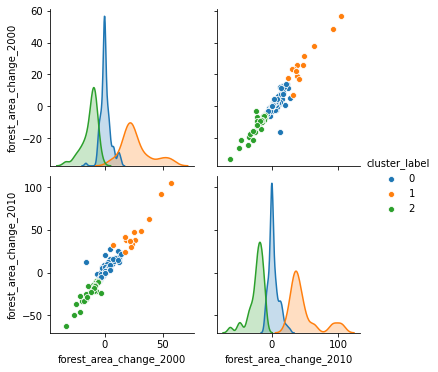

In [123]:
# Forest area (sq. km) Analysis

# With change is the temperature how is population growth is changing
temperature_subset_pivoted = temperature_and_rainfall.pivot_table(
    index=[' Year', 'Country Name', 'Code', 'Forest area (sq. km)'],
    columns=' Statistics', values='Temperature - (Celsius)', aggfunc='first').reset_index()
temperature_subset_pivoted_and_sorted = temperature_subset_pivoted.sort_values(['Code', ' Year'])

temperature_subset_pivoted_and_sorted['Average Temperature Change'] = temperature_subset_pivoted_and_sorted.iloc[
    :, [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]].mean(axis=1)


country_code_for_analysis = list(rainfall['Code'].unique())
months = ['Jun', 'Jul', 'Aug', 'Nov', 'Dec', 'Jan']
temperature_subset_pivoted_and_sorted[' Year'] = temperature_subset_pivoted_and_sorted[' Year'].astype('int')
forest_area_1990 = []
forest_area_2000 = []
forest_area_2010 = []

forest_area_change_2000 = []
forest_area_change_2010 = []

for each_country in country_code_for_analysis:
    m1 = temperature_subset_pivoted_and_sorted[
        (temperature_subset_pivoted_and_sorted['Code'] == each_country) & 
        (temperature_subset_pivoted_and_sorted[' Year']  >1989) &
        (temperature_subset_pivoted_and_sorted[' Year']  < 2001)][
        'Forest area (sq. km)'].mean()

    m2 = temperature_subset_pivoted_and_sorted[
        (temperature_subset_pivoted_and_sorted['Code'] == each_country) & 
        (temperature_subset_pivoted_and_sorted[' Year']  > 2000) &
        (temperature_subset_pivoted_and_sorted[' Year']  < 2010)][
        'Forest area (sq. km)'].mean()
    
    m3 = temperature_subset_pivoted_and_sorted[
        (temperature_subset_pivoted_and_sorted['Code'] == each_country) & 
        (temperature_subset_pivoted_and_sorted[' Year']  > 2010) &
        (temperature_subset_pivoted_and_sorted[' Year']  < 2021)][
        'Forest area (sq. km)'].mean()
    
    forest_area_1990.append(m1)
    forest_area_2000.append(m2)
    forest_area_2010.append(m3)
    forest_area_change_2000.append((m2-m1)/m1*100)            
    forest_area_change_2010.append((m3-m1)/m1*100)

data_stats = {
    'country': country_code_for_analysis,
    'forest_area_1990': forest_area_1990,
    'forest_area_2000': forest_area_2000,
    'forest_area_2010': forest_area_2010,
    'forest_area_change_2000': forest_area_change_2000,
    'forest_area_change_2010': forest_area_change_2010
}

df_stat = pd.DataFrame(data=data_stats)
df_stat.head()

k_means = cluster.KMeans(n_clusters=3, max_iter = 200000)
df_stat = df_stat.dropna()
k_means.fit(df_stat[[
        'forest_area_change_2000', 'forest_area_change_2010']])

df_stat['cluster_label'] = k_means.labels_

df_stat_2000_mean = pd.DataFrame(df_stat.groupby(['cluster_label'])['forest_area_change_2000'].mean())
df_stat_2010_mean = pd.DataFrame(df_stat.groupby(['cluster_label'])['forest_area_change_2010'].mean())

df_cluster_means = df_stat_2000_mean.merge(df_stat_2010_mean, left_index=True, right_index=True)
df_cluster_means

data_plot = sns.pairplot(df_stat, hue='cluster_label', vars =['forest_area_change_2000', 'forest_area_change_2010'])
data_plot

,country,forest_area_1990,forest_area_2000,forest_area_2010,forest_area_change_2000,forest_area_change_2010,cluster_label


Text(0.5, 0, 'Year')

Text(0, 0.5, '')

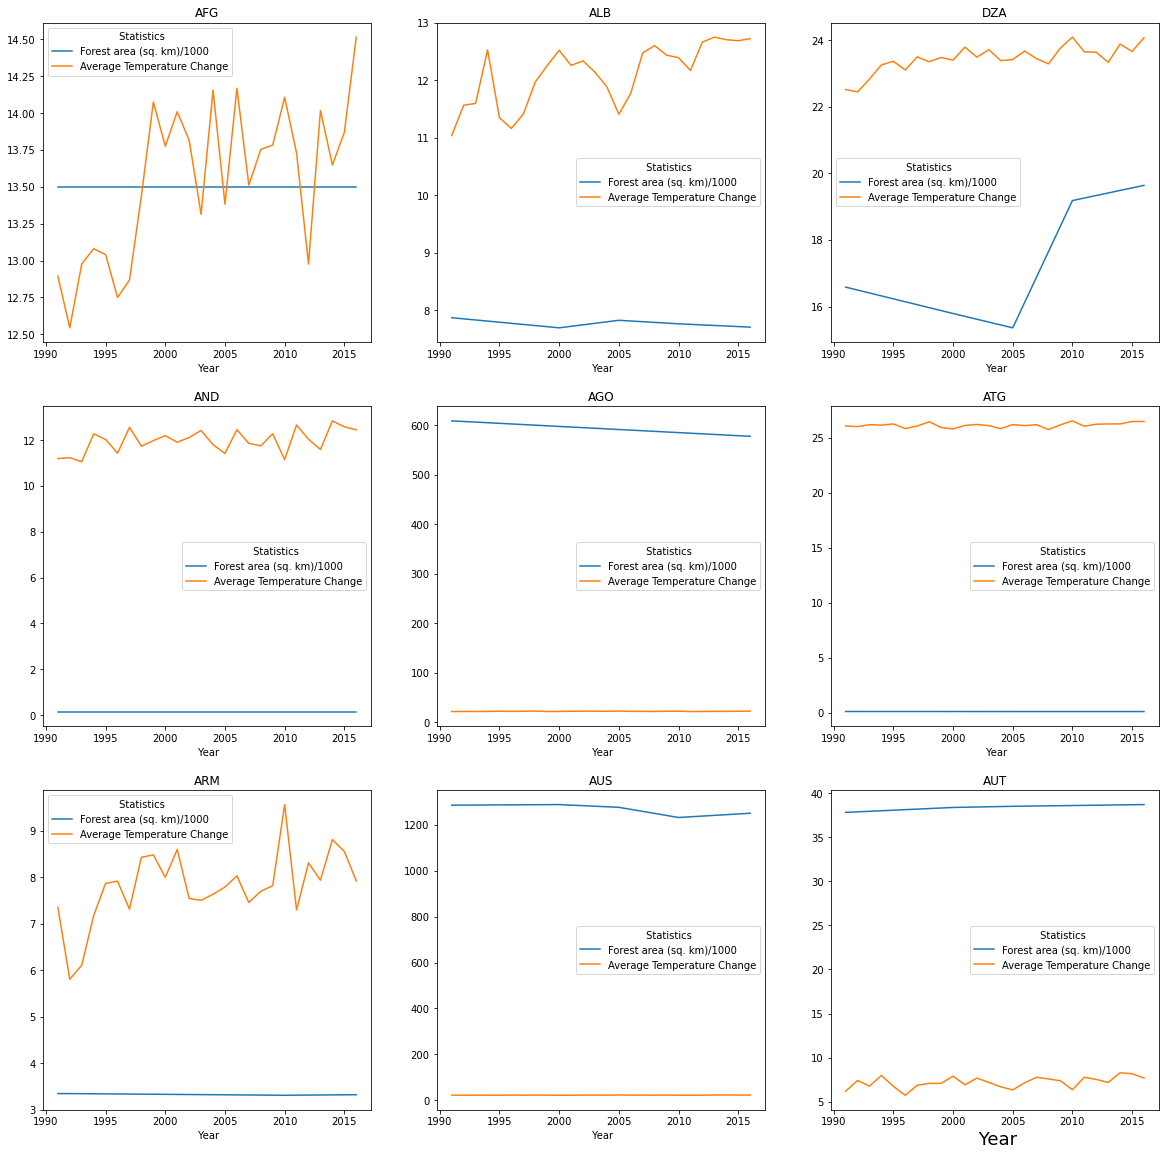

In [95]:
df_stat[df_stat['cluster_label']==3].head(10)

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,20))
plt.xlabel('Year', fontsize=18)
plt.ylabel('', fontsize=16)

temperature_subset_pivoted_and_sorted['Forest area (sq. km)/1000'] = temperature_subset_pivoted_and_sorted[
    'Forest area (sq. km)']/1000
country_code_for_analysis = list(df_stat[df_stat['cluster_label']==0]['country'])

for i in range(len(country_code_for_analysis[0:9])):
    ix = np.unravel_index(i, axes.shape) # compute an appropriate index (1d or 2d)

    temperature_subset_pivoted_and_sorted[
        [
            ' Year', 
            'Forest area (sq. km)/1000', 
            'Average Temperature Change'
        ]
    ][
        temperature_subset_pivoted_and_sorted['Code']==country_code_for_analysis[i]].plot.line(x=' Year', ax=axes[ix], 
                                                                        title=country_code_for_analysis[i])

In [96]:
# Forest area (sq. km) Analysis

# With change is the temperature how is population growth is changing
temperature_subset_pivoted = temperature_and_rainfall.pivot_table(
    index=[' Year', 'Country Name', 'Code', 'Agricultural land (sq. km)'],
    columns=' Statistics', values='Temperature - (Celsius)', aggfunc='first').reset_index()
temperature_subset_pivoted_and_sorted = temperature_subset_pivoted.sort_values(['Code', ' Year'])

temperature_subset_pivoted_and_sorted['Average Temperature Change'] = temperature_subset_pivoted_and_sorted.iloc[
    :, [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]].mean(axis=1)


country_code_for_analysis = list(rainfall['Code'].unique())
months = ['Jun', 'Jul', 'Aug', 'Nov', 'Dec', 'Jan']
temperature_subset_pivoted_and_sorted[' Year'] = temperature_subset_pivoted_and_sorted[' Year'].astype('int')
agri_area_1990 = []
agri_area_2000 = []
agri_area_2010 = []

agri_area_change_2000 = []
agri_area_change_2010 = []

for each_country in country_code_for_analysis:
    m1 = temperature_subset_pivoted_and_sorted[
        (temperature_subset_pivoted_and_sorted['Code'] == each_country) & 
        (temperature_subset_pivoted_and_sorted[' Year']  >1989) &
        (temperature_subset_pivoted_and_sorted[' Year']  < 2001)][
        'Agricultural land (sq. km)'].mean()

    m2 = temperature_subset_pivoted_and_sorted[
        (temperature_subset_pivoted_and_sorted['Code'] == each_country) & 
        (temperature_subset_pivoted_and_sorted[' Year']  > 2000) &
        (temperature_subset_pivoted_and_sorted[' Year']  < 2010)][
        'Agricultural land (sq. km)'].mean()
    
    m3 = temperature_subset_pivoted_and_sorted[
        (temperature_subset_pivoted_and_sorted['Code'] == each_country) & 
        (temperature_subset_pivoted_and_sorted[' Year']  > 2010) &
        (temperature_subset_pivoted_and_sorted[' Year']  < 2021)][
        'Agricultural land (sq. km)'].mean()
    
    agri_area_1990.append(m1)
    agri_area_2000.append(m2)
    agri_area_2010.append(m3)
    agri_area_change_2000.append((m2-m1)/m1*100)            
    agri_area_change_2010.append((m3-m1)/m1*100)

data_stats = {
    'country': country_code_for_analysis,
    'agri_area_1990': forest_area_1990,
    'agri_area_2000': forest_area_2000,
    'agri_area_2010': forest_area_2010,
    'agri_area_change_2000': forest_area_change_2000,
    'agri_area_change_2010': forest_area_change_2010
}

df_stat = pd.DataFrame(data=data_stats)
df_stat.head()
df_stat = df_stat.dropna()

k_means = cluster.KMeans(n_clusters=3, max_iter = 200000)
k_means.fit(df_stat[['agri_area_change_2000', 'agri_area_change_2010']])

df_stat['cluster_label'] = k_means.labels_

df_stat_2000_mean = pd.DataFrame(df_stat.groupby(['cluster_label'])['agri_area_change_2000'].mean())
df_stat_2010_mean = pd.DataFrame(df_stat.groupby(['cluster_label'])['agri_area_change_2010'].mean())

df_cluster_means = df_stat_2000_mean.merge(df_stat_2010_mean, left_index=True, right_index=True)
df_cluster_means


,country,agri_area_1990,agri_area_2000,agri_area_2010,agri_area_change_2000,agri_area_change_2010
0,AFG,13500.00,13500.000000,13500.000000,0.000000,0.000000
1,ALB,7780.75,7781.333347,7729.400024,0.007497,-0.659962
2,DZA,16186.00,16304.444444,19445.999960,0.731771,20.140862
3,AND,160.00,160.000000,160.000000,0.000000,0.000000
4,AGO,602896.00,591040.000000,580431.998700,-1.966508,-3.726016


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=200000,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

,agri_area_change_2000,agri_area_change_2010
cluster_label,,
0,0.935932,2.605912
1,26.972691,47.549103
2,-12.299151,-22.721417


,country,agri_area_1990,agri_area_2000,agri_area_2010,agri_area_change_2000,agri_area_change_2010,cluster_label


Text(0.5, 0, 'Year')

Text(0, 0.5, '')

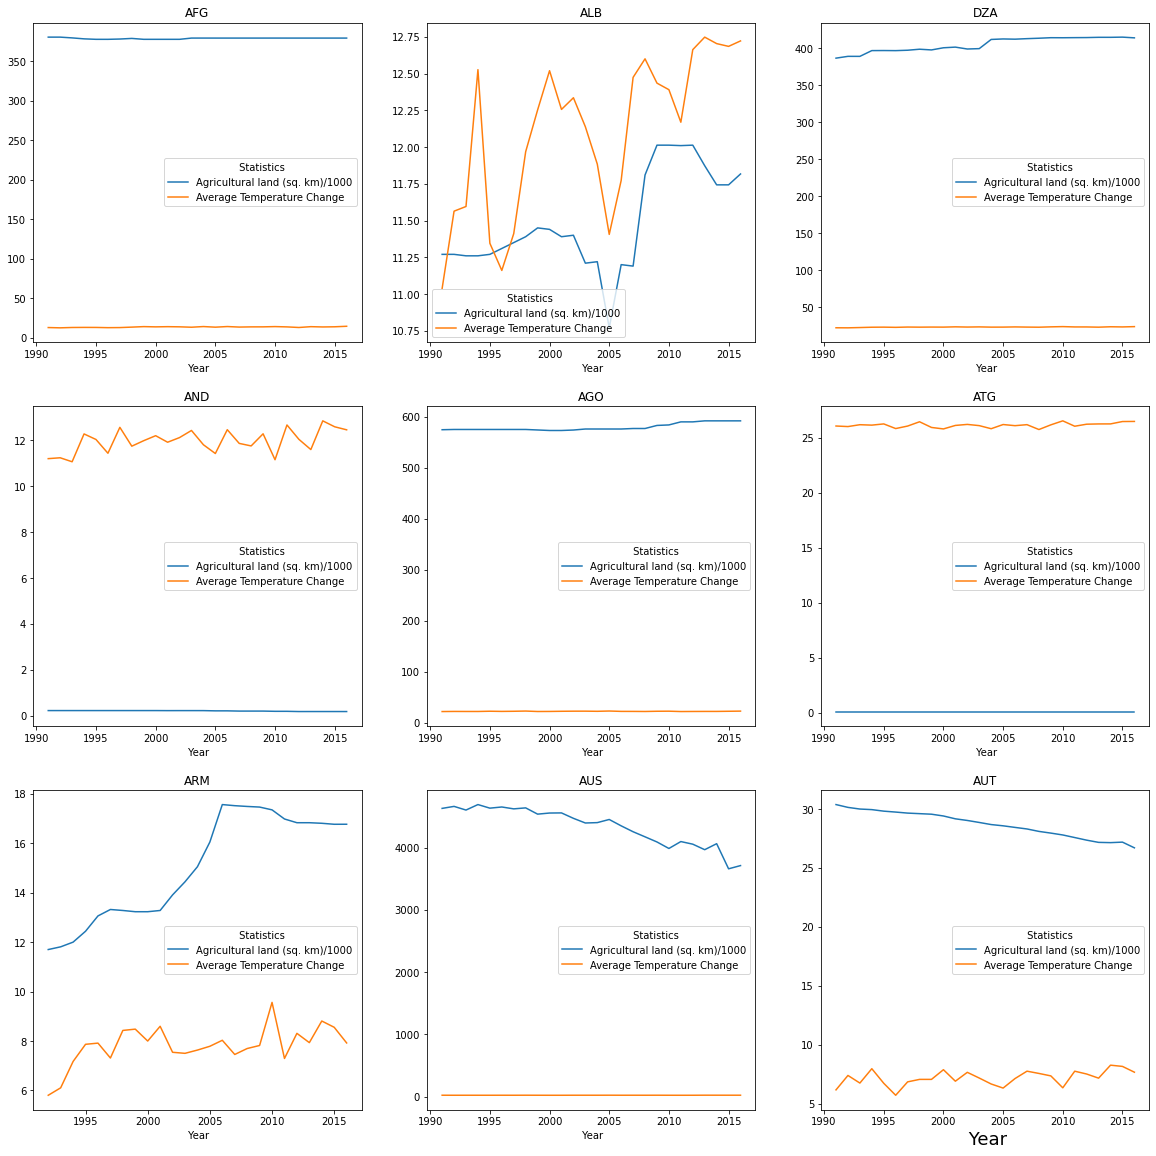

In [97]:
df_stat[df_stat['cluster_label']==3].head(10)

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,20))
plt.xlabel('Year', fontsize=18)
plt.ylabel('', fontsize=16)

temperature_subset_pivoted_and_sorted['Agricultural land (sq. km)/1000'] = temperature_subset_pivoted_and_sorted[
    'Agricultural land (sq. km)']/1000
country_code_for_analysis = list(df_stat[df_stat['cluster_label']==0]['country'])

for i in range(len(country_code_for_analysis[0:9])):
    ix = np.unravel_index(i, axes.shape) # compute an appropriate index (1d or 2d)

    temperature_subset_pivoted_and_sorted[
        [
            ' Year', 
            'Agricultural land (sq. km)/1000', 
            'Average Temperature Change'
        ]
    ][
        temperature_subset_pivoted_and_sorted['Code']==country_code_for_analysis[i]].plot.line(x=' Year', ax=axes[ix], 
                                                                        title=country_code_for_analysis[i])

In [98]:
from sklearn import datasets ## imports datasets from scikit-learn

In [99]:
cols = [' Statistics', 'Code', 'Temperature - (Celsius)', 'Rainfall - (MM)', ' Year', 'Cereal yield (kg per hectare)']
data = temperature_and_rainfall[temperature_and_rainfall[' Statistics']=='Jan Average'][cols] # 'Population growth (annual %)'
data = data.dropna()

In [100]:
countries = list(data['Code'].unique())

data['Code'] = data['Code'].apply(lambda x: x.strip())
data[' Statistics'] = data[' Statistics'].apply(lambda x: str(x).strip())
data[' Year'] = data[' Year'].apply(lambda x: str(int(x)))
data[' Year'] = data[' Year'].astype(int)
data['Cereal yield (kg per hectare)'] = data['Cereal yield (kg per hectare)'].apply(lambda x: str(x).strip())
data['Cereal yield (kg per hectare)'] = data['Cereal yield (kg per hectare)'].astype(float)

months = ['Jan', 'Apr', 'Jul', 'Oct']

data_new = {
    ' Year': [],
    ' Statistics': [],
    'Code': [],
    'Rainfall - (MM)': [],
    'Temperature - (Celsius)': [],
    'Cereal yield (kg per hectare)': []
    
}

for each_country in countries:
    for each_month in months:
        m1_rainfall = data[
            (data[' Statistics']== str(each_month) + ' Average') & 
            (data['Code']==each_country) & 
            (data[' Year'] > 1990) &
            (data[' Year'] < 2001)
        ]['Rainfall - (MM)'].mean()
        
        m2_rainfall = data[
            (data[' Statistics']== str(each_month) + ' Average') & 
            (data['Code']==each_country) & 
            (data[' Year'] > 2001) &
            (data[' Year'] < 2011)
        ]['Rainfall - (MM)'].mean()
             
        m3_rainfall = data[
            (data[' Statistics']== str(each_month) + ' Average') & 
            (data['Code']==each_country) & 
            (data[' Year'] > 2011) &
            (data[' Year'] < 2020)
        ]['Rainfall - (MM)'].mean()
        
        m1_temperature = data[
            (data[' Statistics']== str(each_month) + ' Average') & 
            (data['Code']==each_country) & 
            (data[' Year'] > 1990) &
            (data[' Year'] < 2001)
        ]['Temperature - (Celsius)'].mean()
        
        m2_temperature = data[
            (data[' Statistics']== str(each_month) + ' Average') & 
            (data['Code']==each_country) & 
            (data[' Year'] > 2001) &
            (data[' Year'] < 2011)
        ]['Temperature - (Celsius)'].mean()
             
        m3_temperature = data[
            (data[' Statistics']== str(each_month) + ' Average') & 
            (data['Code']==each_country) & 
            (data[' Year'] > 2011) &
            (data[' Year'] < 2020)
        ]['Temperature - (Celsius)'].mean()
        
        try:
            last_temperature = data[
                (data[' Statistics']== str(each_month) + ' Average') & 
                (data['Code']==each_country) & 
                (data[' Year'] == 2016)
            ]['Temperature - (Celsius)'].tolist()[0]
        except:
            last_temperature = data[
                (data['Code']==each_country) & 
                (data[' Year'] == 2016)
            ]['Temperature - (Celsius)'].mean()
        
        try:
            last_rainfall = data[
                (data[' Statistics']== str(each_month) + ' Average') & 
                (data['Code']==each_country) & 
                (data[' Year'] == 2016)
            ]['Rainfall - (MM)'].tolist()[0]
        except:
            last_rainfall = data[
                (data['Code']==each_country) & 
                (data[' Year'] == 2016)
            ]['Rainfall - (MM)'].mean()
        
        avg_temp = ((m2_temperature - m1_temperature) + (m3_temperature-m2_temperature))/2
        avg_rain = ((m2_rainfall - m1_rainfall) + (m3_rainfall-m2_rainfall))/2
        
        for year in range(2020, 2030):
            last_temperature = last_temperature + avg_temp
            last_rainfall = last_rainfall + avg_rain
            
            data_new[' Year'].append(year)
            data_new[' Statistics'].append(each_month + ' Average')
            data_new['Code'].append(each_country)
            data_new['Temperature - (Celsius)'].append(last_temperature)
            data_new['Rainfall - (MM)'].append(last_rainfall)
            data_new['Cereal yield (kg per hectare)'].append(0.0) 
        

In [101]:
data_cereal = pd.DataFrame(data=data_new)

In [102]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import train_test_split

data['Cereal yield (kg per hectare)'] = data['Cereal yield (kg per hectare)'].apply(lambda x: str(x).strip())
data = data.dropna()

# data[' Year'] = data[' Year'].apply(lambda x: str(int(x)))

data =  data[data[' Statistics'].isin(['Jan Average', 'Apr Average', 'Jul Average', 'Oct Average'])]
X_train, y_train = data[
    ['Temperature - (Celsius)', 'Rainfall - (MM)']], data['Cereal yield (kg per hectare)'] 

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

data_cereal = data_cereal.dropna()

X_test = data_cereal[ ['Temperature - (Celsius)', 'Rainfall - (MM)']] 
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Coefficients: 
 [-46.96169224   1.6924496 ]


In [103]:
data_cereal['Cereal yield (kg per hectare)'] = list(y_pred)

In [104]:
predicted_mean = data_cereal[['Code', 'Cereal yield (kg per hectare)', 'Temperature - (Celsius)', 'Rainfall - (MM)']].groupby('Code').mean()

In [105]:
data['Cereal yield (kg per hectare)'] = data['Cereal yield (kg per hectare)'].astype('float')
last_decade_mean = data[['Code', 'Cereal yield (kg per hectare)', 'Temperature - (Celsius)', 'Rainfall - (MM)']].groupby('Code').mean()

In [106]:
predicted_mean['Cereal yield 2020'] = predicted_mean['Cereal yield (kg per hectare)']
predicted_mean['Cereal yield 2010'] = last_decade_mean['Cereal yield (kg per hectare)']

del predicted_mean['Cereal yield (kg per hectare)']

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=200000,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

,Temperature - (Celsius),Rainfall - (MM),Cereal yield 2020,Cereal yield 2010
cluster_label,,,,
0,8.777099,104.259365,3204.409195,5093.142123
1,18.082576,76.822777,2720.973217,1878.985780
2,24.670374,14.999646,2306.966555,14675.221154


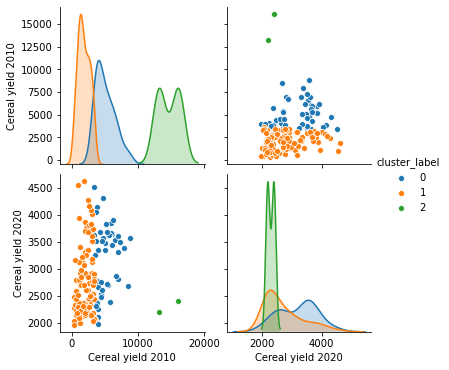

In [107]:
k_means = cluster.KMeans(n_clusters=3, max_iter = 200000)
k_means.fit(predicted_mean[['Cereal yield 2010', 'Cereal yield 2020']])

predicted_mean['cluster_label'] = k_means.labels_

df_cluster_means = pd.DataFrame(predicted_mean.groupby(['cluster_label']).mean())

df_cluster_means

data_plot = sns.pairplot(
    predicted_mean, 
    hue='cluster_label', 
    vars =['Cereal yield 2010', 'Cereal yield 2020']
)
data_plot

In [108]:
predicted_mean[predicted_mean['cluster_label'].isin([1,2])].head(10)
predicted_mean.reset_index(inplace=True)

,Temperature - (Celsius),Rainfall - (MM),Cereal yield 2020,Cereal yield 2010,cluster_label
Code,,,,,
AFG,6.629463,20.262878,3163.106019,1533.969231,1
AGO,24.951845,72.841752,2391.643039,593.076923,1
ARE,21.356442,-16.587208,2409.135216,16110.788462,2
ARM,-4.367982,64.124971,3753.799028,2136.532000,1
ATG,25.981800,-19.149515,2187.584025,1621.080769,1
AUS,29.430820,99.853680,2227.019119,1845.892308,1
AZE,3.179413,35.031452,3350.121259,2321.976000,1
BDI,23.074555,263.800750,2802.992233,1301.119231,1
BEN,28.252355,1.862681,2116.517003,1181.388462,1


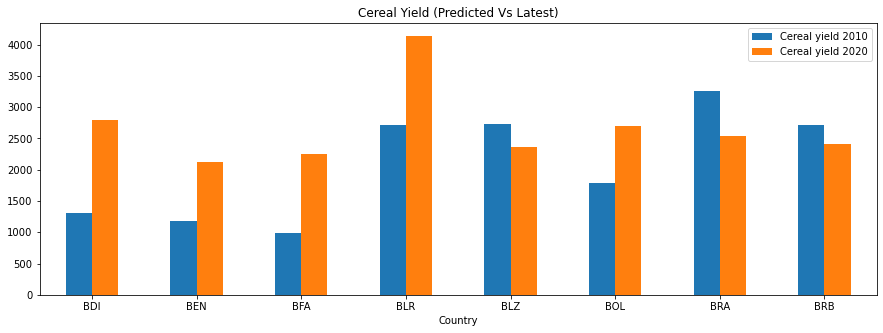

In [109]:
country_code_for_analysis = list(predicted_mean[predicted_mean['cluster_label'].isin([1,2])]['Code'])
country_code_for_analysis = country_code_for_analysis[7:15]

predicted_mean['Country'] = predicted_mean['Code']

predicted_mean[['Country', 'Cereal yield 2010', 'Cereal yield 2020']][
    predicted_mean['Country'].isin(country_code_for_analysis)].plot.bar(x='Country',rot=0, figsize=(15,5), title="Cereal Yield (Predicted Vs Latest)")

In [110]:
# Regression Analysis for Forest Area Prediction
cols = [' Statistics', 'Code', 'Temperature - (Celsius)', 'Rainfall - (MM)', ' Year', 'Agriculture, forestry, and fishing, value added (% of GDP)']
data = temperature_and_rainfall[cols] # 'Population growth (annual %)'
data = data.dropna()

In [111]:
countries = list(data['Code'].unique())

data['Code'] = data['Code'].apply(lambda x: x.strip())
data[' Statistics'] = data[' Statistics'].apply(lambda x: str(x).strip())
data[' Year'] = data[' Year'].apply(lambda x: str(int(x)))
data[' Year'] = data[' Year'].astype(int)
data['Agri GDP'] = data['Agriculture, forestry, and fishing, value added (% of GDP)'].apply(lambda x: str(x).strip())
data['Agri GDP'] = data['Agriculture, forestry, and fishing, value added (% of GDP)'].astype(float)

months = ['Jan', 'Apr', 'Jul', 'Oct']

data_new = {
    ' Year': [],
    ' Statistics': [],
    'Code': [],
    'Rainfall - (MM)': [],
    'Temperature - (Celsius)': [],
    'Agri GDP': []
    
}

for each_country in countries:
    for each_month in months:
        m1_rainfall = data[
            (data[' Statistics']== str(each_month) + ' Average') & 
            (data['Code']==each_country) & 
            (data[' Year'] > 1990) &
            (data[' Year'] < 2001)
        ]['Rainfall - (MM)'].mean()
        
        m2_rainfall = data[
            (data[' Statistics']== str(each_month) + ' Average') & 
            (data['Code']==each_country) & 
            (data[' Year'] > 2001) &
            (data[' Year'] < 2011)
        ]['Rainfall - (MM)'].mean()
             
        m3_rainfall = data[
            (data[' Statistics']== str(each_month) + ' Average') & 
            (data['Code']==each_country) & 
            (data[' Year'] > 2011) &
            (data[' Year'] < 2020)
        ]['Rainfall - (MM)'].mean()
        
        m1_temperature = data[
            (data[' Statistics']== str(each_month) + ' Average') & 
            (data['Code']==each_country) & 
            (data[' Year'] > 1990) &
            (data[' Year'] < 2001)
        ]['Temperature - (Celsius)'].mean()
        
        m2_temperature = data[
            (data[' Statistics']== str(each_month) + ' Average') & 
            (data['Code']==each_country) & 
            (data[' Year'] > 2001) &
            (data[' Year'] < 2011)
        ]['Temperature - (Celsius)'].mean()
             
        m3_temperature = data[
            (data[' Statistics']== str(each_month) + ' Average') & 
            (data['Code']==each_country) & 
            (data[' Year'] > 2011) &
            (data[' Year'] < 2020)
        ]['Temperature - (Celsius)'].mean()
        
        try:
            last_temperature = data[
                (data[' Statistics']== str(each_month) + ' Average') & 
                (data['Code']==each_country) & 
                (data[' Year'] == 2016)
            ]['Temperature - (Celsius)'].tolist()[0]
        except:
            last_temperature = data[
                (data['Code']==each_country) & 
                (data[' Year'] == 2016)
            ]['Temperature - (Celsius)'].mean()
        
        try:
            last_rainfall = data[
                (data[' Statistics']== str(each_month) + ' Average') & 
                (data['Code']==each_country) & 
                (data[' Year'] == 2016)
            ]['Rainfall - (MM)'].tolist()[0]
        except:
            last_rainfall = data[
                (data['Code']==each_country) & 
                (data[' Year'] == 2016)
            ]['Rainfall - (MM)'].mean()
        
        avg_temp = ((m2_temperature - m1_temperature) + (m3_temperature-m2_temperature))/2
        avg_rain = ((m2_rainfall - m1_rainfall) + (m3_rainfall-m2_rainfall))/2
        
        for year in range(2020, 2030):
            last_temperature = last_temperature + avg_temp
            last_rainfall = last_rainfall + avg_rain
            
            data_new[' Year'].append(year)
            data_new[' Statistics'].append(each_month + ' Average')
            data_new['Code'].append(each_country)
            data_new['Temperature - (Celsius)'].append(last_temperature)
            data_new['Rainfall - (MM)'].append(last_rainfall)
            data_new['Agri GDP'].append(0.0) 
        

In [112]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import train_test_split

data['Agri GDP'] = data['Agri GDP'].apply(lambda x: str(x).strip())
data = data.dropna()

# data[' Year'] = data[' Year'].apply(lambda x: str(int(x)))

data =  data[data[' Statistics'].isin(['Jan Average', 'Apr Average', 'Jul Average', 'Oct Average'])]
X_train, y_train = data[
    ['Temperature - (Celsius)', 'Rainfall - (MM)']], data['Agri GDP'] 

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

data_cereal = data_cereal.dropna()

X_test = data_cereal[ ['Temperature - (Celsius)', 'Rainfall - (MM)']] 
y_pred = regr.predict(X_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [113]:
data_cereal['Agri GDP'] = list(y_pred)
predicted_mean = data_cereal[['Code', 'Agri GDP', 'Temperature - (Celsius)', 'Rainfall - (MM)']].groupby('Code').mean()

In [114]:
data['Agri GDP'] = data['Agri GDP'].astype('float')
last_decade_mean = data[['Code', 'Agri GDP', 'Temperature - (Celsius)', 'Rainfall - (MM)']].groupby('Code').mean()

predicted_mean['Agri GDP 2020'] = predicted_mean['Agri GDP']
predicted_mean['Agri GDP 2010'] = last_decade_mean['Agri GDP']

del predicted_mean['Agri GDP']


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=200000,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

,Temperature - (Celsius),Rainfall - (MM),Agri GDP 2020,Agri GDP 2010
cluster_label,,,,
0,15.746086,87.879773,12.445709,15.129075
1,22.158718,91.774928,14.424419,33.363690
2,12.665907,79.362877,11.501704,3.993518


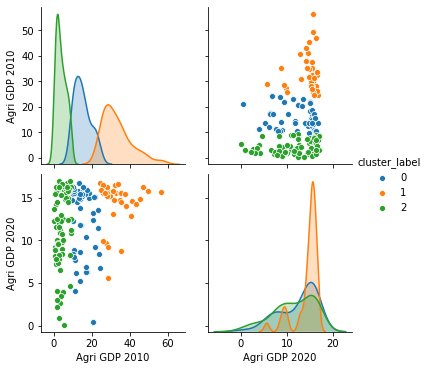

In [115]:
predicted_mean['Agri GDP 2010'] = predicted_mean['Agri GDP 2010'].astype(float)
predicted_mean['Agri GDP 2020'] = predicted_mean['Agri GDP 2020'].astype(float)
predicted_mean = predicted_mean.dropna()

k_means = cluster.KMeans(n_clusters=3, max_iter = 200000)
k_means.fit(predicted_mean[['Agri GDP 2010', 'Agri GDP 2020']])

predicted_mean['cluster_label'] = k_means.labels_

df_cluster_means = pd.DataFrame(predicted_mean.groupby(['cluster_label']).mean())

df_cluster_means

data_plot = sns.pairplot(
    predicted_mean, 
    hue='cluster_label', 
    vars =['Agri GDP 2010', 'Agri GDP 2020']
)
data_plot

,Temperature - (Celsius),Rainfall - (MM),Agri GDP 2020,Agri GDP 2010,cluster_label
Code,,,,,
AFG,6.629463,20.262878,9.692694,27.388076,1
AGO,24.951845,72.841752,15.306233,6.909899,2
ARE,21.356442,-16.587208,14.281213,1.407218,2
ARG,24.538962,70.369443,15.180981,6.384085,2
ATG,25.981800,-19.149515,15.713630,1.688169,2
AUS,29.430820,99.853680,16.664788,2.829558,2
AUT,0.160362,245.732732,7.474661,1.632091,2
BDI,23.074555,263.800750,14.541150,41.068616,1
BEL,5.517984,232.273340,9.143999,0.931901,2


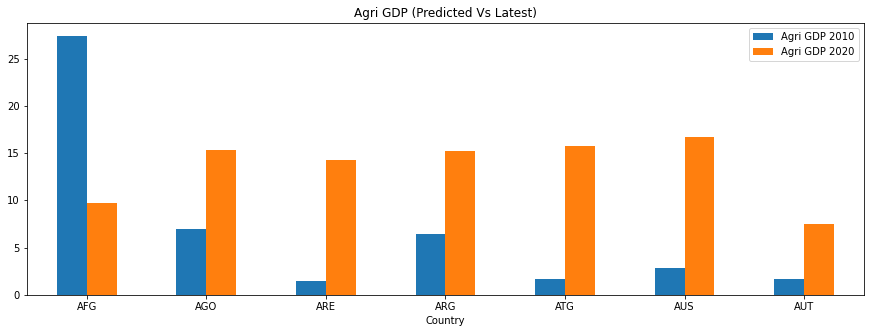

In [116]:
predicted_mean[predicted_mean['cluster_label'].isin([1,2])].head(10)
predicted_mean.reset_index(inplace=True)

country_code_for_analysis = list(predicted_mean[predicted_mean['cluster_label'].isin([1,2])]['Code'])
country_code_for_analysis = country_code_for_analysis[0:7]

predicted_mean['Country'] = predicted_mean['Code']

predicted_mean[['Country', 'Agri GDP 2010', 'Agri GDP 2020']][
    predicted_mean['Country'].isin(country_code_for_analysis)].plot.bar(x='Country',rot=0, figsize=(15,5), title="Agri GDP (Predicted Vs Latest)")

In [117]:
# Regression Analysis for Forest Area Prediction
cols = [' Statistics', 'Code', 'Temperature - (Celsius)', 'Rainfall - (MM)', ' Year', 'Forest area (sq. km)']
data = temperature_and_rainfall[cols] # 'Population growth (annual %)'
data = data.dropna()

countries = list(data['Code'].unique())

data['Code'] = data['Code'].apply(lambda x: x.strip())
data[' Statistics'] = data[' Statistics'].apply(lambda x: str(x).strip())
data[' Year'] = data[' Year'].apply(lambda x: str(int(x)))
data[' Year'] = data[' Year'].astype(int)
data['Forest area (sq. km)'] = data['Forest area (sq. km)'].apply(lambda x: str(x).strip())
data['Forest area (sq. km)'] = data['Forest area (sq. km)'].astype(float)

months = ['Jan', 'Apr', 'Jul', 'Oct']

data_new = {
    ' Year': [],
    ' Statistics': [],
    'Code': [],
    'Rainfall - (MM)': [],
    'Temperature - (Celsius)': [],
    'Forest area (sq. km)': []
    
}

for each_country in countries:
    for each_month in months:
        m1_rainfall = data[
            (data[' Statistics']== str(each_month) + ' Average') & 
            (data['Code']==each_country) & 
            (data[' Year'] > 1990) &
            (data[' Year'] < 2001)
        ]['Rainfall - (MM)'].mean()
        
        m2_rainfall = data[
            (data[' Statistics']== str(each_month) + ' Average') & 
            (data['Code']==each_country) & 
            (data[' Year'] > 2001) &
            (data[' Year'] < 2011)
        ]['Rainfall - (MM)'].mean()
             
        m3_rainfall = data[
            (data[' Statistics']== str(each_month) + ' Average') & 
            (data['Code']==each_country) & 
            (data[' Year'] > 2011) &
            (data[' Year'] < 2020)
        ]['Rainfall - (MM)'].mean()
        
        m1_temperature = data[
            (data[' Statistics']== str(each_month) + ' Average') & 
            (data['Code']==each_country) & 
            (data[' Year'] > 1990) &
            (data[' Year'] < 2001)
        ]['Temperature - (Celsius)'].mean()
        
        m2_temperature = data[
            (data[' Statistics']== str(each_month) + ' Average') & 
            (data['Code']==each_country) & 
            (data[' Year'] > 2001) &
            (data[' Year'] < 2011)
        ]['Temperature - (Celsius)'].mean()
             
        m3_temperature = data[
            (data[' Statistics']== str(each_month) + ' Average') & 
            (data['Code']==each_country) & 
            (data[' Year'] > 2011) &
            (data[' Year'] < 2020)
        ]['Temperature - (Celsius)'].mean()
        
        try:
            last_temperature = data[
                (data[' Statistics']== str(each_month) + ' Average') & 
                (data['Code']==each_country) & 
                (data[' Year'] == 2016)
            ]['Temperature - (Celsius)'].tolist()[0]
        except:
            last_temperature = data[
                (data['Code']==each_country) & 
                (data[' Year'] == 2016)
            ]['Temperature - (Celsius)'].mean()
        
        try:
            last_rainfall = data[
                (data[' Statistics']== str(each_month) + ' Average') & 
                (data['Code']==each_country) & 
                (data[' Year'] == 2016)
            ]['Rainfall - (MM)'].tolist()[0]
        except:
            last_rainfall = data[
                (data['Code']==each_country) & 
                (data[' Year'] == 2016)
            ]['Rainfall - (MM)'].mean()
        
        avg_temp = ((m2_temperature - m1_temperature) + (m3_temperature-m2_temperature))/2
        avg_rain = ((m2_rainfall - m1_rainfall) + (m3_rainfall-m2_rainfall))/2
        
        for year in range(2020, 2030):
            last_temperature = last_temperature + avg_temp
            last_rainfall = last_rainfall + avg_rain
            
            data_new[' Year'].append(year)
            data_new[' Statistics'].append(each_month + ' Average')
            data_new['Code'].append(each_country)
            data_new['Temperature - (Celsius)'].append(last_temperature)
            data_new['Rainfall - (MM)'].append(last_rainfall)
            data_new['Forest area (sq. km)'].append(0.0)

data_cereal = pd.DataFrame(data=data_new)

In [118]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import train_test_split

data['Forest area (sq. km)'] = data['Forest area (sq. km)'].apply(lambda x: str(x).strip())
data = data.dropna()

# data[' Year'] = data[' Year'].apply(lambda x: str(int(x)))

data =  data[data[' Statistics'].isin(['Jan Average', 'Apr Average', 'Jul Average', 'Oct Average'])]
X_train, y_train = data[
    ['Temperature - (Celsius)', 'Rainfall - (MM)']], data['Forest area (sq. km)'] 

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

data_cereal = data_cereal.dropna()

X_test = data_cereal[ ['Temperature - (Celsius)', 'Rainfall - (MM)']] 
y_pred = regr.predict(X_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [119]:
data_cereal['Forest area (sq. km)'] = list(y_pred)
predicted_mean = data_cereal[['Code', 'Forest area (sq. km)', 'Temperature - (Celsius)', 'Rainfall - (MM)']].groupby('Code').mean()
predicted_mean

,Forest area (sq. km),Temperature - (Celsius),Rainfall - (MM)
Code,,,
AFG,227245.653147,17.407424,24.731242
AGO,150474.457475,23.124736,79.239065
ALB,250031.078324,16.136296,106.602098
AND,256773.379711,15.393664,46.424385
ARE,44528.386040,30.351929,1.813130
...,...,...,...
WSM,97699.581149,27.878692,306.404395
YEM,119353.223516,25.075622,16.867843
ZAF,183548.397440,20.489042,16.005264


In [120]:
data['Forest area (sq. km)'] = data['Forest area (sq. km)'].astype('float')
last_decade_mean = data[['Code', 'Forest area (sq. km)', 'Temperature - (Celsius)', 'Rainfall - (MM)']].groupby('Code').mean()

predicted_mean['Forest area 2010'] = predicted_mean['Forest area (sq. km)']
predicted_mean['Forest area 2020'] = last_decade_mean['Forest area (sq. km)']

predicted_mean['Forest area 2010'] = predicted_mean['Forest area 2010'].astype(float)
predicted_mean['Forest area 2020'] = predicted_mean['Forest area 2020'].astype(float)

predicted_mean = predicted_mean.dropna()
del predicted_mean['Forest area (sq. km)']
k_means = cluster.KMeans(n_clusters=3, max_iter = 200000)
k_means.fit(predicted_mean[['Forest area 2010', 'Forest area 2020']])

predicted_mean['cluster_label'] = k_means.labels_

df_cluster_means = pd.DataFrame(predicted_mean.groupby(['cluster_label']).mean())

df_cluster_means


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=200000,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

,Temperature - (Celsius),Rainfall - (MM),Forest area 2010,Forest area 2020
cluster_label,,,,
0,21.228104,103.303871,178505.726997,8.263800e+04
1,12.973259,86.710562,293128.182792,6.626523e+06
2,13.357925,65.001445,286419.429310,2.244626e+06


,Temperature - (Celsius),Rainfall - (MM),Forest area 2010,Forest area 2020,cluster_label
Code,,,,,
AFG,17.407424,24.731242,227245.653147,13500.000000,0
AGO,23.124736,79.239065,150474.457475,592911.999700,0
ALB,16.136296,106.602098,250031.078324,7768.419236,0
AND,15.393664,46.424385,256773.379711,160.000000,0
ARE,30.351929,1.813130,44528.386040,3025.176920,0
ARG,15.805855,66.198459,252202.260889,306761.422777,0
ARM,9.700544,66.812869,337761.251204,3326.153856,0
ATG,27.283741,165.311776,97451.561134,99.442309,0
AUT,10.032331,160.604736,338818.548421,38388.384634,0


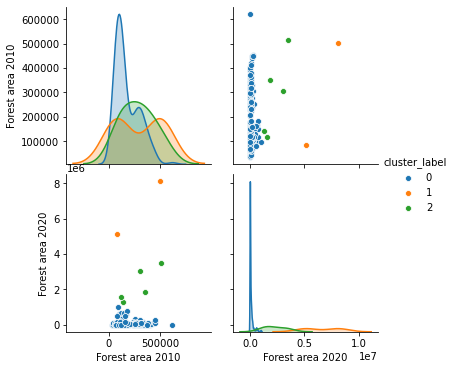

In [121]:
data_plot = sns.pairplot(
    predicted_mean, 
    hue='cluster_label', 
    vars =['Forest area 2010', 'Forest area 2020']
)
data_plot

predicted_mean[predicted_mean['cluster_label'].isin([0])].head(10)
predicted_mean.reset_index(inplace=True)



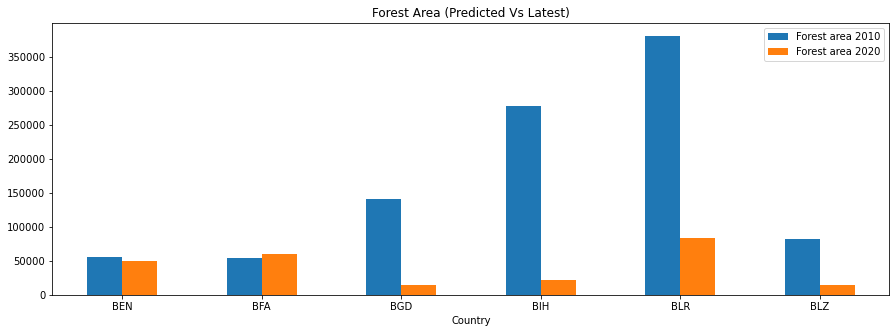

In [122]:
country_code_for_analysis = list(predicted_mean[predicted_mean['cluster_label'].isin([0])]['Code'])
country_code_for_analysis = country_code_for_analysis[12:15] + country_code_for_analysis[17:20]

predicted_mean['Country'] = predicted_mean['Code']

predicted_mean[['Country', 'Forest area 2010', 'Forest area 2020']][
    predicted_mean['Country'].isin(country_code_for_analysis)].plot.bar(x='Country',rot=0, figsize=(15,5), title="Forest Area (Predicted Vs Latest)")